In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Serre's Bound 

$$
q + 1 - g[2q^{\frac{1}{2}}] \leq N \leq q + 1 + g[2q^{\frac{1}{2}}]
$$

In [2]:
try:
    EllipticCurve([-3,2])
except:
    print('singular curve')

singular curve


In [3]:
k = GF(2)
k

Finite Field of size 2

In [4]:
K.<x> = FunctionField(k)
K

/opt/sagemath-9.0/local/lib/python3.7/site-packages/sage/rings/function_field/ideal.py:2217: DeprecationWarning: invalid escape sequence \g
  """


Rational function field in x over Finite Field of size 2

In [5]:
R.<y> = K[]
R

Univariate Polynomial Ring in y over Rational function field in x over Finite Field of size 2

In [6]:
F.<y> = K.extension(y^2 + y - x^3 - x - 1)
F

Function field in y defined by y^2 + y + x^3 + x + 1

In [7]:
F.genus()

1

In [8]:
F.places(1)

[Place (1/x, 1/x^2*y)]

In [9]:
def makefields(n,skip=False):
    ks = []
    if skip == False:
        for i in range(2,n):
            try: 
                K.<a> = GF(i,'a')
                F.<x> = FunctionField(K)
                ks.append(F)
            except:
                pass
    else:
        for i in range(3,n,2):
            try: 
                K.<a> = GF(i,'a')
                F.<x> = FunctionField(K)
                if K.characteristic() != 3:
                    ks.append(F)
            except:
                pass
    return ks


def elliptic(field, fx, case = True):
    R.<y> = field[]
    xx = field.place_infinite().local_uniformizer()
    v = field.valuation(xx)
    if field.characteristic() != 2:
        try:
            if radical(fx) == fx and v(fx) == -3:
                L.<y> = field.extension(y^2 - fx)
                return L
            else:
                return 'f(x) must be a squarefree degree 3 polynomial'
        except:
            return 'f(x) must be a polynomial'
    else:
        if case == True and v(fx) == -3:
            L.<y> = field.extension(y^2 + y + fx)
            return L
        else:
            L.<y> = field.extension(y^2 + y + xx^-1 + 1/fx)
            return L


In [10]:
def checkSharpness(K, maxmin=True, strategy = 'group'):
    if maxmin == True:
        if strategy == 'group':
            dds = 0
            k = K.constant_field()
            elements = [x for x in k]
            q = len(elements)
            if k.characteristic() != 2 and k.characteristic() != 3:
                nmax = q + 1 + int(2*np.sqrt(q))
                for i,a in enumerate(elements):
                    print(i)
                    for j,b in enumerate(elements):
                        try:
                            C = EllipticCurve(k,[a,b])
                            print(C.abelian_group().cardinality(),nmax)
                            if C.abelian_group().cardinality() == nmax:
                                dds += 1
                                print(C)
                        except:
                            'singular curve ' + str(a) + ', ' + str(b)
            else:
                return 'this strategy only works if chr is not 2 or 3'
            return dds



        else:
            p = K.characteristic()
            elements = [x for x in K.constant_field()]
            q = len(elements)
            nmax = q + 1 + int(2*np.sqrt(q))
            xx = K.place_infinite().local_uniformizer()^-1
            dd = 0
            ##char 3
            if p == 3:
                print('Field of characteristic ' + str(p))
                for i,aa in enumerate(elements):
                    print(K,'i = ' + str(i))
                    for j,bb in enumerate(elements):
                        print('j = ' + str(j))
                        for k,cc in enumerate(elements):
                            print('k = ' + str(k))
                            fx  = xx^3 + aa*xx^2 + bb*xx + cc
                            try:
                                fs = radical(fx)
                                L = elliptic(K,fx)
                                if len(L.places(1)) == nmax:
                                    dd += 1
                                    print(L,K)
                            except:
                                pass


            ## char different from 3              
            else:
                print('Field of characteristic ' + str(p))
                for j,bb in enumerate(elements):
                    print(K,'j = ' + str(j))
                    for k,cc in enumerate(elements):
                        print('k = ' + str(k))
                        fx  = xx^3 + bb*xx + cc
                        try:
                            fs = radical(fx)
                            L = elliptic(K,fx)
                            if len(L.places(1)) == nmax:
                                dd += 1
                                print(L,K)
                        except:
                            pass

            return dd
    else:
        if strategy == 'group':
            dds = 0
            k = K.constant_field()
            elements = [x for x in k]
            q = len(elements)
            if k.characteristic() != 2 and k.characteristic() != 3:
                nmax = q + 1 - int(2*np.sqrt(q))
                for i,a in enumerate(elements):
                    print(i)
                    for j,b in enumerate(elements):
                        try:
                            C = EllipticCurve(k,[a,b])
                            print(C.abelian_group().cardinality(),nmax)
                            if C.abelian_group().cardinality() == nmax:
                                dds += 1
                                print(C)
                        except:
                            'singular curve ' + str(a) + ', ' + str(b)
            else:
                return 'this strategy only works if chr is not 2 or 3'
            return dds



        else:
            p = K.characteristic()
            elements = [x for x in K.constant_field()]
            q = len(elements)
            nmax = q + 1 - int(2*np.sqrt(q))
            xx = K.place_infinite().local_uniformizer()^-1
            dd = 0
            ##char 3
            if p == 3:
                print('Field of characteristic ' + str(p))
                for i,aa in enumerate(elements):
                    print(K,'i = ' + str(i))
                    for j,bb in enumerate(elements):
                        print('j = ' + str(j))
                        for k,cc in enumerate(elements):
                            print('k = ' + str(k))
                            fx  = xx^3 + aa*xx^2 + bb*xx + cc
                            try:
                                fs = radical(fx)
                                L = elliptic(K,fx)
                                if len(L.places(1)) == nmax:
                                    dd += 1
                                    print(L,K)
                            except:
                                pass


            ## char different from 3              
            else:
                print('Field of characteristic ' + str(p))
                for j,bb in enumerate(elements):
                    print(K,'j = ' + str(j))
                    for k,cc in enumerate(elements):
                        print('k = ' + str(k))
                        fx  = xx^3 + bb*xx + cc
                        try:
                            fs = radical(fx)
                            L = elliptic(K,fx)
                            if len(L.places(1)) == nmax:
                                dd += 1
                                print(L,K)
                        except:
                            pass

            return dd


In [11]:
ks = makefields(100,skip='true')
ks

[Rational function field in x over Finite Field of size 5,
 Rational function field in x over Finite Field of size 7,
 Rational function field in x over Finite Field of size 11,
 Rational function field in x over Finite Field of size 13,
 Rational function field in x over Finite Field of size 17,
 Rational function field in x over Finite Field of size 19,
 Rational function field in x over Finite Field of size 23,
 Rational function field in x over Finite Field in a of size 5^2,
 Rational function field in x over Finite Field of size 29,
 Rational function field in x over Finite Field of size 31,
 Rational function field in x over Finite Field of size 37,
 Rational function field in x over Finite Field of size 41,
 Rational function field in x over Finite Field of size 43,
 Rational function field in x over Finite Field of size 47,
 Rational function field in x over Finite Field in a of size 7^2,
 Rational function field in x over Finite Field of size 53,
 Rational function field in x 

In [12]:
checkSharpness(ks[7])

0
31 36
21 36
16 36
21 36
31 36
36 36
Elliptic Curve defined by y^2 = x^3 + 2 over Finite Field in a of size 5^2
31 36
21 36
16 36
21 36
31 36
36 36
Elliptic Curve defined by y^2 = x^3 + 4 over Finite Field in a of size 5^2
31 36
21 36
16 36
21 36
31 36
36 36
Elliptic Curve defined by y^2 = x^3 + 3 over Finite Field in a of size 5^2
31 36
21 36
16 36
21 36
31 36
36 36
Elliptic Curve defined by y^2 = x^3 + 1 over Finite Field in a of size 5^2
1
18 36
28 36
23 36
33 36
23 36
18 36
28 36
18 36
28 36
33 36
28 36
28 36
28 36
28 36
23 36
33 36
23 36
18 36
28 36
18 36
28 36
33 36
28 36
28 36
28 36
2
20 36
20 36
25 36
25 36
30 36
20 36
35 36
30 36
30 36
20 36
25 36
30 36
20 36
25 36
25 36
30 36
20 36
35 36
30 36
30 36
20 36
25 36
30 36
3
34 36
24 36
24 36
24 36
24 36
29 36
19 36
29 36
34 36
24 36
34 36
24 36
19 36
24 36
24 36
24 36
24 36
29 36
19 36
29 36
34 36
24 36
34 36
24 36
19 36
4
32 36
27 36
22 36
32 36
27 36
27 36
22 36
32 36
17 36
22 36
22 36
32 36
27 36
22 36
32 36
27 36
27 36
22 36


4

In [13]:
def sharpness(ks,maxmin=True):
    dds = []
    for i,k in enumerate(ks):
        print(k)
        dd = checkSharpness(k,maxmin)
        dds.append(dd)
    return dds
def meanSharpness(K):
    dds = []
    k = K.constant_field()
    elements = [x for x in k]
    for i,a in enumerate(elements):
        for j,b in enumerate(elements):
            print(i)
            try:
                C = EllipticCurve(k,[a,b])
                dds.append(C.abelian_group().cardinality())
            except:
                pass
    return np.sum(dds)/len(dds)
def meansharpness(ks):
    return [meanSharpness(K) for K in ks]

In [14]:
dds = sharpness(ks)
dds

Rational function field in x over Finite Field of size 5
0
6 10
6 10
6 10
6 10
1
4 10
9 10
4 10
4 10
9 10
2
2 10
7 10
7 10
3
10 10
Elliptic Curve defined by y^2 = x^3 + 3*x over Finite Field of size 5
5 10
5 10
4
8 10
8 10
3 10
3 10
8 10
Rational function field in x over Finite Field of size 7
0
12 13
9 13
13 13
Elliptic Curve defined by y^2 = x^3 + 3 over Finite Field of size 7
3 13
7 13
4 13
1
8 13
5 13
6 13
10 13
11 13
2
8 13
5 13
6 13
10 13
11 13
3
8 13
12 13
9 13
6 13
10 13
7 13
4 13
4
8 13
5 13
6 13
10 13
11 13
5
8 13
12 13
9 13
6 13
10 13
7 13
4 13
6
8 13
12 13
9 13
6 13
10 13
7 13
4 13
Rational function field in x over Finite Field of size 11
0
12 18
12 18
12 18
12 18
12 18
12 18
12 18
12 18
12 18
12 18
1
12 18
14 18
16 18
18 18
Elliptic Curve defined by y^2 = x^3 + x + 3 over Finite Field of size 11
9 18
11 18
13 18
15 18
6 18
8 18
10 18
2
12 18
16 18
9 18
17 18
10 18
14 18
7 18
15 18
8 18
3
12 18
18 18
Elliptic Curve defined by y^2 = x^3 + 3*x + 1 over Finite Field of size 11

25 33
21 33
26 33
30 33
23 33
18 33
28 33
20 33
30 33
25 33
18 33
22 33
27 33
23 33
17 33
18 33
16 33
8
24 33
24 33
29 33
21 33
28 33
32 33
15 33
28 33
30 33
26 33
21 33
20 33
28 33
27 33
22 33
18 33
20 33
33 33
Elliptic Curve defined by y^2 = x^3 + 8*x + 17 over Finite Field of size 23
16 33
20 33
27 33
19 33
24 33
9
24 33
21 33
15 33
26 33
28 33
18 33
16 33
19 33
24 33
28 33
28 33
21 33
27 33
20 33
20 33
24 33
29 33
32 33
30 33
20 33
22 33
33 33
Elliptic Curve defined by y^2 = x^3 + 9*x + 21 over Finite Field of size 23
27 33
10
24 33
30 33
25 33
21 33
30 33
18 33
20 33
25 33
22 33
17 33
16 33
32 33
31 33
26 33
23 33
28 33
30 33
18 33
27 33
23 33
18 33
11
24 33
25 33
30 33
20 33
22 33
17 33
32 33
23 33
30 33
27 33
18 33
30 33
21 33
18 33
25 33
16 33
31 33
26 33
28 33
18 33
23 33
12
24 33
16 33
27 33
30 33
21 33
19 33
20 33
20 33
15 33
24 33
20 33
22 33
26 33
28 33
24 33
33 33
Elliptic Curve defined by y^2 = x^3 + 12*x + 15 over Finite Field of size 23
28 33
28 33
29 33
27 33
18 33
21

36 40
25 40
25 40
36 40
22 40
27 40
30 40
32 40
27 40
31 40
24 40
37 40
36 40
38 40
24 40
26 40
10
34 40
24 40
32 40
27 40
25 40
31 40
39 40
32 40
40 40
Elliptic Curve defined by y^2 = x^3 + 10*x + 8 over Finite Field of size 29
24 40
21 40
28 40
34 40
30 40
30 40
34 40
28 40
21 40
24 40
40 40
Elliptic Curve defined by y^2 = x^3 + 10*x + 21 over Finite Field of size 29
32 40
39 40
31 40
25 40
27 40
32 40
24 40
11
26 40
32 40
28 40
35 40
30 40
33 40
20 40
39 40
36 40
21 40
29 40
26 40
28 40
36 40
36 40
28 40
26 40
29 40
21 40
36 40
39 40
20 40
33 40
30 40
35 40
28 40
32 40
12
34 40
24 40
28 40
32 40
32 40
34 40
25 40
31 40
30 40
39 40
27 40
40 40
Elliptic Curve defined by y^2 = x^3 + 12*x + 12 over Finite Field of size 29
24 40
21 40
21 40
24 40
40 40
Elliptic Curve defined by y^2 = x^3 + 12*x + 17 over Finite Field of size 29
27 40
39 40
30 40
31 40
25 40
34 40
32 40
32 40
28 40
24 40
13
40 40
Elliptic Curve defined by y^2 = x^3 + 13*x over Finite Field of size 29
36 40
27 40
22 40
36 

37 43
22 43
29 43
32 43
38 43
40 43
20
32 43
26 43
35 43
27 43
31 43
28 43
28 43
23 43
28 43
36 43
34 43
25 43
22 43
32 43
40 43
24 43
32 43
42 43
39 43
30 43
28 43
36 43
41 43
36 43
36 43
33 43
37 43
29 43
38 43
21
32 43
40 43
30 43
30 43
36 43
27 43
42 43
40 43
39 43
38 43
32 43
27 43
24 43
34 43
31 43
29 43
35 43
33 43
30 43
40 43
37 43
32 43
26 43
25 43
24 43
22 43
37 43
28 43
34 43
34 43
24 43
22
32 43
36 43
39 43
24 43
35 43
37 43
24 43
34 43
40 43
27 43
38 43
34 43
33 43
32 43
22 43
34 43
30 43
42 43
32 43
31 43
30 43
26 43
37 43
24 43
30 43
40 43
27 43
29 43
40 43
25 43
28 43
23
32 43
36 43
39 43
24 43
35 43
37 43
24 43
34 43
40 43
27 43
38 43
34 43
33 43
32 43
22 43
34 43
30 43
42 43
32 43
31 43
30 43
26 43
37 43
24 43
30 43
40 43
27 43
29 43
40 43
25 43
28 43
24
32 43
30 43
36 43
42 43
39 43
32 43
24 43
31 43
35 43
30 43
37 43
26 43
24 43
37 43
34 43
24 43
40 43
30 43
27 43
40 43
38 43
27 43
34 43
29 43
33 43
40 43
32 43
25 43
22 43
28 43
34 43
25
32 43
24 43
41 43
26 43
28 4

36 50
47 50
42 50
43 50
32 50
28 50
38 50
30 50
36 50
41 50
36 50
48 50
32 50
35 50
49 50
34 50
37 50
37 50
34 50
49 50
35 50
32 50
48 50
36 50
41 50
36 50
30 50
38 50
28 50
32 50
43 50
42 50
47 50
36 50
28
40 50
41 50
35 50
43 50
38 50
37 50
30 50
42 50
32 50
36 50
36 50
36 50
49 50
32 50
28 50
34 50
47 50
48 50
48 50
47 50
34 50
28 50
32 50
49 50
36 50
36 50
36 50
32 50
42 50
30 50
37 50
38 50
43 50
35 50
41 50
29
50 50
Elliptic Curve defined by y^2 = x^3 + 29*x over Finite Field of size 37
40 50
39 50
34 50
40 50
44 50
45 50
42 50
44 50
28 50
30 50
36 50
43 50
31 50
31 50
30 50
46 50
40 50
35 50
35 50
40 50
46 50
30 50
31 50
31 50
43 50
36 50
30 50
28 50
44 50
42 50
45 50
44 50
40 50
34 50
39 50
40 50
30
40 50
36 50
34 50
38 50
42 50
48 50
32 50
43 50
28 50
49 50
41 50
36 50
37 50
30 50
47 50
36 50
35 50
32 50
32 50
35 50
36 50
47 50
30 50
37 50
36 50
41 50
49 50
28 50
43 50
32 50
48 50
42 50
38 50
34 50
36 50
31
50 50
Elliptic Curve defined by y^2 = x^3 + 31*x over Finite Field of 

33 54
46 54
36 54
44 54
52 54
45 54
36 54
54 54
Elliptic Curve defined by y^2 = x^3 + 21*x + 20 over Finite Field of size 41
54 54
Elliptic Curve defined by y^2 = x^3 + 21*x + 21 over Finite Field of size 41
36 54
45 54
52 54
44 54
36 54
46 54
33 54
44 54
37 54
36 54
44 54
42 54
33 54
49 54
39 54
48 54
31 54
40 54
46 54
22
50 54
37 54
42 54
39 54
32 54
44 54
36 54
43 54
35 54
36 54
50 54
40 54
42 54
45 54
47 54
54 54
Elliptic Curve defined by y^2 = x^3 + 22*x + 16 over Finite Field of size 41
34 54
36 54
51 54
52 54
52 54
51 54
36 54
34 54
54 54
Elliptic Curve defined by y^2 = x^3 + 22*x + 25 over Finite Field of size 41
47 54
45 54
42 54
40 54
50 54
36 54
35 54
43 54
36 54
44 54
32 54
39 54
42 54
37 54
23
32 54
40 54
32 54
45 54
51 54
48 54
48 54
44 54
38 54
48 54
53 54
40 54
30 54
42 54
36 54
40 54
51 54
38 54
47 54
39 54
35 54
35 54
39 54
47 54
38 54
51 54
40 54
36 54
42 54
30 54
40 54
53 54
48 54
38 54
44 54
48 54
48 54
51 54
45 54
32 54
40 54
24
50 54
54 54
Elliptic Curve defined 

48 57
48 57
38 57
44 57
38 57
40 57
43 57
33 57
32 57
49 57
39 57
56 57
55 57
45 57
48 57
50 57
44 57
50 57
40 57
40 57
36 57
42 57
43 57
42 57
53 57
54 57
43 57
39 57
42 57
52 57
32 57
13
44 57
54 57
38 57
40 57
51 57
41 57
48 57
36 57
52 57
51 57
48 57
52 57
54 57
40 57
43 57
33 57
46 57
50 57
35 57
40 57
45 57
43 57
48 57
53 57
38 57
42 57
55 57
45 57
48 57
34 57
36 57
40 57
37 57
36 57
52 57
40 57
47 57
37 57
48 57
50 57
34 57
14
44 57
52 57
55 57
35 57
48 57
38 57
37 57
34 57
43 57
40 57
41 57
34 57
37 57
38 57
46 57
52 57
40 57
45 57
40 57
52 57
40 57
48 57
36 57
48 57
43 57
48 57
36 57
42 57
50 57
51 57
54 57
47 57
48 57
45 57
54 57
51 57
50 57
40 57
53 57
33 57
36 57
15
44 57
48 57
43 57
37 57
52 57
48 57
36 57
54 57
54 57
53 57
52 57
38 57
40 57
38 57
40 57
40 57
43 57
42 57
47 57
51 57
33 57
55 57
37 57
41 57
46 57
45 57
48 57
48 57
50 57
48 57
50 57
36 57
35 57
34 57
34 57
52 57
40 57
36 57
51 57
45 57
40 57
16
44 57
40 57
36 57
52 57
33 57
40 57
53 57
45 57
40 57
40 57
50 5

41 61
40 61
42 61
48 61
48 61
54 61
56 61
55 61
45 61
51 61
48 61
56 61
48 61
60 61
46 61
55 61
38 61
50 61
61 61
Elliptic Curve defined by y^2 = x^3 + x + 38 over Finite Field of size 47
47 61
45 61
44 61
54 61
37 61
42 61
40 61
36 61
2
48 61
50 61
55 61
48 61
51 61
42 61
46 61
48 61
36 61
59 61
44 61
56 61
40 61
58 61
60 61
61 61
Elliptic Curve defined by y^2 = x^3 + 2*x + 15 over Finite Field of size 47
45 61
45 61
49 61
40 61
55 61
54 61
48 61
42 61
54 61
48 61
42 61
41 61
56 61
47 61
51 61
51 61
35 61
36 61
38 61
56 61
40 61
52 61
37 61
60 61
48 61
50 61
54 61
45 61
48 61
41 61
46 61
3
48 61
48 61
46 61
59 61
40 61
61 61
Elliptic Curve defined by y^2 = x^3 + 3*x + 5 over Finite Field of size 47
49 61
54 61
54 61
41 61
51 61
36 61
40 61
60 61
54 61
41 61
50 61
51 61
48 61
44 61
58 61
45 61
40 61
48 61
48 61
56 61
51 61
38 61
52 61
48 61
45 61
46 61
55 61
42 61
36 61
56 61
60 61
45 61
55 61
42 61
42 61
47 61
35 61
56 61
37 61
50 61
48 61
4
48 61
52 61
41 61
45 61
48 61
48 61
38 61
5

48 61
38 61
45 61
42 61
60 61
42 61
35 61
50 61
48 61
40 61
54 61
51 61
60 61
50 61
44 61
40 61
56 61
52 61
46 61
36 61
45 61
42 61
56 61
48 61
46 61
61 61
Elliptic Curve defined by y^2 = x^3 + 28*x + 33 over Finite Field of size 47
54 61
36 61
54 61
51 61
58 61
48 61
51 61
48 61
55 61
56 61
55 61
47 61
37 61
29
48 61
56 61
39 61
56 61
53 61
44 61
60 61
55 61
52 61
60 61
45 61
50 61
42 61
51 61
38 61
57 61
54 61
56 61
46 61
42 61
52 61
47 61
39 61
57 61
49 61
44 61
54 61
50 61
40 61
42 61
39 61
58 61
45 61
54 61
46 61
51 61
36 61
44 61
41 61
36 61
52 61
43 61
40 61
57 61
40 61
30
48 61
60 61
46 61
44 61
46 61
57 61
55 61
54 61
49 61
45 61
43 61
44 61
38 61
39 61
39 61
36 61
56 61
42 61
40 61
44 61
56 61
45 61
42 61
54 61
51 61
40 61
52 61
56 61
54 61
40 61
60 61
57 61
57 61
58 61
52 61
53 61
51 61
47 61
42 61
41 61
39 61
50 61
52 61
50 61
36 61
31
48 61
49 61
56 61
54 61
60 61
42 61
60 61
45 61
42 61
51 61
57 61
41 61
46 61
43 61
40 61
57 61
39 61
44 61
44 61
40 61
52 61
58 61
50 61
46

48 64
44 64
46 64
45 64
47 64
48 64
44 64
60 64
38 64
49 64
47 64
55 64
58 64
46 64
38 64
63 64
54 64
48 64
58 64
60 64
45 64
49 64
54 64
48 64
9
50 64
51 64
46 64
52 64
56 64
54 64
48 64
44 64
39 64
52 64
42 64
40 64
48 64
58 64
60 64
59 64
56 64
40 64
55 64
44 64
60 64
45 64
49 64
61 64
41 64
51 64
46 64
52 64
56 64
54 64
48 64
44 64
39 64
52 64
42 64
40 64
48 64
58 64
60 64
59 64
56 64
40 64
55 64
44 64
60 64
45 64
49 64
61 64
41 64
10
36 64
51 64
46 64
52 64
56 64
54 64
55 64
53 64
52 64
56 64
40 64
62 64
51 64
53 64
45 64
42 64
54 64
62 64
37 64
46 64
52 64
42 64
40 64
55 64
51 64
46 64
52 64
56 64
54 64
55 64
53 64
52 64
56 64
40 64
62 64
51 64
53 64
45 64
42 64
54 64
62 64
37 64
46 64
52 64
42 64
40 64
55 64
11
50 64
51 64
39 64
59 64
49 64
54 64
48 64
44 64
46 64
52 64
56 64
61 64
48 64
58 64
60 64
52 64
42 64
40 64
41 64
44 64
60 64
45 64
56 64
40 64
55 64
51 64
39 64
59 64
49 64
54 64
48 64
44 64
46 64
52 64
56 64
61 64
48 64
58 64
60 64
52 64
42 64
40 64
41 64
44 64
60 64
45

52 64
56 64
61 64
48 64
58 64
60 64
52 64
42 64
40 64
41 64
44 64
60 64
45 64
56 64
40 64
55 64
51 64
39 64
59 64
49 64
54 64
48 64
44 64
46 64
52 64
56 64
61 64
48 64
36
64 64
Elliptic Curve defined by y^2 = x^3 + (a+3)*x over Finite Field in a of size 7^2
44 64
60 64
38 64
49 64
47 64
55 64
58 64
46 64
38 64
63 64
54 64
48 64
58 64
60 64
45 64
49 64
54 64
48 64
44 64
46 64
45 64
47 64
48 64
44 64
60 64
38 64
49 64
47 64
55 64
58 64
46 64
38 64
63 64
54 64
48 64
58 64
60 64
45 64
49 64
54 64
48 64
44 64
46 64
45 64
47 64
48 64
37
50 64
44 64
39 64
52 64
42 64
40 64
48 64
58 64
60 64
59 64
56 64
40 64
55 64
44 64
60 64
45 64
49 64
61 64
41 64
51 64
46 64
52 64
56 64
54 64
48 64
44 64
39 64
52 64
42 64
40 64
48 64
58 64
60 64
59 64
56 64
40 64
55 64
44 64
60 64
45 64
49 64
61 64
41 64
51 64
46 64
52 64
56 64
54 64
48 64
38
36 64
53 64
52 64
56 64
40 64
62 64
51 64
53 64
45 64
42 64
54 64
62 64
37 64
46 64
52 64
42 64
40 64
55 64
51 64
46 64
52 64
56 64
54 64
55 64
53 64
52 64
56 64
40 6

48 68
56 68
56 68
48 68
58 68
40 68
56 68
55 68
61 68
48 68
57 68
55 68
48 68
64 68
51 68
58 68
65 68
52 68
54 68
60 68
43 68
42 68
63 68
48 68
60 68
42 68
50 68
63 68
11
40 68
60 68
44 68
48 68
68 68
Elliptic Curve defined by y^2 = x^3 + 11*x + 4 over Finite Field of size 53
56 68
65 68
52 68
66 68
43 68
52 68
66 68
60 68
51 68
45 68
47 68
57 68
60 68
50 68
54 68
48 68
60 68
45 68
50 68
53 68
58 68
53 68
53 68
58 68
53 68
50 68
45 68
60 68
48 68
54 68
50 68
60 68
57 68
47 68
45 68
51 68
60 68
66 68
52 68
43 68
66 68
52 68
65 68
56 68
68 68
Elliptic Curve defined by y^2 = x^3 + 11*x + 49 over Finite Field of size 53
48 68
44 68
60 68
12
58 68
53 68
49 68
62 68
44 68
44 68
48 68
45 68
41 68
66 68
60 68
60 68
56 68
56 68
58 68
57 68
62 68
51 68
63 68
49 68
64 68
63 68
54 68
42 68
52 68
48 68
48 68
52 68
42 68
54 68
63 68
64 68
49 68
63 68
51 68
62 68
57 68
58 68
56 68
56 68
60 68
60 68
66 68
41 68
45 68
48 68
44 68
44 68
62 68
49 68
53 68
13
68 68
Elliptic Curve defined by y^2 = x^3 + 13

56 68
42 68
41 68
44 68
64 68
62 68
49 68
56 68
52 68
66 68
44 68
49 68
51 68
60 68
48 68
60 68
62 68
63 68
63 68
62 68
60 68
48 68
60 68
51 68
49 68
44 68
66 68
52 68
56 68
49 68
62 68
64 68
44 68
41 68
42 68
56 68
53 68
57 68
63 68
48 68
45 68
54 68
58 68
35
50 68
52 68
56 68
48 68
46 68
45 68
63 68
64 68
59 68
45 68
64 68
67 68
54 68
51 68
59 68
48 68
60 68
52 68
55 68
50 68
66 68
42 68
46 68
57 68
44 68
60 68
60 68
44 68
57 68
46 68
42 68
66 68
50 68
55 68
52 68
60 68
48 68
59 68
51 68
54 68
67 68
64 68
45 68
59 68
64 68
63 68
45 68
46 68
48 68
56 68
52 68
36
68 68
Elliptic Curve defined by y^2 = x^3 + 36*x over Finite Field of size 53
63 68
65 68
57 68
58 68
40 68
55 68
52 68
48 68
63 68
42 68
58 68
48 68
48 68
56 68
48 68
54 68
60 68
50 68
43 68
51 68
61 68
56 68
55 68
64 68
60 68
42 68
42 68
60 68
64 68
55 68
56 68
61 68
51 68
43 68
50 68
60 68
54 68
48 68
56 68
48 68
48 68
58 68
42 68
63 68
48 68
52 68
55 68
40 68
58 68
57 68
65 68
63 68
37
40 68
58 68
48 68
45 68
65 68
54 68
4

60 75
66 75
67 75
63 75
46 75
48 75
52 75
54 75
65 75
54 75
48 75
56 75
3
60 75
48 75
56 75
73 75
54 75
66 75
64 75
60 75
50 75
60 75
50 75
66 75
63 75
72 75
72 75
69 75
53 75
64 75
71 75
55 75
51 75
69 75
72 75
68 75
50 75
55 75
63 75
62 75
64 75
58 75
62 75
56 75
58 75
57 75
65 75
70 75
52 75
48 75
51 75
69 75
65 75
49 75
56 75
67 75
51 75
48 75
48 75
57 75
54 75
70 75
60 75
70 75
60 75
56 75
54 75
66 75
47 75
64 75
72 75
4
60 75
49 75
68 75
66 75
48 75
64 75
50 75
70 75
57 75
69 75
47 75
51 75
51 75
56 75
67 75
55 75
60 75
54 75
62 75
63 75
56 75
70 75
64 75
72 75
65 75
72 75
54 75
48 75
62 75
60 75
60 75
58 75
72 75
66 75
48 75
55 75
48 75
56 75
50 75
64 75
57 75
58 75
66 75
60 75
65 75
53 75
64 75
69 75
69 75
73 75
51 75
63 75
50 75
70 75
56 75
72 75
54 75
52 75
71 75
5
60 75
51 75
65 75
48 75
69 75
49 75
56 75
72 75
56 75
73 75
68 75
67 75
54 75
50 75
51 75
66 75
55 75
48 75
64 75
63 75
48 75
60 75
62 75
57 75
50 75
64 75
54 75
60 75
58 75
70 75
50 75
62 75
60 75
66 75
56 75
70 7

72 75
75 75
Elliptic Curve defined by y^2 = x^3 + 24*x + 26 over Finite Field of size 59
52 75
68 75
52 75
68 75
45 75
48 75
64 75
57 75
65 75
51 75
60 75
52 75
54 75
46 75
46 75
57 75
71 75
67 75
72 75
50 75
60 75
66 75
61 75
63 75
66 75
59 75
56 75
64 75
54 75
56 75
25
60 75
58 75
72 75
64 75
64 75
62 75
47 75
63 75
66 75
55 75
54 75
50 75
56 75
68 75
60 75
72 75
70 75
69 75
60 75
51 75
70 75
55 75
54 75
71 75
57 75
64 75
48 75
53 75
48 75
69 75
51 75
72 75
67 75
72 75
56 75
63 75
49 75
66 75
65 75
50 75
69 75
60 75
51 75
50 75
48 75
60 75
52 75
64 75
70 75
66 75
65 75
54 75
57 75
73 75
58 75
56 75
56 75
48 75
62 75
26
60 75
66 75
50 75
69 75
51 75
55 75
62 75
70 75
65 75
48 75
60 75
66 75
48 75
64 75
66 75
53 75
69 75
63 75
56 75
52 75
49 75
48 75
70 75
47 75
56 75
60 75
63 75
64 75
72 75
62 75
58 75
48 75
56 75
57 75
60 75
64 75
73 75
50 75
72 75
71 75
68 75
64 75
57 75
51 75
67 75
54 75
56 75
72 75
54 75
60 75
72 75
55 75
50 75
58 75
65 75
69 75
51 75
70 75
54 75
27
60 75
70 75
66

68 75
64 75
66 75
66 75
72 75
60 75
48 75
65 75
65 75
64 75
72 75
53 75
50 75
54 75
64 75
70 75
48 75
69 75
57 75
62 75
69 75
69 75
60 75
73 75
47 75
60 75
51 75
51 75
58 75
63 75
51 75
72 75
50 75
56 75
66 75
70 75
67 75
48 75
56 75
55 75
55 75
72 75
60 75
48 75
54 75
54 75
56 75
52 75
62 75
50 75
71 75
63 75
64 75
47
60 75
67 75
45 75
60 75
57 75
66 75
52 75
52 75
49 75
64 75
72 75
48 75
69 75
59 75
59 75
54 75
63 75
66 75
50 75
64 75
55 75
54 75
56 75
46 75
68 75
74 75
56 75
60 75
57 75
63 75
60 75
64 75
46 75
52 75
74 75
64 75
66 75
65 75
56 75
70 75
54 75
57 75
66 75
61 75
61 75
51 75
72 75
48 75
56 75
71 75
68 75
68 75
54 75
63 75
60 75
75 75
Elliptic Curve defined by y^2 = x^3 + 47*x + 57 over Finite Field of size 59
53 75
48
60 75
63 75
50 75
52 75
54 75
48 75
72 75
55 75
48 75
70 75
56 75
72 75
63 75
51 75
60 75
73 75
69 75
62 75
69 75
70 75
54 75
53 75
64 75
65 75
60 75
66 75
64 75
58 75
49 75
56 75
64 75
71 75
62 75
56 75
54 75
60 75
55 75
56 75
67 75
66 75
50 75
51 75
58 75

68 77
72 77
77 77
Elliptic Curve defined by y^2 = x^3 + 8*x + 30 over Finite Field of size 61
77 77
Elliptic Curve defined by y^2 = x^3 + 8*x + 31 over Finite Field of size 61
72 77
68 77
64 77
52 77
61 77
56 77
74 77
63 77
65 77
54 77
69 77
64 77
52 77
52 77
62 77
72 77
76 77
59 77
64 77
54 77
62 77
58 77
61 77
56 77
63 77
54 77
49 77
60 77
73 77
9
52 77
73 77
54 77
64 77
58 77
58 77
76 77
68 77
60 77
70 77
68 77
57 77
72 77
70 77
57 77
66 77
60 77
62 77
57 77
71 77
55 77
72 77
49 77
55 77
67 77
64 77
50 77
48 77
55 77
68 77
68 77
55 77
48 77
50 77
64 77
67 77
55 77
49 77
72 77
55 77
71 77
57 77
62 77
60 77
66 77
57 77
70 77
72 77
57 77
68 77
70 77
60 77
68 77
76 77
58 77
58 77
64 77
54 77
73 77
10
50 77
73 77
60 77
49 77
54 77
63 77
56 77
61 77
58 77
62 77
54 77
64 77
59 77
76 77
72 77
62 77
52 77
52 77
64 77
69 77
54 77
65 77
63 77
74 77
56 77
61 77
52 77
64 77
68 77
72 77
77 77
Elliptic Curve defined by y^2 = x^3 + 10*x + 30 over Finite Field of size 61
77 77
Elliptic Curve defined

68 77
69 77
54 77
73 77
58 77
52 77
52 77
52 77
52 77
58 77
73 77
54 77
69 77
68 77
56 77
62 77
56 77
49 77
59 77
65 77
77 77
Elliptic Curve defined by y^2 = x^3 + 29*x + 44 over Finite Field of size 61
63 77
76 77
54 77
63 77
72 77
74 77
72 77
54 77
64 77
60 77
61 77
52 77
61 77
64 77
64 77
62 77
30
74 77
56 77
61 77
50 77
70 77
60 77
62 77
48 77
70 77
66 77
63 77
75 77
47 77
64 77
72 77
63 77
59 77
65 77
72 77
72 77
60 77
61 77
68 77
60 77
51 77
52 77
70 77
68 77
62 77
55 77
52 77
52 77
55 77
62 77
68 77
70 77
52 77
51 77
60 77
68 77
61 77
60 77
72 77
72 77
65 77
59 77
63 77
72 77
64 77
47 77
75 77
63 77
66 77
70 77
48 77
62 77
60 77
70 77
50 77
61 77
56 77
31
50 77
49 77
56 77
62 77
59 77
62 77
64 77
65 77
56 77
64 77
77 77
Elliptic Curve defined by y^2 = x^3 + 31*x + 10 over Finite Field of size 61
68 77
61 77
63 77
69 77
52 77
76 77
54 77
61 77
54 77
73 77
60 77
63 77
58 77
64 77
72 77
52 77
54 77
74 77
52 77
72 77
72 77
52 77
74 77
54 77
52 77
72 77
64 77
58 77
63 77
60 77
73 77


60 77
70 77
75 77
72 77
65 77
60 77
60 77
70 77
55 77
55 77
70 77
60 77
60 77
65 77
72 77
75 77
70 77
60 77
61 77
56 77
70 77
48 77
63 77
64 77
59 77
72 77
68 77
52 77
62 77
52 77
68 77
51 77
61 77
72 77
63 77
47 77
66 77
62 77
50 77
51
74 77
60 77
61 77
56 77
72 77
68 77
61 77
72 77
60 77
50 77
65 77
51 77
70 77
59 77
52 77
60 77
63 77
70 77
62 77
72 77
68 77
48 77
64 77
62 77
70 77
47 77
55 77
66 77
75 77
52 77
63 77
63 77
52 77
75 77
66 77
55 77
47 77
70 77
62 77
64 77
48 77
68 77
72 77
62 77
70 77
63 77
60 77
52 77
59 77
70 77
51 77
65 77
50 77
60 77
72 77
61 77
68 77
72 77
56 77
61 77
60 77
52
72 77
67 77
52 77
76 77
62 77
48 77
66 77
64 77
74 77
75 77
52 77
51 77
56 77
69 77
67 77
56 77
66 77
58 77
60 77
69 77
54 77
70 77
54 77
69 77
56 77
53 77
64 77
60 77
67 77
57 77
57 77
67 77
60 77
64 77
53 77
56 77
69 77
54 77
70 77
54 77
69 77
60 77
58 77
66 77
56 77
67 77
69 77
56 77
51 77
52 77
75 77
74 77
64 77
66 77
48 77
62 77
76 77
52 77
67 77
53
74 77
60 77
61 77
56 77
72 77
68 77
6

64 84
60 84
76 84
61 84
72 84
58 84
73 84
70 84
70 84
80 84
76 84
60 84
8
68 84
84 84
Elliptic Curve defined by y^2 = x^3 + 8*x + 1 over Finite Field of size 67
65 84
64 84
64 84
61 84
73 84
56 84
60 84
66 84
75 84
78 84
76 84
76 84
58 84
54 84
76 84
69 84
70 84
63 84
61 84
60 84
83 84
64 84
80 84
72 84
73 84
66 84
59 84
64 84
70 84
56 84
70 84
81 84
55 84
66 84
80 84
66 84
72 84
77 84
70 84
63 84
64 84
56 84
72 84
53 84
76 84
75 84
73 84
66 84
67 84
60 84
82 84
78 84
60 84
60 84
58 84
61 84
70 84
76 84
80 84
63 84
75 84
72 84
72 84
71 84
52 84
9
68 84
60 84
58 84
72 84
64 84
54 84
76 84
57 84
68 84
65 84
74 84
70 84
58 84
72 84
71 84
57 84
73 84
55 84
70 84
75 84
60 84
71 84
80 84
67 84
62 84
56 84
80 84
81 84
82 84
64 84
64 84
59 84
66 84
70 84
77 84
72 84
72 84
54 84
55 84
56 84
80 84
74 84
69 84
56 84
65 84
76 84
61 84
66 84
81 84
63 84
79 84
65 84
64 84
78 84
66 84
62 84
71 84
68 84
79 84
60 84
82 84
72 84
64 84
78 84
76 84
10
68 84
71 84
56 84
76 84
60 84
69 84
78 84
75 84
74 84


76 84
58 84
54 84
76 84
69 84
70 84
63 84
61 84
60 84
83 84
64 84
80 84
72 84
73 84
66 84
59 84
64 84
70 84
56 84
70 84
81 84
55 84
66 84
80 84
66 84
72 84
77 84
70 84
63 84
64 84
56 84
72 84
53 84
76 84
75 84
73 84
66 84
67 84
60 84
82 84
78 84
60 84
60 84
58 84
61 84
70 84
76 84
80 84
63 84
75 84
72 84
72 84
71 84
52 84
29
68 84
56 84
72 84
65 84
56 84
76 84
55 84
58 84
79 84
62 84
78 84
54 84
70 84
63 84
67 84
64 84
72 84
74 84
81 84
80 84
72 84
72 84
65 84
66 84
71 84
82 84
77 84
68 84
60 84
60 84
70 84
57 84
61 84
75 84
79 84
66 84
76 84
76 84
68 84
59 84
54 84
65 84
70 84
71 84
64 84
64 84
56 84
55 84
62 84
64 84
72 84
69 84
73 84
66 84
82 84
58 84
74 84
57 84
78 84
81 84
60 84
80 84
71 84
64 84
80 84
30
68 84
54 84
70 84
53 84
80 84
60 84
64 84
72 84
78 84
84 84
Elliptic Curve defined by y^2 = x^3 + 30*x + 9 over Finite Field of size 67
76 84
56 84
76 84
63 84
66 84
80 84
77 84
60 84
65 84
69 84
70 84
75 84
75 84
75 84
72 84
70 84
60 84
64 84
70 84
81 84
73 84
72 84
78 84
73 84


64 84
78 84
58 84
72 84
79 84
55 84
80 84
78 84
71 84
76 84
72 84
80 84
63 84
68 84
59 84
66 84
72 84
72 84
60 84
70 84
74 84
76 84
80 84
61 84
64 84
81 84
79 84
65 84
66 84
62 84
71 84
54 84
82 84
69 84
48
68 84
72 84
63 84
70 84
60 84
82 84
66 84
76 84
56 84
70 84
66 84
55 84
56 84
59 84
72 84
83 84
63 84
76 84
76 84
75 84
56 84
64 84
84 84
Elliptic Curve defined by y^2 = x^3 + 48*x + 22 over Finite Field of size 67
71 84
75 84
76 84
58 84
78 84
67 84
75 84
72 84
63 84
72 84
66 84
70 84
64 84
73 84
64 84
61 84
69 84
58 84
78 84
60 84
61 84
65 84
52 84
72 84
80 84
61 84
60 84
60 84
73 84
53 84
64 84
77 84
80 84
81 84
70 84
66 84
80 84
60 84
70 84
54 84
76 84
66 84
73 84
64 84
49
68 84
82 84
62 84
79 84
61 84
74 84
72 84
59 84
80 84
71 84
55 84
58 84
57 84
58 84
64 84
68 84
64 84
66 84
56 84
55 84
70 84
82 84
67 84
71 84
65 84
64 84
76 84
60 84
66 84
63 84
76 84
80 84
72 84
64 84
56 84
60 84
73 84
70 84
76 84
60 84
72 84
71 84
65 84
69 84
54 84
66 84
81 84
80 84
70 84
72 84
68 84
72 84

72 84
76 84
66 84
64 84
61 84
61 84
61 84
66 84
67 84
71 84
76 84
59 84
56 84
70 84
73 84
60 84
80 84
60 84
52 84
58 84
64 84
72 84
76 84
56 84
83 84
66 84
82 84
Rational function field in x over Finite Field of size 71
0
72 88
72 88
72 88
72 88
72 88
72 88
72 88
72 88
72 88
72 88
72 88
72 88
72 88
72 88
72 88
72 88
72 88
72 88
72 88
72 88
72 88
72 88
72 88
72 88
72 88
72 88
72 88
72 88
72 88
72 88
72 88
72 88
72 88
72 88
72 88
72 88
72 88
72 88
72 88
72 88
72 88
72 88
72 88
72 88
72 88
72 88
72 88
72 88
72 88
72 88
72 88
72 88
72 88
72 88
72 88
72 88
72 88
72 88
72 88
72 88
72 88
72 88
72 88
72 88
72 88
72 88
72 88
72 88
72 88
72 88
1
72 88
59 88
80 88
64 88
70 88
68 88
84 88
84 88
79 88
88 88
Elliptic Curve defined by y^2 = x^3 + x + 9 over Finite Field of size 71
82 88
66 88
76 88
81 88
77 88
81 88
62 88
73 88
80 88
66 88
66 88
84 88
78 88
66 88
69 88
57 88
66 88
84 88
72 88
75 88
80 88
76 88
73 88
67 88
87 88
62 88
82 88
57 88
77 88
71 88
68 88
64 88
69 88
72 88
60 88
78 88
87 88
7

72 88
77 88
78 88
63 88
80 88
84 88
73 88
84 88
57 88
75 88
67 88
74 88
84 88
62 88
66 88
82 88
87 88
63 88
76 88
68 88
81 88
57 88
62 88
78 88
82 88
60 88
70 88
77 88
69 88
87 88
60 88
71 88
60 88
64 88
81 88
66 88
67 88
72 88
64 88
65 88
80 88
76 88
78 88
73 88
69 88
78 88
56 88
59 88
66 88
84 88
76 88
64 88
78 88
62 88
17
72 88
72 88
73 88
66 88
72 88
77 88
79 88
66 88
70 88
76 88
74 88
86 88
77 88
64 88
59 88
74 88
88 88
Elliptic Curve defined by y^2 = x^3 + 17*x + 16 over Finite Field of size 71
60 88
80 88
84 88
81 88
64 88
75 88
63 88
75 88
61 88
72 88
75 88
60 88
58 88
57 88
60 88
64 88
72 88
62 88
82 88
72 88
80 88
84 88
87 88
86 88
84 88
69 88
72 88
83 88
69 88
81 88
69 88
80 88
63 88
60 88
64 88
84 88
56 88
70 88
85 88
80 88
67 88
58 88
70 88
68 88
74 88
78 88
65 88
67 88
72 88
78 88
71 88
72 88
18
72 88
79 88
62 88
69 88
73 88
68 88
78 88
63 88
60 88
59 88
88 88
Elliptic Curve defined by y^2 = x^3 + 18*x + 10 over Finite Field of size 71
73 88
57 88
67 88
64 88
66 88
67 88


78 88
66 88
64 88
33
72 88
82 88
84 88
72 88
80 88
72 88
56 88
73 88
84 88
80 88
70 88
66 88
81 88
84 88
85 88
72 88
64 88
87 88
80 88
77 88
75 88
86 88
67 88
79 88
63 88
84 88
58 88
66 88
75 88
69 88
70 88
70 88
61 88
72 88
68 88
76 88
72 88
83 88
74 88
74 88
75 88
69 88
78 88
86 88
60 88
81 88
65 88
77 88
58 88
69 88
67 88
64 88
57 88
80 88
72 88
59 88
60 88
63 88
78 88
74 88
64 88
60 88
71 88
88 88
Elliptic Curve defined by y^2 = x^3 + 33*x + 64 over Finite Field of size 71
72 88
64 88
72 88
60 88
62 88
34
72 88
66 88
79 88
76 88
77 88
74 88
81 88
63 88
72 88
58 88
64 88
82 88
84 88
84 88
83 88
69 88
60 88
84 88
85 88
58 88
74 88
67 88
71 88
72 88
72 88
66 88
74 88
64 88
88 88
Elliptic Curve defined by y^2 = x^3 + 34*x + 29 over Finite Field of size 71
80 88
64 88
75 88
75 88
57 88
72 88
72 88
87 88
69 88
69 88
80 88
64 88
56 88
80 88
70 88
78 88
72 88
72 88
73 88
77 88
70 88
86 88
59 88
60 88
84 88
75 88
61 88
60 88
60 88
62 88
80 88
86 88
72 88
81 88
63 88
70 88
67 88
68 88
65 88


57 88
75 88
67 88
57 88
64 88
78 88
66 88
64 88
67 88
62 88
60 88
64 88
80 88
84 88
82 88
77 88
80 88
78 88
66 88
80 88
87 88
77 88
69 88
87 88
60 88
71 88
63 88
56 88
76 88
85 88
64 88
84 88
66 88
81 88
66 88
66 88
84 88
76 88
62 88
71 88
72 88
75 88
78 88
82 88
68 88
65 88
74 88
51
72 88
58 88
80 88
80 88
72 88
88 88
Elliptic Curve defined by y^2 = x^3 + 51*x + 5 over Finite Field of size 71
77 88
65 88
84 88
69 88
60 88
81 88
74 88
72 88
67 88
69 88
72 88
61 88
74 88
72 88
78 88
84 88
57 88
84 88
76 88
71 88
80 88
81 88
82 88
75 88
59 88
66 88
74 88
64 88
86 88
58 88
80 88
70 88
78 88
85 88
69 88
62 88
63 88
64 88
73 88
68 88
60 88
87 88
60 88
66 88
72 88
70 88
83 88
72 88
75 88
77 88
72 88
70 88
63 88
84 88
75 88
60 88
79 88
67 88
56 88
72 88
64 88
64 88
86 88
52
72 88
79 88
77 88
63 88
58 88
82 88
84 88
69 88
84 88
58 88
67 88
72 88
66 88
64 88
80 88
75 88
57 88
72 88
69 88
80 88
56 88
70 88
72 88
73 88
70 88
59 88
84 88
61 88
60 88
80 88
72 88
63 88
70 88
68 88
78 88
66 88
76 88


84 88
60 88
74 88
72 88
88 88
Elliptic Curve defined by y^2 = x^3 + 67*x + 25 over Finite Field of size 71
75 88
87 88
64 88
78 88
77 88
60 88
60 88
86 88
65 88
79 88
58 88
84 88
84 88
67 88
66 88
80 88
57 88
69 88
56 88
72 88
70 88
84 88
60 88
72 88
70 88
78 88
76 88
81 88
64 88
83 88
85 88
71 88
74 88
64 88
72 88
69 88
80 88
72 88
86 88
75 88
62 88
81 88
67 88
68
72 88
76 88
72 88
82 88
83 88
84 88
74 88
72 88
74 88
80 88
75 88
72 88
69 88
56 88
78 88
73 88
86 88
84 88
60 88
80 88
81 88
70 88
65 88
66 88
77 88
81 88
58 88
84 88
69 88
85 88
67 88
72 88
64 88
64 88
57 88
87 88
80 88
80 88
72 88
77 88
59 88
75 88
60 88
86 88
63 88
67 88
78 88
79 88
74 88
63 88
64 88
84 88
60 88
58 88
71 88
66 88
88 88
Elliptic Curve defined by y^2 = x^3 + 68*x + 57 over Finite Field of size 71
75 88
72 88
69 88
64 88
70 88
72 88
70 88
60 88
61 88
62 88
72 88
68 88
69
72 88
72 88
70 88
77 88
88 88
Elliptic Curve defined by y^2 = x^3 + 69*x + 4 over Finite Field of size 71
84 88
63 88
75 88
60 88
82 88
87

74 91
66 91
72 91
78 91
68 91
61 91
68 91
65 91
64 91
81 91
90 91
84 91
82 91
83 91
68 91
64 91
86 91
72 91
76 91
72 91
70 91
76 91
89 91
83 91
13
58 91
63 91
76 91
70 91
66 91
85 91
82 91
76 91
71 91
73 91
73 91
78 91
74 91
75 91
60 91
60 91
86 91
60 91
79 91
60 91
85 91
71 91
70 91
81 91
64 91
80 91
78 91
67 91
68 91
68 91
84 91
84 91
84 91
81 91
80 91
90 91
70 91
70 91
90 91
80 91
81 91
84 91
84 91
84 91
68 91
68 91
67 91
78 91
80 91
64 91
81 91
70 91
71 91
85 91
60 91
79 91
60 91
86 91
60 91
60 91
75 91
74 91
78 91
73 91
73 91
71 91
76 91
82 91
85 91
66 91
70 91
76 91
63 91
14
90 91
78 91
80 91
72 91
88 91
78 91
88 91
77 91
64 91
77 91
85 91
67 91
80 91
66 91
62 91
58 91
73 91
75 91
64 91
63 91
72 91
84 91
81 91
63 91
88 91
68 91
74 91
75 91
64 91
88 91
78 91
68 91
70 91
82 91
69 91
67 91
70 91
70 91
67 91
69 91
82 91
70 91
68 91
78 91
88 91
64 91
75 91
74 91
68 91
88 91
63 91
81 91
84 91
72 91
63 91
64 91
75 91
73 91
58 91
62 91
66 91
80 91
67 91
85 91
77 91
64 91
77 91
88 91
78 9

84 91
84 91
84 91
68 91
68 91
67 91
78 91
80 91
64 91
81 91
70 91
71 91
85 91
60 91
79 91
60 91
86 91
60 91
60 91
75 91
74 91
78 91
73 91
73 91
71 91
76 91
82 91
85 91
66 91
70 91
76 91
63 91
32
80 91
84 91
87 91
77 91
78 91
76 91
66 91
72 91
72 91
84 91
63 91
85 91
72 91
67 91
78 91
64 91
82 91
88 91
75 91
80 91
62 91
65 91
80 91
80 91
69 91
72 91
70 91
65 91
59 91
76 91
83 91
87 91
60 91
74 91
58 91
76 91
76 91
58 91
74 91
60 91
87 91
83 91
76 91
59 91
65 91
70 91
72 91
69 91
80 91
80 91
65 91
62 91
80 91
75 91
88 91
82 91
64 91
78 91
67 91
72 91
85 91
63 91
84 91
72 91
72 91
66 91
76 91
78 91
77 91
87 91
84 91
33
90 91
72 91
88 91
77 91
80 91
58 91
64 91
84 91
88 91
75 91
78 91
82 91
70 91
69 91
68 91
64 91
68 91
81 91
63 91
73 91
66 91
85 91
77 91
88 91
78 91
80 91
78 91
64 91
67 91
62 91
75 91
72 91
63 91
74 91
88 91
70 91
67 91
67 91
70 91
88 91
74 91
63 91
72 91
75 91
62 91
67 91
64 91
78 91
80 91
78 91
88 91
77 91
85 91
66 91
73 91
63 91
81 91
68 91
64 91
68 91
69 91
70 91
82 9

82 91
84 91
76 91
72 91
78 91
66 91
76 91
71 91
81 91
68 91
88 91
72 91
68 91
85 91
51
58 91
73 91
79 91
67 91
70 91
68 91
60 91
73 91
63 91
71 91
60 91
78 91
90 91
68 91
85 91
78 91
76 91
76 91
86 91
80 91
80 91
84 91
71 91
74 91
70 91
82 91
60 91
64 91
81 91
84 91
70 91
75 91
66 91
85 91
60 91
81 91
84 91
84 91
81 91
60 91
85 91
66 91
75 91
70 91
84 91
81 91
64 91
60 91
82 91
70 91
74 91
71 91
84 91
80 91
80 91
86 91
76 91
76 91
78 91
85 91
68 91
90 91
78 91
60 91
71 91
63 91
73 91
60 91
68 91
70 91
67 91
79 91
73 91
52
58 91
73 91
79 91
67 91
70 91
68 91
60 91
73 91
63 91
71 91
60 91
78 91
90 91
68 91
85 91
78 91
76 91
76 91
86 91
80 91
80 91
84 91
71 91
74 91
70 91
82 91
60 91
64 91
81 91
84 91
70 91
75 91
66 91
85 91
60 91
81 91
84 91
84 91
81 91
60 91
85 91
66 91
75 91
70 91
84 91
81 91
64 91
60 91
82 91
70 91
74 91
71 91
84 91
80 91
80 91
86 91
76 91
76 91
78 91
85 91
68 91
90 91
78 91
60 91
71 91
63 91
73 91
60 91
68 91
70 91
67 91
79 91
73 91
53
90 91
75 91
63 91
64 91
67 91
6

77 91
66 91
84 91
72 91
78 91
88 91
62 91
80 91
70 91
76 91
60 91
76 91
74 91
83 91
65 91
69 91
65 91
75 91
64 91
67 91
63 91
72 91
78 91
84 91
87 91
76 91
72 91
85 91
82 91
80 91
80 91
72 91
59 91
87 91
58 91
58 91
87 91
59 91
72 91
80 91
80 91
82 91
85 91
72 91
76 91
87 91
84 91
78 91
72 91
63 91
67 91
64 91
75 91
65 91
69 91
65 91
83 91
74 91
76 91
60 91
76 91
70 91
80 91
62 91
88 91
78 91
72 91
84 91
66 91
77 91
Rational function field in x over Finite Field of size 79
0
84 97
63 97
97 97
Elliptic Curve defined by y^2 = x^3 + 3 over Finite Field of size 79
93 97
93 97
67 97
67 97
84 97
93 97
84 97
93 97
76 97
63 97
76 97
76 97
63 97
76 97
84 97
93 97
63 97
84 97
84 97
93 97
97 97
Elliptic Curve defined by y^2 = x^3 + 24 over Finite Field of size 79
63 97
93 97
76 97
97 97
Elliptic Curve defined by y^2 = x^3 + 28 over Finite Field of size 79
67 97
97 97
Elliptic Curve defined by y^2 = x^3 + 30 over Finite Field of size 79
93 97
93 97
76 97
97 97
Elliptic Curve defined by y^2 = x^3 +

80 97
91 97
77 97
67 97
80 97
81 97
94 97
68 97
76 97
71 97
70 97
63 97
92 97
81 97
85 97
74 97
77 97
76 97
72 97
88 97
90 97
70 97
66 97
85 97
66 97
88 97
79 97
75 97
70 97
96 97
69 97
88 97
72 97
84 97
80 97
74 97
76 97
86 97
70 97
90 97
74 97
84 97
86 97
80 97
76 97
88 97
72 97
91 97
64 97
90 97
85 97
81 97
72 97
94 97
75 97
94 97
90 97
70 97
72 97
88 97
84 97
83 97
86 97
75 97
79 97
68 97
97 97
Elliptic Curve defined by y^2 = x^3 + 16*x + 68 over Finite Field of size 79
90 97
89 97
84 97
92 97
66 97
79 97
80 97
93 97
83 97
69 97
17
80 97
84 97
76 97
76 97
78 97
93 97
90 97
80 97
86 97
79 97
77 97
72 97
84 97
88 97
87 97
64 97
72 97
72 97
80 97
92 97
96 97
78 97
87 97
90 97
90 97
89 97
88 97
68 97
95 97
91 97
69 97
96 97
79 97
79 97
84 97
75 97
82 97
78 97
94 97
95 97
65 97
66 97
82 97
78 97
85 97
76 97
81 97
81 97
64 97
91 97
69 97
65 97
92 97
72 97
71 97
70 97
70 97
73 97
82 97
64 97
68 97
80 97
88 97
88 97
96 97
73 97
72 97
76 97
88 97
83 97
81 97
74 97
80 97
70 97
67 97
82 97
84

64 97
84 97
85 97
74 97
90 97
91 97
85 97
76 97
68 97
70 97
88 97
93 97
88 97
74 97
83 97
94 97
75 97
90 97
92 97
74 97
76 97
70 97
77 97
66 97
88 97
97 97
Elliptic Curve defined by y^2 = x^3 + 32*x + 39 over Finite Field of size 79
63 97
72 97
94 97
83 97
90 97
84 97
86 97
68 97
70 97
85 97
66 97
77 97
86 97
72 97
67 97
72 97
90 97
92 97
84 97
75 97
69 97
70 97
86 97
75 97
76 97
96 97
81 97
79 97
76 97
70 97
88 97
80 97
88 97
91 97
89 97
81 97
80 97
94 97
33
80 97
80 97
82 97
71 97
80 97
72 97
91 97
81 97
73 97
78 97
87 97
65 97
82 97
84 97
64 97
79 97
65 97
83 97
86 97
88 97
85 97
88 97
84 97
92 97
78 97
70 97
70 97
84 97
69 97
64 97
72 97
93 97
90 97
66 97
64 97
84 97
72 97
84 97
92 97
81 97
79 97
68 97
76 97
88 97
76 97
96 97
94 97
70 97
67 97
88 97
96 97
91 97
76 97
90 97
90 97
82 97
68 97
76 97
72 97
75 97
72 97
74 97
77 97
95 97
81 97
96 97
76 97
78 97
95 97
73 97
82 97
87 97
79 97
69 97
88 97
80 97
89 97
78 97
80 97
34
80 97
87 97
85 97
72 97
79 97
96 97
72 97
82 97
80 97
65 97

84 97
69 97
64 97
72 97
93 97
90 97
66 97
64 97
84 97
72 97
84 97
92 97
81 97
79 97
68 97
76 97
88 97
76 97
96 97
94 97
70 97
67 97
88 97
96 97
91 97
76 97
90 97
90 97
82 97
68 97
76 97
72 97
75 97
72 97
74 97
77 97
95 97
81 97
96 97
76 97
78 97
95 97
73 97
82 97
87 97
79 97
69 97
88 97
80 97
89 97
78 97
80 97
49
80 97
84 97
76 97
75 97
63 97
66 97
75 97
70 97
66 97
81 97
68 97
90 97
72 97
77 97
69 97
88 97
80 97
79 97
70 97
92 97
94 97
86 97
70 97
80 97
79 97
64 97
88 97
74 97
83 97
72 97
86 97
88 97
71 97
84 97
76 97
90 97
67 97
75 97
91 97
69 97
85 97
93 97
70 97
84 97
76 97
89 97
72 97
74 97
88 97
77 97
86 97
72 97
96 97
81 97
80 97
90 97
74 97
66 97
68 97
90 97
81 97
80 97
72 97
91 97
83 97
88 97
70 97
92 97
79 97
94 97
90 97
85 97
94 97
97 97
Elliptic Curve defined by y^2 = x^3 + 49*x + 75 over Finite Field of size 79
85 97
84 97
76 97
50
80 97
70 97
90 97
96 97
90 97
90 97
72 97
89 97
91 97
63 97
70 97
69 97
74 97
85 97
88 97
84 97
77 97
92 97
66 97
88 97
84 97
81 97
84 97
92 97

68 97
88 97
86 97
85 97
88 97
90 97
90 97
76 97
94 97
85 97
81 97
63 97
64 97
76 97
88 97
81 97
86 97
77 97
90 97
69 97
76 97
80 97
84 97
92 97
69 97
90 97
75 97
79 97
83 97
66 97
72 97
88 97
94 97
77 97
81 97
85 97
70 97
91 97
68 97
76 97
80 97
84 97
91 97
70 97
83 97
74 97
79 97
72 97
84 97
96 97
97 97
Elliptic Curve defined by y^2 = x^3 + 65*x + 60 over Finite Field of size 79
79 97
75 97
66 97
84 97
70 97
70 97
72 97
75 97
74 97
72 97
92 97
90 97
71 97
72 97
94 97
80 97
67 97
74 97
66
80 97
84 97
76 97
76 97
78 97
93 97
90 97
80 97
86 97
79 97
77 97
72 97
84 97
88 97
87 97
64 97
72 97
72 97
80 97
92 97
96 97
78 97
87 97
90 97
90 97
89 97
88 97
68 97
95 97
91 97
69 97
96 97
79 97
79 97
84 97
75 97
82 97
78 97
94 97
95 97
65 97
66 97
82 97
78 97
85 97
76 97
81 97
81 97
64 97
91 97
69 97
65 97
92 97
72 97
71 97
70 97
70 97
73 97
82 97
64 97
68 97
80 97
88 97
88 97
96 97
73 97
72 97
76 97
88 97
83 97
81 97
74 97
80 97
70 97
67 97
82 97
84 97
84 97
76 97
67
80 97
88 97
81 97
70 97
88 97

96 102
96 102
84 102
90 102
90 102
93 102
80 102
92 102
102 102
Elliptic Curve defined by y^2 = x^3 + 2*x + 19 over Finite Field of size 83
69 102
72 102
68 102
85 102
74 102
96 102
85 102
80 102
101 102
95 102
80 102
80 102
80 102
96 102
75 102
88 102
99 102
90 102
89 102
97 102
77 102
91 102
71 102
79 102
78 102
69 102
80 102
93 102
72 102
88 102
88 102
88 102
73 102
67 102
88 102
83 102
72 102
94 102
83 102
100 102
96 102
99 102
66 102
76 102
88 102
75 102
78 102
78 102
84 102
72 102
72 102
81 102
82 102
90 102
86 102
75 102
83 102
90 102
82 102
100 102
90 102
3
84 102
93 102
93 102
81 102
80 102
76 102
70 102
72 102
88 102
72 102
70 102
69 102
94 102
90 102
88 102
72 102
100 102
98 102
75 102
92 102
79 102
98 102
81 102
91 102
89 102
78 102
84 102
84 102
72 102
87 102
95 102
77 102
84 102
93 102
90 102
92 102
88 102
95 102
72 102
78 102
82 102
68 102
100 102
86 102
90 102
96 102
73 102
80 102
76 102
78 102
75 102
84 102
91 102
73 102
81 102
96 102
84 102
84 102
90 102
79 102
77 102

96 102
82 102
76 102
88 102
75 102
69 102
85 102
81 102
72 102
71 102
101 102
84 102
100 102
88 102
88 102
88 102
72 102
93 102
82 102
94 102
79 102
95 102
90 102
90 102
75 102
99 102
68 102
82 102
90 102
83 102
78 102
80 102
90 102
16
84 102
95 102
96 102
72 102
93 102
92 102
84 102
70 102
80 102
93 102
72 102
80 102
87 102
70 102
79 102
84 102
69 102
76 102
93 102
78 102
96 102
95 102
68 102
98 102
90 102
94 102
78 102
81 102
82 102
98 102
77 102
96 102
81 102
79 102
90 102
75 102
80 102
68 102
92 102
84 102
80 102
91 102
77 102
88 102
84 102
76 102
100 102
88 102
93 102
78 102
89 102
87 102
72 102
91 102
70 102
86 102
87 102
90 102
74 102
78 102
70 102
100 102
73 102
72 102
90 102
75 102
92 102
99 102
84 102
89 102
98 102
81 102
88 102
96 102
75 102
88 102
98 102
84 102
76 102
75 102
96 102
72 102
73 102
17
84 102
69 102
81 102
93 102
90 102
96 102
70 102
98 102
76 102
100 102
84 102
72 102
78 102
77 102
74 102
75 102
70 102
98 102
84 102
86 102
81 102
93 102
96 102
80 102
72 102
84

84 102
78 102
73 102
73 102
77 102
68 102
96 102
75 102
76 102
94 102
92 102
84 102
93 102
82 102
80 102
81 102
87 102
96 102
80 102
75 102
70 102
90 102
79 102
84 102
90 102
68 102
76 102
96 102
70 102
80 102
96 102
30
84 102
68 102
75 102
82 102
75 102
78 102
87 102
72 102
88 102
95 102
92 102
88 102
98 102
92 102
96 102
90 102
80 102
93 102
96 102
84 102
98 102
77 102
99 102
95 102
74 102
87 102
78 102
72 102
80 102
84 102
96 102
84 102
68 102
78 102
70 102
89 102
93 102
91 102
76 102
81 102
89 102
98 102
70 102
79 102
87 102
92 102
77 102
75 102
79 102
98 102
90 102
100 102
84 102
72 102
84 102
88 102
96 102
90 102
81 102
94 102
73 102
69 102
91 102
70 102
84 102
72 102
75 102
88 102
78 102
72 102
76 102
70 102
80 102
76 102
73 102
80 102
96 102
81 102
90 102
93 102
86 102
93 102
100 102
31
84 102
72 102
84 102
93 102
87 102
84 102
93 102
95 102
90 102
81 102
77 102
79 102
80 102
84 102
77 102
76 102
93 102
87 102
70 102
90 102
70 102
72 102
92 102
89 102
88 102
88 102
76 102
72 10

96 102
93 102
69 102
98 102
77 102
68 102
84 102
87 102
74 102
75 102
88 102
75 102
72 102
72 102
76 102
90 102
96 102
92 102
76 102
72 102
78 102
92 102
96 102
96 102
93 102
80 102
93 102
94 102
81 102
84 102
100 102
91 102
70 102
99 102
75 102
72 102
92 102
87 102
78 102
78 102
79 102
80 102
88 102
70 102
100 102
84 102
88 102
73 102
84 102
70 102
96 102
81 102
90 102
91 102
93 102
86 102
73 102
89 102
98 102
45
84 102
75 102
72 102
76 102
94 102
88 102
80 102
77 102
75 102
95 102
85 102
80 102
96 102
85 102
90 102
86 102
84 102
66 102
72 102
69 102
97 102
96 102
101 102
68 102
93 102
87 102
78 102
100 102
90 102
78 102
99 102
83 102
88 102
78 102
89 102
80 102
80 102
72 102
90 102
86 102
86 102
82 102
82 102
78 102
96 102
88 102
88 102
79 102
90 102
80 102
85 102
69 102
90 102
78 102
68 102
90 102
81 102
75 102
100 102
67 102
72 102
71 102
99 102
96 102
102 102
Elliptic Curve defined by y^2 = x^3 + 45*x + 66 over Finite Field of size 83
84 102
82 102
78 102
83 102
72 102
88 102
83 1

78 102
92 102
101 102
90 102
93 102
72 102
78 102
83 102
85 102
90 102
96 102
75 102
78 102
67 102
76 102
90 102
68 102
96 102
68 102
80 102
91 102
96 102
72 102
90 102
86 102
102 102
Elliptic Curve defined by y^2 = x^3 + 57*x + 60 over Finite Field of size 83
95 102
89 102
72 102
94 102
78 102
90 102
93 102
93 102
85 102
88 102
69 102
88 102
88 102
86 102
86 102
84 102
85 102
80 102
71 102
88 102
99 102
81 102
58
84 102
88 102
72 102
96 102
100 102
90 102
88 102
86 102
89 102
90 102
101 102
66 102
80 102
88 102
93 102
91 102
83 102
75 102
69 102
88 102
86 102
78 102
100 102
96 102
84 102
85 102
94 102
96 102
93 102
78 102
99 102
81 102
85 102
96 102
90 102
88 102
78 102
97 102
86 102
95 102
76 102
92 102
73 102
82 102
71 102
90 102
80 102
78 102
72 102
83 102
87 102
69 102
90 102
75 102
72 102
74 102
83 102
84 102
72 102
68 102
90 102
82 102
80 102
99 102
93 102
85 102
77 102
75 102
80 102
88 102
102 102
Elliptic Curve defined by y^2 = x^3 + 58*x + 72 over Finite Field of size 83
67 1

84 102
69 102
68 102
100 102
83 102
80 102
86 102
78 102
79 102
69 102
90 102
67 102
82 102
88 102
91 102
92 102
75 102
88 102
95 102
85 102
66 102
97 102
93 102
90 102
88 102
80 102
86 102
96 102
90 102
90 102
81 102
72 102
96 102
78 102
83 102
88 102
96 102
72 102
80 102
85 102
90 102
72 102
96 102
87 102
78 102
78 102
72 102
82 102
88 102
80 102
78 102
75 102
71 102
102 102
Elliptic Curve defined by y^2 = x^3 + 71*x + 58 over Finite Field of size 83
83 102
73 102
80 102
93 102
76 102
77 102
80 102
86 102
101 102
78 102
99 102
89 102
90 102
82 102
88 102
85 102
68 102
100 102
99 102
84 102
72 102
93 102
74 102
72
84 102
83 102
81 102
78 102
99 102
72 102
88 102
93 102
71 102
90 102
80 102
101 102
85 102
92 102
84 102
78 102
86 102
100 102
86 102
72 102
88 102
100 102
88 102
88 102
69 102
77 102
88 102
85 102
72 102
93 102
96 102
93 102
78 102
90 102
82 102
78 102
66 102
94 102
73 102
72 102
79 102
89 102
96 102
95 102
74 102
102 102
Elliptic Curve defined by y^2 = x^3 + 72*x + 46 ove

105 108
96 108
76 108
82 108
99 108
79 108
90 108
92 108
92 108
90 108
79 108
99 108
82 108
76 108
96 108
105 108
88 108
90 108
108 108
Elliptic Curve defined by y^2 = x^3 + 3*x + 55 over Finite Field of size 89
104 108
88 108
87 108
103 108
100 108
105 108
72 108
76 108
83 108
91 108
84 108
83 108
84 108
88 108
103 108
89 108
100 108
81 108
86 108
90 108
84 108
102 108
85 108
90 108
78 108
74 108
90 108
89 108
102 108
81 108
100 108
84 108
4
80 108
87 108
87 108
78 108
84 108
78 108
93 108
82 108
100 108
96 108
76 108
104 108
95 108
96 108
106 108
82 108
96 108
101 108
84 108
100 108
97 108
86 108
88 108
92 108
80 108
108 108
Elliptic Curve defined by y^2 = x^3 + 4*x + 25 over Finite Field of size 89
91 108
86 108
84 108
95 108
76 108
102 108
105 108
80 108
96 108
87 108
84 108
73 108
81 108
94 108
96 108
98 108
75 108
81 108
105 108
105 108
81 108
75 108
98 108
96 108
94 108
81 108
73 108
84 108
87 108
96 108
80 108
105 108
102 108
76 108
95 108
84 108
86 108
91 108
108 108
Elliptic 

100 108
104 108
105 108
99 108
92 108
82 108
88 108
88 108
105 108
91 108
84 108
100 108
84 108
78 108
102 108
15
74 108
99 108
77 108
88 108
80 108
94 108
96 108
80 108
93 108
90 108
75 108
90 108
80 108
91 108
92 108
101 108
108 108
Elliptic Curve defined by y^2 = x^3 + 15*x + 16 over Finite Field of size 89
96 108
99 108
77 108
76 108
81 108
104 108
78 108
78 108
92 108
72 108
98 108
97 108
95 108
91 108
96 108
90 108
104 108
89 108
90 108
90 108
92 108
84 108
96 108
102 108
106 108
97 108
75 108
75 108
97 108
106 108
102 108
96 108
84 108
92 108
90 108
90 108
89 108
104 108
90 108
96 108
91 108
95 108
97 108
98 108
72 108
92 108
78 108
78 108
104 108
81 108
76 108
77 108
99 108
96 108
108 108
Elliptic Curve defined by y^2 = x^3 + 15*x + 73 over Finite Field of size 89
101 108
92 108
91 108
80 108
90 108
75 108
90 108
93 108
80 108
96 108
94 108
80 108
88 108
77 108
99 108
16
80 108
104 108
88 108
80 108
105 108
96 108
92 108
95 108
87 108
76 108
86 108
105 108
81 108
87 108
80 108


Elliptic Curve defined by y^2 = x^3 + 31*x + 8 over Finite Field of size 89
99 108
76 108
104 108
78 108
72 108
97 108
91 108
90 108
89 108
90 108
92 108
96 108
106 108
75 108
97 108
102 108
84 108
90 108
104 108
96 108
95 108
98 108
92 108
78 108
81 108
77 108
96 108
101 108
91 108
90 108
90 108
80 108
94 108
88 108
99 108
99 108
88 108
94 108
80 108
90 108
90 108
91 108
101 108
96 108
77 108
81 108
78 108
92 108
98 108
95 108
96 108
104 108
90 108
84 108
102 108
97 108
75 108
106 108
96 108
92 108
90 108
89 108
90 108
91 108
97 108
72 108
78 108
104 108
76 108
99 108
108 108
Elliptic Curve defined by y^2 = x^3 + 31*x + 81 over Finite Field of size 89
92 108
80 108
75 108
93 108
96 108
80 108
77 108
32
80 108
87 108
84 108
93 108
100 108
76 108
95 108
106 108
96 108
84 108
97 108
88 108
80 108
91 108
84 108
76 108
105 108
96 108
84 108
81 108
96 108
75 108
105 108
81 108
98 108
94 108
73 108
87 108
80 108
102 108
95 108
86 108
108 108
Elliptic Curve defined by y^2 = x^3 + 32*x + 32 ov

102 108
98 108
80 108
82 108
76 108
86 108
105 108
84 108
104 108
93 108
92 108
96 108
105 108
82 108
87 108
100 108
84 108
84 108
100 108
87 108
82 108
105 108
96 108
92 108
93 108
104 108
84 108
105 108
86 108
76 108
82 108
80 108
98 108
102 108
106 108
78 108
97 108
73 108
87 108
84 108
87 108
96 108
80 108
94 108
88 108
78 108
95 108
95 108
81 108
91 108
96 108
100 108
108 108
Elliptic Curve defined by y^2 = x^3 + 44*x + 80 over Finite Field of size 89
75 108
76 108
96 108
84 108
86 108
81 108
96 108
101 108
45
80 108
105 108
87 108
81 108
87 108
75 108
78 108
98 108
84 108
96 108
78 108
94 108
93 108
81 108
82 108
73 108
100 108
84 108
96 108
87 108
76 108
96 108
104 108
80 108
95 108
105 108
96 108
102 108
106 108
76 108
82 108
95 108
96 108
84 108
101 108
86 108
84 108
91 108
100 108
108 108
Elliptic Curve defined by y^2 = x^3 + 45*x + 39 over Finite Field of size 89
97 108
80 108
86 108
92 108
88 108
88 108
92 108
86 108
80 108
97 108
108 108
Elliptic Curve defined by y^2 = x^3

87 108
84 108
83 108
94 108
84 108
82 108
82 108
84 108
94 108
83 108
84 108
87 108
93 108
80 108
98 108
92 108
85 108
96 108
99 108
86 108
75 108
72 108
96 108
76 108
96 108
102 108
104 108
79 108
100 108
78 108
99 108
75 108
107 108
104 108
88 108
84 108
84 108
93 108
102 108
85 108
80 108
89 108
100 108
84 108
105 108
93 108
96 108
94 108
74 108
98 108
56
106 108
92 108
84 108
90 108
100 108
79 108
81 108
99 108
102 108
82 108
89 108
76 108
90 108
96 108
74 108
105 108
78 108
88 108
90 108
90 108
85 108
108 108
Elliptic Curve defined by y^2 = x^3 + 56*x + 21 over Finite Field of size 89
102 108
104 108
84 108
88 108
90 108
87 108
86 108
103 108
81 108
100 108
100 108
105 108
89 108
72 108
103 108
76 108
88 108
83 108
84 108
91 108
84 108
83 108
83 108
84 108
91 108
84 108
83 108
88 108
76 108
103 108
72 108
89 108
105 108
100 108
100 108
81 108
103 108
86 108
87 108
90 108
88 108
84 108
104 108
102 108
108 108
Elliptic Curve defined by y^2 = x^3 + 56*x + 68 over Finite Field of size

84 108
89 108
83 108
72 108
88 108
105 108
79 108
79 108
105 108
88 108
72 108
83 108
89 108
84 108
74 108
100 108
81 108
78 108
90 108
103 108
84 108
105 108
104 108
96 108
90 108
99 108
88 108
87 108
76 108
100 108
102 108
90 108
84 108
102 108
90 108
86 108
88 108
91 108
100 108
108 108
Elliptic Curve defined by y^2 = x^3 + 66*x + 78 over Finite Field of size 89
76 108
92 108
82 108
90 108
103 108
83 108
84 108
81 108
85 108
89 108
67
80 108
108 108
Elliptic Curve defined by y^2 = x^3 + 67*x + 1 over Finite Field of size 89
94 108
106 108
104 108
84 108
84 108
78 108
88 108
75 108
101 108
100 108
80 108
102 108
93 108
100 108
105 108
97 108
78 108
76 108
96 108
96 108
96 108
98 108
92 108
87 108
86 108
73 108
95 108
96 108
81 108
91 108
87 108
80 108
96 108
82 108
76 108
87 108
95 108
84 108
86 108
81 108
84 108
82 108
105 108
105 108
82 108
84 108
81 108
86 108
84 108
95 108
87 108
76 108
82 108
96 108
80 108
87 108
91 108
81 108
96 108
95 108
73 108
86 108
87 108
92 108
98 108
96 

84 108
79
100 108
99 108
102 108
84 108
87 108
107 108
84 108
84 108
85 108
78 108
98 108
96 108
96 108
72 108
94 108
92 108
100 108
80 108
94 108
84 108
104 108
84 108
100 108
104 108
96 108
98 108
86 108
96 108
105 108
93 108
75 108
93 108
82 108
102 108
99 108
80 108
93 108
76 108
75 108
74 108
85 108
79 108
89 108
83 108
88 108
88 108
83 108
89 108
79 108
85 108
74 108
75 108
76 108
93 108
80 108
99 108
102 108
82 108
93 108
75 108
93 108
105 108
96 108
86 108
98 108
96 108
104 108
100 108
84 108
104 108
84 108
94 108
80 108
100 108
92 108
94 108
72 108
96 108
96 108
98 108
78 108
85 108
84 108
84 108
107 108
87 108
84 108
102 108
99 108
80
100 108
84 108
89 108
86 108
107 108
100 108
76 108
93 108
98 108
96 108
82 108
93 108
92 108
84 108
96 108
79 108
104 108
99 108
100 108
83 108
98 108
87 108
80 108
75 108
75 108
78 108
96 108
102 108
80 108
94 108
84 108
105 108
85 108
84 108
102 108
104 108
88 108
96 108
84 108
94 108
74 108
93 108
85 108
72 108
99 108
99 108
72 108
85 108
93

112 117
112 117
84 117
93 117
93 117
84 117
112 117
112 117
117 117
Elliptic Curve defined by y^2 = x^3 + 53 over Finite Field of size 97
117 117
Elliptic Curve defined by y^2 = x^3 + 54 over Finite Field of size 97
112 117
79 117
79 117
103 117
79 117
79 117
117 117
Elliptic Curve defined by y^2 = x^3 + 61 over Finite Field of size 97
93 117
112 117
84 117
93 117
117 117
Elliptic Curve defined by y^2 = x^3 + 66 over Finite Field of size 97
112 117
79 117
112 117
84 117
103 117
93 117
117 117
Elliptic Curve defined by y^2 = x^3 + 73 over Finite Field of size 97
103 117
84 117
103 117
112 117
112 117
84 117
103 117
117 117
Elliptic Curve defined by y^2 = x^3 + 81 over Finite Field of size 97
103 117
103 117
79 117
84 117
93 117
103 117
93 117
84 117
79 117
93 117
79 117
93 117
117 117
Elliptic Curve defined by y^2 = x^3 + 94 over Finite Field of size 97
117 117
Elliptic Curve defined by y^2 = x^3 + 95 over Finite Field of size 97
84 117
1
80 117
97 117
104 117
97 117
89 117
116 117
81 1

96 117
98 117
105 117
81 117
100 117
84 117
88 117
86 117
106 117
90 117
107 117
111 117
99 117
112 117
80 117
110 117
91 117
96 117
100 117
96 117
102 117
109 117
88 117
112 117
90 117
107 117
106 117
100 117
82 117
111 117
12
116 117
100 117
100 117
110 117
102 117
92 117
96 117
106 117
90 117
114 117
107 117
107 117
91 117
82 117
109 117
80 117
103 117
84 117
111 117
81 117
80 117
91 117
96 117
101 117
96 117
100 117
106 117
104 117
111 117
90 117
99 117
115 117
88 117
112 117
88 117
88 117
105 117
102 117
96 117
100 117
99 117
98 117
82 117
86 117
93 117
99 117
112 117
96 117
96 117
112 117
99 117
93 117
86 117
82 117
98 117
99 117
100 117
96 117
102 117
105 117
88 117
88 117
112 117
88 117
115 117
99 117
90 117
111 117
104 117
106 117
100 117
96 117
101 117
96 117
91 117
80 117
81 117
111 117
84 117
103 117
80 117
109 117
82 117
91 117
107 117
107 117
114 117
90 117
106 117
96 117
92 117
102 117
110 117
100 117
100 117
13
90 117
93 117
100 117
104 117
88 117
87 117
94 117
98 117
9

84 117
110 117
22
80 117
108 117
106 117
104 117
100 117
100 117
89 117
110 117
115 117
116 117
100 117
87 117
116 117
114 117
82 117
96 117
94 117
94 117
97 117
84 117
96 117
108 117
85 117
100 117
96 117
95 117
89 117
103 117
85 117
93 117
84 117
114 117
105 117
98 117
106 117
90 117
91 117
86 117
81 117
108 117
96 117
92 117
90 117
97 117
100 117
105 117
97 117
112 117
112 117
97 117
105 117
100 117
97 117
90 117
92 117
96 117
108 117
81 117
86 117
91 117
90 117
106 117
98 117
105 117
114 117
84 117
93 117
85 117
103 117
89 117
95 117
96 117
100 117
85 117
108 117
96 117
84 117
97 117
94 117
94 117
96 117
82 117
114 117
116 117
87 117
100 117
116 117
115 117
110 117
89 117
100 117
100 117
104 117
106 117
108 117
23
90 117
108 117
110 117
110 117
81 117
96 117
91 117
87 117
85 117
85 117
90 117
94 117
97 117
103 117
90 117
99 117
91 117
86 117
93 117
104 117
90 117
84 117
105 117
117 117
Elliptic Curve defined by y^2 = x^3 + 23*x + 23 over Finite Field of size 97
92 117
88 117
106 11

108 117
87 117
100 117
90 117
97 117
81 117
89 117
82 117
106 117
100 117
85 117
106 117
105 117
108 117
103 117
96 117
104 117
116 117
108 117
98 117
100 117
96 117
85 117
94 117
100 117
115 117
96 117
105 117
97 117
93 117
94 117
100 117
110 117
84 117
114 117
90 117
92 117
84 117
97 117
89 117
89 117
97 117
84 117
92 117
90 117
114 117
84 117
110 117
100 117
94 117
93 117
97 117
105 117
96 117
115 117
100 117
94 117
85 117
96 117
100 117
98 117
108 117
116 117
104 117
96 117
103 117
108 117
105 117
106 117
85 117
100 117
106 117
82 117
89 117
81 117
97 117
90 117
100 117
87 117
108 117
114 117
95 117
86 117
112 117
91 117
96 117
116 117
34
106 117
92 117
98 117
100 117
108 117
104 117
106 117
112 117
92 117
97 117
88 117
106 117
106 117
92 117
111 117
108 117
108 117
115 117
84 117
86 117
88 117
82 117
89 117
105 117
101 117
79 117
102 117
94 117
103 117
105 117
100 117
93 117
112 117
83 117
111 117
90 117
96 117
86 117
112 117
80 117
86 117
96 117
88 117
109 117
101 117
91 117
99 1

100 117
96 117
99 117
90 117
106 117
80 117
105 117
102 117
103 117
96 117
111 117
112 117
100 117
110 117
81 117
99 117
88 117
91 117
107 117
88 117
82 117
91 117
100 117
101 117
93 117
99 117
90 117
109 117
96 117
84 117
92 117
104 117
96 117
106 117
102 117
111 117
100 117
88 117
82 117
114 117
115 117
86 117
96 117
45
90 117
108 117
110 117
110 117
81 117
96 117
91 117
87 117
85 117
85 117
90 117
94 117
97 117
103 117
90 117
99 117
91 117
86 117
93 117
104 117
90 117
84 117
105 117
117 117
Elliptic Curve defined by y^2 = x^3 + 45*x + 23 over Finite Field of size 97
92 117
88 117
106 117
108 117
107 117
98 117
112 117
84 117
116 117
110 117
104 117
114 117
100 117
100 117
88 117
88 117
95 117
95 117
113 117
104 117
84 117
102 117
100 117
96 117
108 117
108 117
96 117
100 117
102 117
84 117
104 117
113 117
95 117
95 117
88 117
88 117
100 117
100 117
114 117
104 117
110 117
116 117
84 117
112 117
98 117
107 117
108 117
106 117
88 117
92 117
117 117
Elliptic Curve defined by y^2 = x^3 

102 117
111 117
88 117
96 117
80 117
93 117
105 117
108 117
112 117
92 117
97 117
115 117
79 117
83 117
96 117
110 117
86 117
112 117
101 117
108 117
92 117
56
90 117
110 117
84 117
110 117
114 117
98 117
81 117
100 117
108 117
91 117
88 117
88 117
85 117
95 117
117 117
Elliptic Curve defined by y^2 = x^3 + 56*x + 14 over Finite Field of size 97
90 117
104 117
84 117
97 117
102 117
104 117
90 117
96 117
86 117
91 117
108 117
99 117
93 117
100 117
103 117
90 117
84 117
94 117
105 117
113 117
85 117
92 117
95 117
87 117
106 117
88 117
96 117
107 117
100 117
110 117
112 117
104 117
108 117
116 117
116 117
108 117
104 117
112 117
110 117
100 117
107 117
96 117
88 117
106 117
87 117
95 117
92 117
85 117
113 117
105 117
94 117
84 117
90 117
103 117
100 117
93 117
99 117
108 117
91 117
86 117
96 117
90 117
104 117
102 117
97 117
84 117
104 117
90 117
117 117
Elliptic Curve defined by y^2 = x^3 + 56*x + 83 over Finite Field of size 97
95 117
85 117
88 117
88 117
91 117
108 117
100 117
81 117
9

99 117
110 117
100 117
107 117
90 117
85 117
106 117
84 117
114 117
86 117
108 117
104 117
100 117
113 117
92 117
91 117
97 117
112 117
108 117
84 117
103 117
96 117
117 117
Elliptic Curve defined by y^2 = x^3 + 67*x + 39 over Finite Field of size 97
95 117
88 117
90 117
110 117
91 117
104 117
102 117
108 117
85 117
85 117
108 117
102 117
104 117
91 117
110 117
90 117
88 117
95 117
117 117
Elliptic Curve defined by y^2 = x^3 + 67*x + 58 over Finite Field of size 97
96 117
103 117
84 117
108 117
112 117
97 117
91 117
92 117
113 117
100 117
104 117
108 117
86 117
114 117
84 117
106 117
85 117
90 117
107 117
100 117
110 117
99 117
110 117
84 117
88 117
95 117
105 117
81 117
90 117
116 117
96 117
98 117
94 117
87 117
88 117
104 117
100 117
93 117
68
90 117
105 117
84 117
84 117
85 117
103 117
114 117
95 117
93 117
81 117
106 117
108 117
108 117
96 117
86 117
88 117
100 117
90 117
85 117
112 117
102 117
117 117
Elliptic Curve defined by y^2 = x^3 + 68*x + 21 over Finite Field of size 97
108

108 117
110 117
102 117
96 117
113 117
85 117
88 117
94 117
100 117
90 117
110 117
86 117
112 117
90 117
108 117
117 117
Elliptic Curve defined by y^2 = x^3 + 77*x + 80 over Finite Field of size 97
92 117
106 117
84 117
98 117
93 117
116 117
99 117
114 117
97 117
88 117
85 117
95 117
91 117
84 117
110 117
96 117
78
90 117
108 117
104 117
91 117
94 117
88 117
116 117
96 117
105 117
108 117
84 117
91 117
110 117
100 117
90 117
86 117
84 117
106 117
108 117
107 117
113 117
99 117
97 117
88 117
84 117
81 117
117 117
Elliptic Curve defined by y^2 = x^3 + 78*x + 26 over Finite Field of size 97
96 117
90 117
87 117
104 117
100 117
85 117
93 117
102 117
88 117
110 117
98 117
95 117
90 117
103 117
95 117
112 117
110 117
92 117
100 117
104 117
85 117
114 117
114 117
85 117
104 117
100 117
92 117
110 117
112 117
95 117
103 117
90 117
95 117
98 117
110 117
88 117
102 117
93 117
85 117
100 117
104 117
87 117
90 117
96 117
117 117
Elliptic Curve defined by y^2 = x^3 + 78*x + 71 over Finite Field of 

105 117
108 117
103 117
96 117
104 117
116 117
108 117
98 117
100 117
96 117
85 117
94 117
100 117
115 117
96 117
105 117
97 117
93 117
94 117
100 117
110 117
84 117
114 117
90 117
92 117
84 117
97 117
89 117
89 117
97 117
84 117
92 117
90 117
114 117
84 117
110 117
100 117
94 117
93 117
97 117
105 117
96 117
115 117
100 117
94 117
85 117
96 117
100 117
98 117
108 117
116 117
104 117
96 117
103 117
108 117
105 117
106 117
85 117
100 117
106 117
82 117
89 117
81 117
97 117
90 117
100 117
87 117
108 117
114 117
95 117
86 117
112 117
91 117
96 117
116 117
89
116 117
111 117
82 117
100 117
106 117
107 117
90 117
112 117
88 117
109 117
102 117
96 117
100 117
96 117
91 117
110 117
80 117
112 117
99 117
111 117
107 117
90 117
106 117
86 117
88 117
84 117
100 117
81 117
105 117
98 117
96 117
96 117
91 117
99 117
96 117
115 117
82 117
92 117
101 117
99 117
102 117
80 117
100 117
103 117
88 117
93 117
104 117
114 117
114 117
104 117
93 117
88 117
103 117
100 117
80 117
102 117
99 117
101 117
92 

[1,
 1,
 5,
 2,
 4,
 12,
 11,
 4,
 21,
 5,
 9,
 40,
 7,
 23,
 12,
 39,
 29,
 30,
 44,
 70,
 12,
 52,
 41,
 132,
 64]

In [15]:
ddsmin = sharpness(ks,maxmin=False)
ddsmin

Rational function field in x over Finite Field of size 5
0
6 2
6 2
6 2
6 2
1
4 2
9 2
4 2
4 2
9 2
2
2 2
Elliptic Curve defined by y^2 = x^3 + 2*x over Finite Field of size 5
7 2
7 2
3
10 2
5 2
5 2
4
8 2
8 2
3 2
3 2
8 2
Rational function field in x over Finite Field of size 7
0
12 3
9 3
13 3
3 3
Elliptic Curve defined by y^2 = x^3 + 4 over Finite Field of size 7
7 3
4 3
1
8 3
5 3
6 3
10 3
11 3
2
8 3
5 3
6 3
10 3
11 3
3
8 3
12 3
9 3
6 3
10 3
7 3
4 3
4
8 3
5 3
6 3
10 3
11 3
5
8 3
12 3
9 3
6 3
10 3
7 3
4 3
6
8 3
12 3
9 3
6 3
10 3
7 3
4 3
Rational function field in x over Finite Field of size 11
0
12 6
12 6
12 6
12 6
12 6
12 6
12 6
12 6
12 6
12 6
1
12 6
14 6
16 6
18 6
9 6
11 6
13 6
15 6
6 6
Elliptic Curve defined by y^2 = x^3 + x + 8 over Finite Field of size 11
8 6
10 6
2
12 6
16 6
9 6
17 6
10 6
14 6
7 6
15 6
8 6
3
12 6
18 6
13 6
8 6
14 6
9 6
15 6
10 6
16 6
11 6
6 6
Elliptic Curve defined by y^2 = x^3 + 3*x + 10 over Finite Field of size 11
4
12 6
9 6
6 6
Elliptic Curve defined by y^2 = x^3

20 15
26 15
24 15
28 15
29 15
18 15
32 15
16 15
30 15
19 15
20 15
24 15
22 15
28 15
33 15
28 15
27 15
21 15
5
24 15
31 15
21 15
23 15
20 15
18 15
18 15
32 15
25 15
26 15
18 15
30 15
22 15
23 15
16 15
30 15
30 15
28 15
25 15
27 15
17 15
6
24 15
28 15
30 15
28 15
20 15
27 15
24 15
32 15
26 15
27 15
33 15
19 15
29 15
15 15
Elliptic Curve defined by y^2 = x^3 + 6*x + 13 over Finite Field of size 23
21 15
22 15
16 15
24 15
21 15
28 15
20 15
18 15
20 15
7
24 15
32 15
30 15
31 15
25 15
21 15
26 15
30 15
23 15
18 15
28 15
20 15
30 15
25 15
18 15
22 15
27 15
23 15
17 15
18 15
16 15
8
24 15
24 15
29 15
21 15
28 15
32 15
15 15
Elliptic Curve defined by y^2 = x^3 + 8*x + 6 over Finite Field of size 23
28 15
30 15
26 15
21 15
20 15
28 15
27 15
22 15
18 15
20 15
33 15
16 15
20 15
27 15
19 15
24 15
9
24 15
21 15
15 15
Elliptic Curve defined by y^2 = x^3 + 9*x + 2 over Finite Field of size 23
26 15
28 15
18 15
16 15
19 15
24 15
28 15
28 15
21 15
27 15
20 15
20 15
24 15
29 15
32 15
30 15
20 15
22 15
33

26 20
27 20
25 20
31 20
5
40 20
32 20
27 20
24 20
31 20
36 20
36 20
37 20
25 20
24 20
38 20
22 20
27 20
26 20
30 20
30 20
26 20
27 20
22 20
38 20
24 20
25 20
37 20
36 20
36 20
31 20
24 20
27 20
32 20
6
40 20
24 20
22 20
27 20
37 20
26 20
31 20
36 20
30 20
36 20
24 20
27 20
25 20
32 20
38 20
38 20
32 20
25 20
27 20
24 20
36 20
30 20
36 20
31 20
26 20
37 20
27 20
22 20
24 20
7
20 20
Elliptic Curve defined by y^2 = x^3 + 7*x over Finite Field of size 29
33 20
29 20
24 20
35 20
22 20
33 20
30 20
34 20
38 20
36 20
23 20
24 20
36 20
28 20
28 20
36 20
24 20
23 20
36 20
38 20
34 20
30 20
33 20
22 20
35 20
24 20
29 20
33 20
8
34 20
25 20
40 20
34 20
24 20
31 20
24 20
27 20
32 20
28 20
30 20
21 20
39 20
32 20
32 20
39 20
21 20
30 20
28 20
32 20
27 20
24 20
31 20
24 20
34 20
40 20
25 20
9
40 20
26 20
24 20
38 20
36 20
37 20
24 20
31 20
27 20
32 20
30 20
27 20
22 20
36 20
25 20
25 20
36 20
22 20
27 20
30 20
32 20
27 20
31 20
24 20
37 20
36 20
38 20
24 20
26 20
10
34 20
24 20
32 20
27 20
25 20
31 2

36 21
37 21
38 21
26 21
27 21
28 21
23 21
28 21
34 21
22 21
40 21
32 21
39 21
28 21
36 21
33 21
29 21
15
32 21
39 21
35 21
24 21
40 21
38 21
33 21
22 21
30 21
32 21
30 21
37 21
30 21
27 21
40 21
28 21
36 21
24 21
37 21
34 21
27 21
34 21
32 21
34 21
42 21
31 21
26 21
24 21
40 21
29 21
25 21
16
32 21
31 21
25 21
24 21
30 21
41 21
37 21
26 21
28 21
28 21
22 21
32 21
28 21
36 21
29 21
35 21
28 21
36 21
32 21
42 21
36 21
36 21
38 21
27 21
23 21
34 21
40 21
39 21
33 21
17
32 21
36 21
39 21
24 21
35 21
37 21
24 21
34 21
40 21
27 21
38 21
34 21
33 21
32 21
22 21
34 21
30 21
42 21
32 21
31 21
30 21
26 21
37 21
24 21
30 21
40 21
27 21
29 21
40 21
25 21
28 21
18
32 21
31 21
25 21
24 21
30 21
41 21
37 21
26 21
28 21
28 21
22 21
32 21
28 21
36 21
29 21
35 21
28 21
36 21
32 21
42 21
36 21
36 21
38 21
27 21
23 21
34 21
40 21
39 21
33 21
19
32 21
24 21
26 21
32 21
35 21
42 21
27 21
39 21
31 21
30 21
28 21
28 21
28 21
36 21
23 21
41 21
28 21
36 21
36 21
36 21
34 21
33 21
25 21
37 21
22 21
29 21
32 21
3

36 26
36 26
36 26
32 26
42 26
30 26
37 26
38 26
43 26
35 26
41 26
22
26 26
Elliptic Curve defined by y^2 = x^3 + 22*x over Finite Field of size 37
32 26
30 26
45 26
32 26
42 26
40 26
41 26
46 26
37 26
31 26
45 26
46 26
34 26
36 26
48 26
36 26
33 26
36 26
36 26
33 26
36 26
48 26
36 26
34 26
46 26
45 26
31 26
37 26
46 26
41 26
40 26
42 26
32 26
45 26
30 26
32 26
23
26 26
Elliptic Curve defined by y^2 = x^3 + 23*x over Finite Field of size 37
31 26
33 26
41 26
45 26
34 26
36 26
32 26
40 26
36 26
45 26
32 26
37 26
36 26
46 26
30 26
46 26
48 26
42 26
42 26
48 26
46 26
30 26
46 26
36 26
37 26
32 26
45 26
36 26
40 26
32 26
36 26
34 26
45 26
41 26
33 26
31 26
24
50 26
30 26
40 26
42 26
34 26
31 26
31 26
40 26
45 26
46 26
36 26
40 26
28 26
35 26
44 26
39 26
43 26
30 26
44 26
44 26
30 26
43 26
39 26
44 26
35 26
28 26
40 26
36 26
46 26
45 26
40 26
31 26
31 26
34 26
42 26
40 26
30 26
25
40 26
41 26
35 26
43 26
38 26
37 26
30 26
42 26
32 26
36 26
36 26
36 26
49 26
32 26
28 26
34 26
47 26
48 26
48 2

36 30
35 30
42 30
42 30
51 30
36 30
37 30
40 30
52 30
50 30
16
32 30
38 30
51 30
38 30
48 30
40 30
44 30
40 30
47 30
53 30
32 30
48 30
36 30
39 30
40 30
45 30
48 30
42 30
35 30
30 30
Elliptic Curve defined by y^2 = x^3 + 16*x + 19 over Finite Field of size 41
51 30
51 30
30 30
Elliptic Curve defined by y^2 = x^3 + 16*x + 22 over Finite Field of size 41
35 30
42 30
48 30
45 30
40 30
39 30
36 30
48 30
32 30
53 30
47 30
40 30
44 30
40 30
48 30
38 30
51 30
38 30
17
50 30
52 30
37 30
51 30
42 30
36 30
39 30
34 30
32 30
54 30
44 30
36 30
47 30
43 30
45 30
35 30
42 30
36 30
40 30
50 30
50 30
40 30
36 30
42 30
35 30
45 30
43 30
47 30
36 30
44 30
54 30
32 30
34 30
39 30
36 30
42 30
51 30
37 30
52 30
18
32 30
48 30
47 30
36 30
48 30
51 30
42 30
39 30
53 30
40 30
38 30
38 30
40 30
48 30
45 30
30 30
Elliptic Curve defined by y^2 = x^3 + 18*x + 15 over Finite Field of size 41
35 30
40 30
32 30
44 30
51 30
51 30
44 30
32 30
40 30
35 30
30 30
Elliptic Curve defined by y^2 = x^3 + 18*x + 26 over Finit

42 31
52 31
32 31
3
44 31
42 31
50 31
33 31
52 31
46 31
43 31
40 31
39 31
38 31
34 31
52 31
42 31
45 31
40 31
45 31
56 31
53 31
44 31
32 31
48 31
49 31
39 31
40 31
56 31
44 31
35 31
32 31
43 31
48 31
43 31
46 31
36 31
54 31
50 31
49 31
48 31
45 31
42 31
36 31
55 31
38 31
46 31
4
44 31
48 31
43 31
37 31
52 31
48 31
36 31
54 31
54 31
53 31
52 31
38 31
40 31
38 31
40 31
40 31
43 31
42 31
47 31
51 31
33 31
55 31
37 31
41 31
46 31
45 31
48 31
48 31
50 31
48 31
50 31
36 31
35 31
34 31
34 31
52 31
40 31
36 31
51 31
45 31
40 31
5
44 31
38 31
36 31
45 31
49 31
54 31
46 31
48 31
32 31
44 31
40 31
49 31
32 31
53 31
45 31
45 31
52 31
38 31
40 31
46 31
33 31
42 31
46 31
55 31
42 31
48 31
50 31
36 31
43 31
43 31
35 31
56 31
39 31
48 31
44 31
56 31
40 31
42 31
34 31
39 31
43 31
52 31
50 31
6
44 31
34 31
48 31
47 31
52 31
37 31
36 31
48 31
55 31
38 31
48 31
45 31
35 31
46 31
43 31
54 31
48 31
52 31
48 31
51 31
38 31
50 31
37 31
40 31
36 31
40 31
34 31
45 31
42 31
53 31
43 31
40 31
50 31
33 31
40 31
52

40 31
37 31
36 31
52 31
40 31
47 31
37 31
48 31
50 31
34 31
36
44 31
34 31
48 31
47 31
52 31
37 31
36 31
48 31
55 31
38 31
48 31
45 31
35 31
46 31
43 31
54 31
48 31
52 31
48 31
51 31
38 31
50 31
37 31
40 31
36 31
40 31
34 31
45 31
42 31
53 31
43 31
40 31
50 31
33 31
40 31
52 31
51 31
36 31
41 31
40 31
54 31
37
44 31
52 31
39 31
42 31
56 31
48 31
56 31
43 31
36 31
48 31
55 31
42 31
46 31
38 31
45 31
53 31
49 31
44 31
48 31
54 31
45 31
38 31
50 31
43 31
34 31
40 31
44 31
39 31
35 31
43 31
50 31
42 31
46 31
33 31
40 31
52 31
45 31
32 31
40 31
32 31
46 31
49 31
36 31
38
44 31
54 31
38 31
40 31
51 31
41 31
48 31
36 31
52 31
51 31
48 31
52 31
54 31
40 31
43 31
33 31
46 31
50 31
35 31
40 31
45 31
43 31
48 31
53 31
38 31
42 31
55 31
45 31
48 31
34 31
36 31
40 31
37 31
36 31
52 31
40 31
47 31
37 31
48 31
50 31
34 31
39
44 31
49 31
46 31
48 31
38 31
32 31
55 31
44 31
36 31
53 31
42 31
56 31
45 31
45 31
48 31
40 31
49 31
45 31
50 31
42 31
54 31
52 31
36 31
34 31
46 31
38 31
43 31
39 31
48 31
40 3

52 35
50 35
38 35
56 35
52 35
39 35
50 35
39 35
54 35
36 35
36 35
40 35
21
48 35
55 35
51 35
46 35
36 35
44 35
40 35
60 35
45 35
49 35
55 35
48 35
54 35
42 35
56 35
51 35
35 35
Elliptic Curve defined by y^2 = x^3 + 21*x + 16 over Finite Field of size 47
38 35
40 35
37 35
48 35
54 35
48 35
46 35
50 35
48 35
42 35
48 35
59 35
56 35
58 35
61 35
45 35
40 35
54 35
42 35
48 35
41 35
47 35
51 35
36 35
56 35
52 35
60 35
50 35
45 35
41 35
22
48 35
60 35
42 35
46 35
57 35
40 35
46 35
52 35
56 35
55 35
51 35
42 35
49 35
42 35
51 35
43 35
39 35
52 35
38 35
52 35
39 35
36 35
40 35
56 35
60 35
57 35
44 35
58 35
44 35
57 35
53 35
45 35
54 35
47 35
54 35
45 35
41 35
40 35
44 35
50 35
56 35
39 35
50 35
54 35
36 35
23
48 35
54 35
60 35
51 35
46 35
40 35
44 35
52 35
46 35
56 35
57 35
55 35
54 35
54 35
40 35
49 35
60 35
45 35
57 35
43 35
57 35
44 35
58 35
38 35
52 35
39 35
53 35
39 35
51 35
36 35
47 35
56 35
42 35
42 35
41 35
39 35
40 35
50 35
44 35
52 35
56 35
50 35
45 35
36 35
42 35
24
48 35
36 35
45 35

48 36
58 36
60 36
59 36
56 36
40 36
55 36
44 36
60 36
45 36
49 36
61 36
41 36
51 36
46 36
52 36
56 36
54 36
48 36
44 36
39 36
52 36
42 36
40 36
48 36
2
36 36
Elliptic Curve defined by y^2 = x^3 + (a+4)*x over Finite Field in a of size 7^2
51 36
53 36
45 36
42 36
54 36
62 36
37 36
46 36
52 36
42 36
40 36
55 36
51 36
46 36
52 36
56 36
54 36
55 36
53 36
52 36
56 36
40 36
62 36
51 36
53 36
45 36
42 36
54 36
62 36
37 36
46 36
52 36
42 36
40 36
55 36
51 36
46 36
52 36
56 36
54 36
55 36
53 36
52 36
56 36
40 36
62 36
3
50 36
58 36
60 36
52 36
42 36
40 36
41 36
44 36
60 36
45 36
56 36
40 36
55 36
51 36
39 36
59 36
49 36
54 36
48 36
44 36
46 36
52 36
56 36
61 36
48 36
58 36
60 36
52 36
42 36
40 36
41 36
44 36
60 36
45 36
56 36
40 36
55 36
51 36
39 36
59 36
49 36
54 36
48 36
44 36
46 36
52 36
56 36
61 36
48 36
4
64 36
44 36
60 36
38 36
49 36
47 36
55 36
58 36
46 36
38 36
63 36
54 36
48 36
58 36
60 36
45 36
49 36
54 36
48 36
44 36
46 36
45 36
47 36
48 36
44 36
60 36
38 36
49 36
47 36
55 36
58 36
4

60 36
38 36
49 36
47 36
55 36
58 36
46 36
38 36
63 36
54 36
48 36
29
50 36
44 36
60 36
45 36
49 36
61 36
41 36
51 36
46 36
52 36
56 36
54 36
48 36
44 36
39 36
52 36
42 36
40 36
48 36
58 36
60 36
59 36
56 36
40 36
55 36
44 36
60 36
45 36
49 36
61 36
41 36
51 36
46 36
52 36
56 36
54 36
48 36
44 36
39 36
52 36
42 36
40 36
48 36
58 36
60 36
59 36
56 36
40 36
55 36
30
36 36
Elliptic Curve defined by y^2 = x^3 + (5*a+3)*x over Finite Field in a of size 7^2
37 36
46 36
52 36
42 36
40 36
55 36
51 36
46 36
52 36
56 36
54 36
55 36
53 36
52 36
56 36
40 36
62 36
51 36
53 36
45 36
42 36
54 36
62 36
37 36
46 36
52 36
42 36
40 36
55 36
51 36
46 36
52 36
56 36
54 36
55 36
53 36
52 36
56 36
40 36
62 36
51 36
53 36
45 36
42 36
54 36
62 36
31
50 36
44 36
60 36
45 36
56 36
40 36
55 36
51 36
39 36
59 36
49 36
54 36
48 36
44 36
46 36
52 36
56 36
61 36
48 36
58 36
60 36
52 36
42 36
40 36
41 36
44 36
60 36
45 36
56 36
40 36
55 36
51 36
39 36
59 36
49 36
54 36
48 36
44 36
46 36
52 36
56 36
61 36
48 36
58 36
60

53 40
51 40
51 40
53 40
57 40
49 40
56 40
63 40
44 40
60 40
42 40
48 40
66 40
48 40
41 40
45 40
52 40
60 40
44 40
54 40
56 40
62 40
64 40
58 40
49 40
63 40
62 40
6
40 40
Elliptic Curve defined by y^2 = x^3 + 6*x over Finite Field of size 53
43 40
50 40
53 40
60 40
66 40
60 40
52 40
54 40
58 40
57 40
52 40
44 40
66 40
48 40
53 40
47 40
65 40
48 40
60 40
60 40
50 40
45 40
56 40
68 40
51 40
45 40
45 40
51 40
68 40
56 40
45 40
50 40
60 40
60 40
48 40
65 40
47 40
53 40
48 40
66 40
44 40
52 40
57 40
58 40
54 40
52 40
60 40
66 40
60 40
53 40
50 40
43 40
7
40 40
Elliptic Curve defined by y^2 = x^3 + 7*x over Finite Field of size 53
52 40
45 40
60 40
58 40
50 40
66 40
68 40
48 40
52 40
60 40
53 40
45 40
47 40
66 40
60 40
65 40
51 40
48 40
53 40
54 40
60 40
56 40
44 40
43 40
57 40
50 40
50 40
57 40
43 40
44 40
56 40
60 40
54 40
53 40
48 40
51 40
65 40
60 40
66 40
47 40
45 40
53 40
60 40
52 40
48 40
68 40
66 40
50 40
58 40
60 40
45 40
52 40
8
58 40
56 40
48 40
56 40
53 40
60 40
52 40
58 40
49 40


40 40
Elliptic Curve defined by y^2 = x^3 + 28*x + 50 over Finite Field of size 53
61 40
54 40
29
40 40
Elliptic Curve defined by y^2 = x^3 + 29*x over Finite Field of size 53
65 40
60 40
50 40
53 40
50 40
60 40
66 40
56 40
60 40
52 40
51 40
54 40
58 40
45 40
57 40
52 40
68 40
44 40
66 40
45 40
48 40
53 40
60 40
47 40
43 40
48 40
48 40
43 40
47 40
60 40
53 40
48 40
45 40
66 40
44 40
68 40
52 40
57 40
45 40
58 40
54 40
51 40
52 40
60 40
56 40
66 40
60 40
50 40
53 40
50 40
60 40
65 40
30
50 40
57 40
46 40
55 40
45 40
51 40
59 40
59 40
50 40
44 40
52 40
46 40
45 40
52 40
64 40
54 40
48 40
64 40
66 40
48 40
60 40
56 40
42 40
63 40
60 40
67 40
67 40
60 40
63 40
42 40
56 40
60 40
48 40
66 40
64 40
48 40
54 40
64 40
52 40
45 40
46 40
52 40
44 40
50 40
59 40
59 40
51 40
45 40
55 40
46 40
57 40
31
50 40
44 40
48 40
42 40
45 40
55 40
59 40
48 40
67 40
54 40
59 40
45 40
52 40
63 40
66 40
57 40
52 40
60 40
56 40
46 40
46 40
50 40
64 40
60 40
64 40
51 40
51 40
64 40
60 40
64 40
50 40
46 40
46 40
56

56 45
3
60 45
48 45
56 45
73 45
54 45
66 45
64 45
60 45
50 45
60 45
50 45
66 45
63 45
72 45
72 45
69 45
53 45
64 45
71 45
55 45
51 45
69 45
72 45
68 45
50 45
55 45
63 45
62 45
64 45
58 45
62 45
56 45
58 45
57 45
65 45
70 45
52 45
48 45
51 45
69 45
65 45
49 45
56 45
67 45
51 45
48 45
48 45
57 45
54 45
70 45
60 45
70 45
60 45
56 45
54 45
66 45
47 45
64 45
72 45
4
60 45
49 45
68 45
66 45
48 45
64 45
50 45
70 45
57 45
69 45
47 45
51 45
51 45
56 45
67 45
55 45
60 45
54 45
62 45
63 45
56 45
70 45
64 45
72 45
65 45
72 45
54 45
48 45
62 45
60 45
60 45
58 45
72 45
66 45
48 45
55 45
48 45
56 45
50 45
64 45
57 45
58 45
66 45
60 45
65 45
53 45
64 45
69 45
69 45
73 45
51 45
63 45
50 45
70 45
56 45
72 45
54 45
52 45
71 45
5
60 45
51 45
65 45
48 45
69 45
49 45
56 45
72 45
56 45
73 45
68 45
67 45
54 45
50 45
51 45
66 45
55 45
48 45
64 45
63 45
48 45
60 45
62 45
57 45
50 45
64 45
54 45
60 45
58 45
70 45
50 45
62 45
60 45
66 45
56 45
70 45
63 45
58 45
60 45
72 45
57 45
56 45
72 45
65 45
54 45
69 45
70 4

64 45
49 45
64 45
60 45
64 45
54 45
69 45
69 45
60 45
63 45
56 45
48 45
72 45
54 45
50 45
28
60 45
48 45
57 45
51 45
60 45
56 45
65 45
62 45
72 45
48 45
57 45
65 45
69 45
50 45
54 45
49 45
64 45
69 45
56 45
54 45
70 45
72 45
60 45
66 45
56 45
58 45
53 45
73 45
70 45
52 45
68 45
50 45
47 45
67 45
62 45
64 45
54 45
60 45
48 45
50 45
66 45
64 45
51 45
56 45
71 45
66 45
70 45
51 45
55 45
63 45
72 45
48 45
58 45
55 45
64 45
60 45
69 45
63 45
72 45
29
60 45
53 45
58 45
54 45
66 45
69 45
48 45
56 45
50 45
63 45
56 45
72 45
69 45
56 45
57 45
54 45
51 45
52 45
60 45
60 45
55 45
49 45
64 45
72 45
62 45
48 45
73 45
55 45
70 45
70 45
50 45
50 45
65 45
47 45
72 45
58 45
48 45
56 45
71 45
65 45
60 45
60 45
68 45
69 45
66 45
63 45
64 45
51 45
48 45
64 45
57 45
70 45
64 45
72 45
51 45
54 45
66 45
62 45
67 45
30
60 45
48 45
56 45
57 45
50 45
64 45
53 45
72 45
65 45
60 45
66 45
49 45
75 45
51 45
66 45
56 45
63 45
52 45
60 45
61 45
64 45
74 45
52 45
63 45
61 45
74 45
68 45
54 45
66 45
54 45
66 45
52 45
4

69 45
52 45
70 45
60 45
72 45
48 45
60 45
50 45
68 45
51 45
56 45
60 45
50 45
69 45
54 45
50 45
55 45
65 45
66 45
66 45
63 45
49 45
47 45
63 45
62 45
56 45
64 45
72 45
64 45
67 45
72 45
72 45
58 45
51 45
52
60 45
68 45
51 45
54 45
74 45
57 45
56 45
63 45
48 45
66 45
53 45
68 45
61 45
70 45
52 45
60 45
54 45
72 45
57 45
75 45
71 45
61 45
56 45
46 45
56 45
55 45
54 45
64 45
60 45
60 45
56 45
66 45
65 45
64 45
74 45
64 45
59 45
49 45
45 45
Elliptic Curve defined by y^2 = x^3 + 52*x + 39 over Finite Field of size 59
63 45
48 45
66 45
60 45
68 45
50 45
59 45
52 45
67 45
54 45
72 45
57 45
64 45
63 45
46 45
66 45
69 45
52 45
53
60 45
60 45
71 45
62 45
52 45
48 45
54 45
54 45
72 45
72 45
56 45
65 45
70 45
72 45
50 45
64 45
63 45
70 45
51 45
56 45
73 45
63 45
69 45
62 45
69 45
54 45
64 45
60 45
53 45
55 45
65 45
67 45
60 45
56 45
66 45
51 45
58 45
51 45
57 45
47 45
64 45
69 45
50 45
57 45
56 45
70 45
48 45
50 45
55 45
64 45
48 45
48 45
66 45
66 45
72 45
68 45
58 45
49 45
60 45
54
60 45
63 45
52

58 47
54 47
73 47
58 47
68 47
68 47
70 47
60 47
71 47
72 47
67 47
48 47
68 47
50 47
55 47
57 47
66 47
72 47
70 47
76 47
64 47
16
52 47
70 47
57 47
50 47
67 47
60 47
68 47
54 47
57 47
55 47
55 47
49 47
57 47
58 47
58 47
70 47
72 47
68 47
72 47
64 47
76 47
66 47
55 47
48 47
71 47
68 47
73 47
60 47
62 47
64 47
64 47
62 47
60 47
73 47
68 47
71 47
48 47
55 47
66 47
76 47
64 47
72 47
68 47
72 47
70 47
58 47
58 47
57 47
49 47
55 47
55 47
57 47
54 47
68 47
60 47
67 47
50 47
57 47
70 47
17
50 47
54 47
65 47
73 47
69 47
63 47
60 47
64 47
74 47
49 47
52 47
56 47
54 47
52 47
61 47
63 47
62 47
52 47
56 47
72 47
64 47
61 47
76 47
68 47
58 47
59 47
72 47
62 47
64 47
77 47
54 47
54 47
77 47
64 47
62 47
72 47
59 47
58 47
68 47
76 47
61 47
64 47
72 47
56 47
52 47
62 47
63 47
61 47
52 47
54 47
56 47
52 47
49 47
74 47
64 47
60 47
63 47
69 47
73 47
65 47
54 47
18
74 47
60 47
61 47
56 47
72 47
68 47
61 47
72 47
60 47
50 47
65 47
51 47
70 47
59 47
52 47
60 47
63 47
70 47
62 47
72 47
68 47
48 47
64 47
62 47
7

75 47
58 47
64 47
56 47
56 47
64 47
52 47
51 47
69 47
67 47
54 47
69 47
48 47
62 47
70 47
57 47
54 47
56 47
76 47
66 47
67 47
69 47
60 47
60 47
52 47
67 47
74 47
66 47
53 47
53 47
66 47
74 47
67 47
52 47
60 47
60 47
69 47
67 47
66 47
76 47
56 47
54 47
57 47
70 47
62 47
48 47
69 47
54 47
67 47
69 47
51 47
52 47
64 47
56 47
56 47
64 47
58 47
75 47
37
50 47
49 47
56 47
62 47
59 47
62 47
64 47
65 47
56 47
64 47
77 47
68 47
61 47
63 47
69 47
52 47
76 47
54 47
61 47
54 47
73 47
60 47
63 47
58 47
64 47
72 47
52 47
54 47
74 47
52 47
72 47
72 47
52 47
74 47
54 47
52 47
72 47
64 47
58 47
63 47
60 47
73 47
54 47
61 47
54 47
76 47
52 47
69 47
63 47
61 47
68 47
77 47
64 47
56 47
65 47
64 47
62 47
59 47
62 47
56 47
49 47
38
50 47
54 47
65 47
73 47
69 47
63 47
60 47
64 47
74 47
49 47
52 47
56 47
54 47
52 47
61 47
63 47
62 47
52 47
56 47
72 47
64 47
61 47
76 47
68 47
58 47
59 47
72 47
62 47
64 47
77 47
54 47
54 47
77 47
64 47
62 47
72 47
59 47
58 47
68 47
76 47
61 47
64 47
72 47
56 47
52 47
62 47
63 4

57 47
71 47
55 47
72 47
49 47
55 47
67 47
64 47
50 47
48 47
55 47
68 47
68 47
55 47
48 47
50 47
64 47
67 47
55 47
49 47
72 47
55 47
71 47
57 47
62 47
60 47
66 47
57 47
70 47
72 47
57 47
68 47
70 47
60 47
68 47
76 47
58 47
58 47
64 47
54 47
73 47
57
52 47
73 47
54 47
64 47
58 47
58 47
76 47
68 47
60 47
70 47
68 47
57 47
72 47
70 47
57 47
66 47
60 47
62 47
57 47
71 47
55 47
72 47
49 47
55 47
67 47
64 47
50 47
48 47
55 47
68 47
68 47
55 47
48 47
50 47
64 47
67 47
55 47
49 47
72 47
55 47
71 47
57 47
62 47
60 47
66 47
57 47
70 47
72 47
57 47
68 47
70 47
60 47
68 47
76 47
58 47
58 47
64 47
54 47
73 47
58
52 47
55 47
73 47
71 47
72 47
54 47
57 47
49 47
64 47
62 47
55 47
58 47
60 47
67 47
58 47
66 47
64 47
76 47
57 47
50 47
68 47
70 47
48 47
60 47
72 47
55 47
70 47
57 47
68 47
68 47
68 47
68 47
57 47
70 47
55 47
72 47
60 47
48 47
70 47
68 47
50 47
57 47
76 47
64 47
66 47
58 47
67 47
60 47
58 47
55 47
62 47
64 47
49 47
57 47
54 47
72 47
71 47
73 47
55 47
59
50 47
64 47
61 47
54 47
72 47
76 47
6

64 52
75 52
64 52
59 52
82 52
66 52
81 52
61 52
58 52
72 52
75 52
63 52
56 52
14
68 52
82 52
62 52
79 52
61 52
74 52
72 52
59 52
80 52
71 52
55 52
58 52
57 52
58 52
64 52
68 52
64 52
66 52
56 52
55 52
70 52
82 52
67 52
71 52
65 52
64 52
76 52
60 52
66 52
63 52
76 52
80 52
72 52
64 52
56 52
60 52
73 52
70 52
76 52
60 52
72 52
71 52
65 52
69 52
54 52
66 52
81 52
80 52
70 52
72 52
68 52
72 52
78 52
79 52
78 52
81 52
65 52
56 52
77 52
64 52
62 52
75 52
57 52
74 52
54 52
15
68 52
68 52
63 52
69 52
77 52
80 52
70 52
72 52
82 52
64 52
76 52
54 52
64 52
71 52
71 52
76 52
78 52
62 52
66 52
80 52
66 52
62 52
55 52
65 52
60 52
79 52
79 52
56 52
72 52
81 52
75 52
58 52
64 52
72 52
78 52
61 52
55 52
64 52
80 52
57 52
57 52
76 52
71 52
81 52
74 52
70 52
56 52
70 52
74 52
58 52
60 52
65 52
65 52
72 52
82 52
60 52
72 52
54 52
64 52
66 52
56 52
59 52
67 52
73 52
68 52
16
68 52
65 52
70 52
80 52
72 52
65 52
64 52
72 52
54 52
71 52
80 52
59 52
80 52
81 52
68 52
60 52
74 52
81 52
72 52
76 52
78 52
64 52
7

58 52
79 52
62 52
78 52
54 52
70 52
63 52
67 52
64 52
72 52
74 52
81 52
80 52
72 52
72 52
65 52
66 52
71 52
82 52
77 52
68 52
60 52
60 52
70 52
57 52
61 52
75 52
79 52
66 52
76 52
76 52
68 52
59 52
54 52
65 52
70 52
71 52
64 52
64 52
56 52
55 52
62 52
64 52
72 52
69 52
73 52
66 52
82 52
58 52
74 52
57 52
78 52
81 52
60 52
80 52
71 52
64 52
80 52
38
68 52
54 52
70 52
53 52
80 52
60 52
64 52
72 52
78 52
84 52
76 52
56 52
76 52
63 52
66 52
80 52
77 52
60 52
65 52
69 52
70 52
75 52
75 52
75 52
72 52
70 52
60 52
64 52
70 52
81 52
73 52
72 52
78 52
73 52
63 52
58 52
64 52
63 52
55 52
66 52
72 52
76 52
66 52
64 52
61 52
61 52
61 52
66 52
67 52
71 52
76 52
59 52
56 52
70 52
73 52
60 52
80 52
60 52
52 52
Elliptic Curve defined by y^2 = x^3 + 38*x + 58 over Finite Field of size 67
58 52
64 52
72 52
76 52
56 52
83 52
66 52
82 52
39
68 52
62 52
81 52
68 52
66 52
71 52
73 52
80 52
76 52
67 52
66 52
57 52
59 52
62 52
57 52
56 52
78 52
80 52
76 52
64 52
66 52
71 52
55 52
64 52
71 52
61 52
54 52
64 52

64 52
75 52
60 52
76 52
72 52
70 52
83 52
58 52
73 52
71 52
61 52
66 52
63 52
81 52
72 52
69 52
66 52
84 52
80 52
82 52
72 52
80 52
59 52
61 52
76 52
64 52
72 52
60 52
75 52
77 52
56 52
64 52
54 52
56 52
52 52
Elliptic Curve defined by y^2 = x^3 + 58*x + 42 over Finite Field of size 67
70 52
67 52
64 52
55 52
73 52
70 52
75 52
65 52
63 52
78 52
53 52
66 52
64 52
60 52
76 52
61 52
72 52
58 52
73 52
70 52
70 52
80 52
76 52
60 52
59
68 52
62 52
81 52
68 52
66 52
71 52
73 52
80 52
76 52
67 52
66 52
57 52
59 52
62 52
57 52
56 52
78 52
80 52
76 52
64 52
66 52
71 52
55 52
64 52
71 52
61 52
54 52
64 52
78 52
72 52
54 52
72 52
60 52
76 52
64 52
82 52
64 52
58 52
72 52
82 52
75 52
65 52
72 52
81 52
65 52
70 52
72 52
60 52
56 52
58 52
80 52
79 52
74 52
77 52
79 52
70 52
69 52
60 52
56 52
63 52
65 52
70 52
68 52
55 52
74 52
60
68 52
60 52
58 52
72 52
64 52
54 52
76 52
57 52
68 52
65 52
74 52
70 52
58 52
72 52
71 52
57 52
73 52
55 52
70 52
75 52
60 52
71 52
80 52
67 52
62 52
56 52
80 52
81 52
82 52

72 56
81 56
80 56
78 56
78 56
70 56
66 56
87 56
66 56
60 56
79 56
66 56
77 56
64 56
80 56
76 56
84 56
69 56
67 56
59 56
62 56
76 56
87 56
62 56
68 56
66 56
62 56
60 56
60 56
88 56
69 56
71 56
71 56
64 56
81 56
72 56
72 56
63 56
80 56
73 56
73 56
75 56
56 56
Elliptic Curve defined by y^2 = x^3 + 10*x + 42 over Finite Field of size 71
84 56
84 56
82 56
78 56
76 56
82 56
57 56
68 56
82 56
85 56
77 56
75 56
60 56
68 56
64 56
80 56
67 56
78 56
65 56
84 56
78 56
57 56
78 56
74 56
66 56
66 56
64 56
63 56
11
72 56
63 56
60 56
70 56
80 56
72 56
88 56
67 56
83 56
63 56
66 56
60 56
86 56
70 56
87 56
80 56
71 56
69 56
72 56
79 56
70 56
62 56
59 56
78 56
69 56
64 56
72 56
60 56
58 56
76 56
67 56
80 56
60 56
72 56
69 56
75 56
72 56
84 56
64 56
77 56
68 56
86 56
84 56
72 56
80 56
75 56
66 56
85 56
82 56
74 56
65 56
72 56
75 56
73 56
64 56
57 56
74 56
58 56
84 56
78 56
81 56
61 56
77 56
56 56
Elliptic Curve defined by y^2 = x^3 + 11*x + 65 over Finite Field of size 71
72 56
64 56
74 56
84 56
81 56
12


70 56
74 56
65 56
72 56
71 56
27
72 56
80 56
82 56
71 56
59 56
66 56
57 56
82 56
80 56
66 56
77 56
63 56
64 56
84 56
71 56
67 56
70 56
78 56
68 56
63 56
68 56
66 56
64 56
68 56
84 56
69 56
69 56
78 56
84 56
57 56
72 56
62 56
79 56
66 56
60 56
56 56
Elliptic Curve defined by y^2 = x^3 + 27*x + 35 over Finite Field of size 71
88 56
84 56
78 56
65 56
82 56
72 56
87 56
60 56
66 56
75 56
75 56
60 56
76 56
80 56
78 56
76 56
81 56
76 56
66 56
74 56
77 56
73 56
60 56
80 56
81 56
67 56
78 56
64 56
62 56
87 56
78 56
85 56
73 56
62 56
64 56
28
72 56
74 56
58 56
83 56
58 56
72 56
80 56
72 56
80 56
78 56
70 56
75 56
80 56
78 56
77 56
72 56
84 56
85 56
72 56
88 56
57 56
69 56
70 56
77 56
84 56
62 56
63 56
65 56
76 56
63 56
84 56
84 56
71 56
64 56
75 56
69 56
80 56
73 56
60 56
60 56
81 56
68 56
79 56
81 56
82 56
60 56
67 56
74 56
75 56
87 56
56 56
Elliptic Curve defined by y^2 = x^3 + 28*x + 51 over Finite Field of size 71
72 56
59 56
60 56
72 56
67 56
66 56
64 56
69 56
74 56
66 56
64 56
72 56
64 56


68 56
87 56
65 56
84 56
60 56
79 56
57 56
76 56
69 56
64 56
66 56
68 56
64 56
84 56
63 56
77 56
72 56
59 56
80 56
68 56
73 56
87 56
70 56
67 56
56 56
Elliptic Curve defined by y^2 = x^3 + 43*x + 56 over Finite Field of size 71
66 56
66 56
84 56
82 56
60 56
66 56
78 56
82 56
71 56
80 56
66 56
82 56
81 56
69 56
44
72 56
63 56
69 56
72 56
75 56
80 56
73 56
61 56
63 56
66 56
72 56
60 56
72 56
75 56
64 56
77 56
60 56
79 56
58 56
84 56
66 56
57 56
56 56
Elliptic Curve defined by y^2 = x^3 + 44*x + 23 over Finite Field of size 71
70 56
60 56
70 56
76 56
64 56
85 56
74 56
72 56
80 56
86 56
62 56
67 56
77 56
82 56
58 56
64 56
72 56
70 56
59 56
80 56
68 56
74 56
84 56
74 56
88 56
87 56
78 56
60 56
86 56
65 56
84 56
67 56
80 56
69 56
72 56
84 56
72 56
78 56
81 56
83 56
71 56
64 56
69 56
72 56
75 56
81 56
45
72 56
57 56
64 56
68 56
84 56
72 56
88 56
87 56
76 56
66 56
81 56
78 56
80 56
82 56
84 56
63 56
69 56
62 56
84 56
60 56
80 56
74 56
67 56
85 56
82 56
80 56
71 56
68 56
69 56
79 56
78 56
66 56


72 56
80 56
73 56
87 56
82 56
77 56
68 56
69 56
60 56
87 56
78 56
60 56
78 56
71 56
63 56
63 56
78 56
56 56
Elliptic Curve defined by y^2 = x^3 + 60*x + 31 over Finite Field of size 71
60 56
76 56
80 56
85 56
59 56
64 56
68 56
84 56
88 56
66 56
81 56
81 56
73 56
66 56
84 56
66 56
57 56
84 56
75 56
76 56
67 56
62 56
57 56
71 56
64 56
72 56
78 56
75 56
66 56
78 56
64 56
82 56
67 56
68 56
62 56
65 56
60 56
74 56
64 56
61
72 56
84 56
87 56
58 56
76 56
60 56
80 56
71 56
80 56
80 56
66 56
72 56
81 56
72 56
88 56
82 56
70 56
77 56
75 56
83 56
65 56
59 56
72 56
84 56
66 56
75 56
69 56
74 56
77 56
60 56
64 56
72 56
81 56
86 56
70 56
74 56
58 56
63 56
72 56
80 56
84 56
67 56
70 56
75 56
69 56
78 56
60 56
72 56
85 56
79 56
61 56
69 56
67 56
74 56
62 56
56 56
Elliptic Curve defined by y^2 = x^3 + 61*x + 56 over Finite Field of size 71
72 56
63 56
72 56
78 56
64 56
64 56
73 56
64 56
84 56
68 56
86 56
57 56
60 56
62
72 56
69 56
74 56
80 56
58 56
73 56
83 56
60 56
58 56
60 56
72 56
81 56
80 56
68 56


70 57
72 57
69 57
80 57
80 57
65 57
62 57
80 57
75 57
88 57
82 57
64 57
78 57
67 57
72 57
85 57
63 57
84 57
72 57
72 57
66 57
76 57
78 57
77 57
87 57
84 57
5
90 57
64 57
73 57
88 57
70 57
82 57
68 57
75 57
77 57
78 57
77 57
58 57
63 57
68 57
69 57
74 57
64 57
85 57
80 57
88 57
62 57
81 57
78 57
67 57
75 57
63 57
67 57
72 57
78 57
66 57
84 57
88 57
70 57
64 57
72 57
80 57
88 57
88 57
80 57
72 57
64 57
70 57
88 57
84 57
66 57
78 57
72 57
67 57
63 57
75 57
67 57
78 57
81 57
62 57
88 57
80 57
85 57
64 57
74 57
69 57
68 57
63 57
58 57
77 57
78 57
77 57
75 57
68 57
82 57
70 57
88 57
73 57
64 57
6
68 57
86 57
65 57
85 57
63 57
61 57
68 57
64 57
83 57
72 57
64 57
76 57
88 57
73 57
61 57
68 57
89 57
76 57
81 57
74 57
60 57
71 57
68 57
83 57
76 57
90 57
66 57
70 57
79 57
78 57
82 57
70 57
72 57
84 57
72 57
76 57
76 57
72 57
84 57
72 57
70 57
82 57
78 57
79 57
70 57
66 57
90 57
76 57
83 57
68 57
71 57
60 57
74 57
81 57
76 57
89 57
68 57
61 57
73 57
88 57
76 57
64 57
72 57
83 57
64 57
68 57
61 57


83 57
76 57
90 57
72 57
79 57
60 57
76 57
65 57
64 57
89 57
84 57
78 57
71 57
88 57
85 57
68 57
68 57
76 57
72 57
82 57
68 57
73 57
63 57
61 57
61 57
83 57
70 57
70 57
83 57
61 57
61 57
63 57
73 57
68 57
82 57
72 57
76 57
68 57
68 57
85 57
88 57
71 57
78 57
84 57
89 57
64 57
65 57
76 57
60 57
79 57
72 57
90 57
76 57
83 57
86 57
64 57
74 57
70 57
76 57
66 57
81 57
72 57
25
68 57
66 57
74 57
83 57
72 57
76 57
89 57
78 57
85 57
76 57
68 57
61 57
70 57
61 57
73 57
72 57
68 57
71 57
65 57
79 57
76 57
64 57
76 57
72 57
81 57
70 57
86 57
90 57
60 57
64 57
84 57
88 57
68 57
82 57
63 57
83 57
83 57
63 57
82 57
68 57
88 57
84 57
64 57
60 57
90 57
86 57
70 57
81 57
72 57
76 57
64 57
76 57
79 57
65 57
71 57
68 57
72 57
73 57
61 57
70 57
61 57
68 57
76 57
85 57
78 57
89 57
76 57
72 57
83 57
74 57
66 57
26
58 57
71 57
86 57
64 57
84 57
81 57
80 57
60 57
73 57
63 57
76 57
60 57
81 57
84 57
80 57
78 57
79 57
73 57
76 57
82 57
60 57
70 57
84 57
90 57
67 57
60 57
78 57
70 57
85 57
75 57
71 57
68 57
70 5

90 57
68 57
85 57
78 57
76 57
76 57
86 57
80 57
80 57
84 57
71 57
74 57
70 57
82 57
60 57
64 57
81 57
84 57
70 57
75 57
66 57
85 57
60 57
81 57
84 57
84 57
81 57
60 57
85 57
66 57
75 57
70 57
84 57
81 57
64 57
60 57
82 57
70 57
74 57
71 57
84 57
80 57
80 57
86 57
76 57
76 57
78 57
85 57
68 57
90 57
78 57
60 57
71 57
63 57
73 57
60 57
68 57
70 57
67 57
79 57
73 57
44
58 57
67 57
60 57
71 57
90 57
78 57
86 57
84 57
70 57
64 57
70 57
85 57
84 57
60 57
75 57
81 57
82 57
71 57
80 57
76 57
68 57
60 57
73 57
70 57
73 57
79 57
68 57
63 57
78 57
85 57
76 57
80 57
74 57
60 57
84 57
66 57
81 57
81 57
66 57
84 57
60 57
74 57
80 57
76 57
85 57
78 57
63 57
68 57
79 57
73 57
70 57
73 57
60 57
68 57
76 57
80 57
71 57
82 57
81 57
75 57
60 57
84 57
85 57
70 57
64 57
70 57
84 57
86 57
78 57
90 57
71 57
60 57
67 57
45
90 57
72 57
88 57
77 57
80 57
58 57
64 57
84 57
88 57
75 57
78 57
82 57
70 57
69 57
68 57
64 57
68 57
81 57
63 57
73 57
66 57
85 57
77 57
88 57
78 57
80 57
78 57
64 57
67 57
62 57
75 57
72 5

68 57
77 57
75 57
70 57
64 57
73 57
82 57
77 57
58 57
69 57
85 57
62 57
67 57
67 57
66 57
70 57
80 57
80 57
70 57
66 57
67 57
67 57
62 57
85 57
69 57
58 57
77 57
82 57
73 57
64 57
70 57
75 57
77 57
68 57
64 57
88 57
78 57
63 57
78 57
88 57
72 57
88 57
64 57
84 57
72 57
75 57
81 57
80 57
74 57
63 57
78 57
68 57
88 57
64
80 57
72 57
64 57
80 57
87 57
60 57
69 57
82 57
84 57
84 57
72 57
78 57
80 57
83 57
74 57
72 57
88 57
63 57
87 57
66 57
65 57
76 57
58 57
70 57
75 57
85 57
77 57
76 57
67 57
62 57
59 57
76 57
65 57
80 57
72 57
78 57
78 57
72 57
80 57
65 57
76 57
59 57
62 57
67 57
76 57
77 57
85 57
75 57
70 57
58 57
76 57
65 57
66 57
87 57
63 57
88 57
72 57
74 57
83 57
80 57
78 57
72 57
84 57
84 57
82 57
69 57
60 57
87 57
80 57
64 57
72 57
65
80 57
77 57
66 57
84 57
72 57
78 57
88 57
62 57
80 57
70 57
76 57
60 57
76 57
74 57
83 57
65 57
69 57
65 57
75 57
64 57
67 57
63 57
72 57
78 57
84 57
87 57
76 57
72 57
85 57
82 57
80 57
80 57
72 57
59 57
87 57
58 57
58 57
87 57
59 57
72 57
80 57
80 5

64 63
85 63
91 63
87 63
76 63
88 63
64 63
79 63
80 63
76 63
76 63
92 63
78 63
87 63
80 63
74 63
70 63
66 63
88 63
72 63
82 63
68 63
76 63
69 63
64 63
7
80 63
81 63
88 63
64 63
88 63
80 63
95 63
90 63
92 63
92 63
73 63
79 63
76 63
76 63
84 63
82 63
89 63
74 63
94 63
93 63
65 63
80 63
96 63
96 63
84 63
85 63
72 63
73 63
90 63
81 63
78 63
78 63
69 63
72 63
88 63
69 63
84 63
78 63
77 63
70 63
90 63
83 63
82 63
76 63
91 63
72 63
88 63
91 63
82 63
82 63
79 63
70 63
87 63
88 63
75 63
76 63
64 63
64 63
80 63
95 63
67 63
66 63
86 63
71 63
78 63
76 63
84 63
84 63
81 63
87 63
68 63
68 63
70 63
65 63
80 63
72 63
96 63
72 63
79 63
8
80 63
72 63
74 63
92 63
63 63
Elliptic Curve defined by y^2 = x^3 + 8*x + 5 over Finite Field of size 79
70 63
72 63
75 63
80 63
66 63
90 63
90 63
93 63
74 63
72 63
85 63
90 63
76 63
88 63
80 63
84 63
91 63
88 63
76 63
94 63
66 63
92 63
96 63
91 63
79 63
81 63
85 63
74 63
70 63
83 63
77 63
84 63
81 63
89 63
71 63
79 63
76 63
83 63
77 63
90 63
86 63
75 63
79 63
81 63
69 

70 63
86 63
75 63
76 63
96 63
81 63
79 63
76 63
70 63
88 63
80 63
88 63
91 63
89 63
81 63
80 63
94 63
23
80 63
86 63
64 63
84 63
88 63
80 63
97 63
72 63
86 63
85 63
76 63
92 63
94 63
84 63
79 63
92 63
93 63
88 63
88 63
69 63
77 63
91 63
75 63
90 63
80 63
90 63
81 63
90 63
70 63
66 63
71 63
66 63
90 63
86 63
75 63
81 63
83 63
84 63
72 63
88 63
76 63
77 63
79 63
85 63
74 63
70 63
94 63
89 63
94 63
90 63
70 63
79 63
70 63
80 63
70 63
85 63
69 63
83 63
91 63
72 63
72 63
67 63
68 63
81 63
76 63
66 63
68 63
84 63
75 63
74 63
88 63
63 63
Elliptic Curve defined by y^2 = x^3 + 23*x + 73 over Finite Field of size 79
80 63
72 63
76 63
96 63
74 63
24
80 63
86 63
72 63
90 63
79 63
65 63
64 63
70 63
96 63
80 63
84 63
79 63
72 63
89 63
79 63
66 63
91 63
73 63
73 63
70 63
76 63
77 63
80 63
88 63
84 63
82 63
69 63
82 63
72 63
67 63
76 63
72 63
92 63
68 63
75 63
78 63
65 63
64 63
76 63
82 63
78 63
84 63
96 63
95 63
82 63
85 63
92 63
68 63
88 63
84 63
93 63
88 63
78 63
91 63
78 63
76 63
72 63
80 63
83 63

88 63
84 63
84 63
88 63
91 63
75 63
78 63
80 63
80 63
82 63
85 63
69 63
72 63
76 63
76 63
72 63
95 63
89 63
72 63
84 63
88 63
64 63
84 63
96 63
90 63
74 63
73 63
78 63
91 63
64 63
84 63
72 63
92 63
94 63
90 63
77 63
82 63
80 63
81 63
79 63
92 63
93 63
81 63
70 63
82 63
95 63
87 63
40
80 63
88 63
81 63
70 63
88 63
92 63
70 63
94 63
81 63
88 63
75 63
88 63
69 63
76 63
92 63
90 63
84 63
86 63
81 63
85 63
72 63
86 63
69 63
83 63
80 63
63 63
Elliptic Curve defined by y^2 = x^3 + 40*x + 26 over Finite Field of size 79
94 63
66 63
89 63
76 63
80 63
90 63
76 63
83 63
96 63
93 63
86 63
70 63
75 63
85 63
90 63
74 63
67 63
64 63
77 63
84 63
70 63
80 63
84 63
71 63
94 63
66 63
97 63
80 63
77 63
91 63
74 63
88 63
75 63
79 63
74 63
76 63
70 63
68 63
84 63
91 63
72 63
85 63
72 63
79 63
66 63
90 63
68 63
72 63
90 63
79 63
72 63
41
80 63
94 63
84 63
75 63
70 63
79 63
81 63
91 63
76 63
88 63
96 63
90 63
80 63
96 63
82 63
72 63
70 63
87 63
92 63
72 63
91 63
86 63
81 63
93 63
78 63
76 63
65 63
76 63
78 63

88 63
63 63
Elliptic Curve defined by y^2 = x^3 + 55*x + 73 over Finite Field of size 79
80 63
72 63
76 63
96 63
74 63
56
80 63
86 63
72 63
90 63
79 63
65 63
64 63
70 63
96 63
80 63
84 63
79 63
72 63
89 63
79 63
66 63
91 63
73 63
73 63
70 63
76 63
77 63
80 63
88 63
84 63
82 63
69 63
82 63
72 63
67 63
76 63
72 63
92 63
68 63
75 63
78 63
65 63
64 63
76 63
82 63
78 63
84 63
96 63
95 63
82 63
85 63
92 63
68 63
88 63
84 63
93 63
88 63
78 63
91 63
78 63
76 63
72 63
80 63
83 63
84 63
90 63
87 63
87 63
69 63
94 63
81 63
71 63
88 63
81 63
76 63
80 63
64 63
90 63
96 63
95 63
81 63
70 63
88 63
74 63
57
80 63
88 63
76 63
95 63
72 63
70 63
70 63
95 63
87 63
93 63
76 63
69 63
79 63
72 63
76 63
80 63
85 63
68 63
77 63
80 63
70 63
94 63
78 63
78 63
72 63
91 63
79 63
64 63
84 63
68 63
78 63
88 63
79 63
74 63
71 63
78 63
96 63
76 63
73 63
64 63
96 63
87 63
84 63
64 63
82 63
89 63
86 63
81 63
72 63
82 63
92 63
76 63
96 63
81 63
69 63
88 63
82 63
82 63
66 63
90 63
80 63
83 63
92 63
75 63
80 63
84 63
88 63

75 63
91 63
72 63
88 63
69 63
85 63
66 63
93 63
64 63
66 63
79 63
72 63
90 63
92 63
76 63
72 63
89 63
86 63
77 63
97 63
74 63
85 63
79 63
70 63
92 63
86 63
76 63
70 63
84 63
80 63
76 63
72 63
72 63
94 63
90 63
69 63
80 63
75 63
70 63
77 63
79 63
73
80 63
86 63
93 63
80 63
66 63
88 63
89 63
70 63
68 63
88 63
86 63
85 63
88 63
90 63
90 63
76 63
94 63
85 63
81 63
63 63
Elliptic Curve defined by y^2 = x^3 + 73*x + 19 over Finite Field of size 79
64 63
76 63
88 63
81 63
86 63
77 63
90 63
69 63
76 63
80 63
84 63
92 63
69 63
90 63
75 63
79 63
83 63
66 63
72 63
88 63
94 63
77 63
81 63
85 63
70 63
91 63
68 63
76 63
80 63
84 63
91 63
70 63
83 63
74 63
79 63
72 63
84 63
96 63
97 63
79 63
75 63
66 63
84 63
70 63
70 63
72 63
75 63
74 63
72 63
92 63
90 63
71 63
72 63
94 63
80 63
67 63
74 63
74
80 63
94 63
84 63
75 63
70 63
79 63
81 63
91 63
76 63
88 63
96 63
90 63
80 63
96 63
82 63
72 63
70 63
87 63
92 63
72 63
91 63
86 63
81 63
93 63
78 63
76 63
65 63
76 63
78 63
82 63
84 63
80 63
96 63
83 63
95 63

79 66
95 66
81 66
74 66
76 66
81 66
78 66
84 66
98 66
72 66
89 66
68 66
90 66
80 66
72 66
84 66
86 66
77 66
98 66
69 66
72 66
96 66
70 66
88 66
90 66
95 66
80 66
76 66
75 66
72 66
84 66
78 66
70 66
10
84 66
87 66
78 66
98 66
92 66
84 66
90 66
94 66
98 66
84 66
87 66
72 66
96 66
73 66
89 66
93 66
89 66
68 66
92 66
87 66
90 66
88 66
88 66
80 66
73 66
77 66
72 66
78 66
76 66
84 66
80 66
93 66
86 66
98 66
75 66
77 66
72 66
100 66
98 66
96 66
93 66
69 66
99 66
75 66
72 66
70 66
68 66
96 66
91 66
93 66
70 66
82 66
75 66
88 66
84 66
92 66
90 66
96 66
91 66
95 66
88 66
80 66
80 66
78 66
81 66
76 66
100 66
79 66
75 66
79 66
95 66
72 66
96 66
81 66
84 66
70 66
74 66
78 66
84 66
76 66
70 66
90 66
81 66
11
84 66
81 66
70 66
72 66
94 66
72 66
75 66
98 66
89 66
84 66
95 66
93 66
88 66
78 66
100 66
96 66
76 66
84 66
81 66
84 66
77 66
89 66
70 66
80 66
99 66
80 66
92 66
75 66
93 66
80 66
72 66
70 66
90 66
100 66
92 66
81 66
78 66
72 66
77 66
90 66
95 66
82 66
86 66
73 66
78 66
91 66
96 66
90 66
87 66


98 66
95 66
78 66
84 66
68 66
89 66
76 66
98 66
87 66
75 66
90 66
72 66
96 66
94 66
91 66
72 66
78 66
70 66
73 66
81 66
86 66
28
84 66
84 66
81 66
75 66
78 66
91 66
88 66
91 66
75 66
98 66
98 66
76 66
80 66
92 66
73 66
98 66
98 66
90 66
74 66
72 66
100 66
80 66
90 66
82 66
68 66
69 66
72 66
93 66
72 66
88 66
89 66
72 66
90 66
87 66
76 66
84 66
79 66
81 66
95 66
84 66
93 66
72 66
96 66
75 66
84 66
73 66
87 66
89 66
84 66
92 66
81 66
78 66
96 66
79 66
80 66
96 66
75 66
96 66
99 66
100 66
86 66
78 66
88 66
68 66
96 66
94 66
78 66
70 66
70 66
95 66
76 66
88 66
92 66
70 66
70 66
93 66
77 66
80 66
77 66
90 66
93 66
87 66
84 66
29
84 66
72 66
88 66
98 66
72 66
92 66
100 66
78 66
84 66
89 66
78 66
98 66
93 66
88 66
72 66
81 66
87 66
88 66
86 66
75 66
84 66
76 66
74 66
92 66
93 66
72 66
100 66
91 66
95 66
95 66
90 66
84 66
90 66
93 66
99 66
88 66
81 66
70 66
98 66
89 66
77 66
72 66
96 66
91 66
79 66
70 66
98 66
87 66
80 66
69 66
75 66
78 66
84 66
78 66
73 66
73 66
77 66
68 66
96 66
75 66
76 66


96 66
93 66
46
84 66
96 66
74 66
88 66
93 66
83 66
72 66
78 66
84 66
96 66
99 66
72 66
100 66
81 66
68 66
90 66
85 66
90 66
88 66
96 66
82 66
86 66
90 66
80 66
89 66
88 66
99 66
90 66
78 66
93 66
101 66
97 66
66 66
Elliptic Curve defined by y^2 = x^3 + 46*x + 33 over Finite Field of size 83
86 66
85 66
80 66
95 66
77 66
88 66
76 66
75 66
93 66
92 66
80 66
91 66
73 66
88 66
83 66
82 66
102 66
71 66
67 66
75 66
90 66
78 66
69 66
80 66
79 66
88 66
78 66
82 66
86 66
72 66
80 66
78 66
83 66
78 66
100 66
87 66
68 66
96 66
69 66
72 66
84 66
90 66
96 66
85 66
75 66
80 66
94 66
72 66
47
84 66
82 66
90 66
72 66
101 66
75 66
91 66
72 66
88 66
99 66
84 66
75 66
78 66
78 66
90 66
68 66
95 66
88 66
71 66
88 66
83 66
66 66
Elliptic Curve defined by y^2 = x^3 + 47*x + 21 over Finite Field of size 83
72 66
83 66
68 66
86 66
93 66
85 66
80 66
99 66
79 66
88 66
72 66
76 66
72 66
90 66
86 66
87 66
80 66
74 66
90 66
78 66
94 66
88 66
81 66
82 66
78 66
96 66
92 66
96 66
80 66
89 66
69 66
88 66
83 66
75 66
8

88 66
61
84 66
80 66
96 66
68 66
84 66
90 66
75 66
96 66
81 66
82 66
84 66
94 66
75 66
68 66
73 66
78 66
78 66
69 66
87 66
70 66
91 66
72 66
89 66
70 66
88 66
93 66
84 66
95 66
91 66
72 66
92 66
76 66
75 66
88 66
81 66
88 66
98 66
89 66
78 66
92 66
98 66
72 66
96 66
70 66
76 66
90 66
79 66
70 66
80 66
87 66
80 66
93 66
92 66
76 66
96 66
77 66
73 66
84 66
75 66
80 66
98 66
79 66
96 66
77 66
98 66
81 66
99 66
90 66
90 66
95 66
100 66
93 66
74 66
84 66
86 66
87 66
72 66
93 66
78 66
84 66
100 66
72 66
88 66
62
84 66
100 66
89 66
80 66
83 66
88 66
96 66
96 66
81 66
88 66
95 66
82 66
78 66
69 66
74 66
68 66
99 66
77 66
102 66
82 66
72 66
88 66
90 66
90 66
88 66
86 66
84 66
93 66
85 66
78 66
76 66
71 66
72 66
90 66
83 66
90 66
93 66
75 66
67 66
80 66
96 66
72 66
88 66
101 66
93 66
75 66
78 66
85 66
78 66
96 66
97 66
92 66
90 66
83 66
75 66
84 66
82 66
80 66
78 66
78 66
80 66
96 66
86 66
66 66
Elliptic Curve defined by y^2 = x^3 + 62*x + 65 over Finite Field of size 83
91 66
69 66
100 66
94 66

88 66
86 66
93 66
89 66
96 66
68 66
96 66
93 66
72 66
96 66
96 66
83 66
82 66
69 66
71 66
88 66
93 66
95 66
90 66
90 66
90 66
100 66
78 66
74 66
80 66
84 66
87 66
80 66
88 66
90 66
102 66
91 66
76 66
85 66
101 66
88 66
82 66
90 66
99 66
83 66
80
84 66
85 66
83 66
72 66
80 66
81 66
93 66
91 66
78 66
96 66
99 66
99 66
93 66
80 66
72 66
78 66
80 66
88 66
90 66
68 66
93 66
82 66
80 66
71 66
78 66
96 66
90 66
66 66
Elliptic Curve defined by y^2 = x^3 + 80*x + 28 over Finite Field of size 83
82 66
80 66
94 66
68 66
101 66
73 66
82 66
85 66
72 66
90 66
92 66
79 66
84 66
84 66
89 66
76 66
78 66
96 66
83 66
86 66
95 66
67 66
100 66
74 66
88 66
86 66
102 66
78 66
72 66
90 66
97 66
88 66
86 66
75 66
100 66
78 66
80 66
88 66
90 66
96 66
88 66
75 66
69 66
69 66
72 66
90 66
77 66
75 66
87 66
88 66
96 66
85 66
83 66
81
84 66
100 66
84 66
76 66
76 66
87 66
90 66
87 66
96 66
87 66
98 66
70 66
84 66
100 66
90 66
96 66
72 66
91 66
78 66
96 66
74 66
80 66
79 66
88 66
91 66
96 66
93 66
98 66
93 66
78 66
93

84 72
92 72
85 72
84 72
105 72
96 72
84 72
79 72
94 72
104 72
80 72
99 72
102 72
100 72
96 72
83 72
78 72
98 72
75 72
87 72
75 72
80 72
80 72
75 72
87 72
75 72
98 72
78 72
83 72
96 72
100 72
102 72
99 72
80 72
104 72
94 72
79 72
84 72
96 72
105 72
84 72
85 72
92 72
84 72
93 72
102 72
82 72
104 72
96 72
88 72
98 72
96 72
93 72
84 72
76 72
94 72
100 72
74 72
107 72
93 72
86 72
85 72
89 72
72 72
Elliptic Curve defined by y^2 = x^3 + 10*x + 86 over Finite Field of size 89
84 72
99 72
11
80 72
75 72
78 72
73 72
76 72
105 72
82 72
86 72
97 72
88 72
108 72
101 72
76 72
95 72
87 72
82 72
96 72
87 72
105 72
78 72
94 72
100 72
96 72
96 72
95 72
84 72
80 72
92 72
100 72
84 72
106 72
80 72
96 72
81 72
84 72
81 72
87 72
98 72
93 72
84 72
104 72
102 72
96 72
91 72
86 72
86 72
91 72
96 72
102 72
104 72
84 72
93 72
98 72
87 72
81 72
84 72
81 72
96 72
80 72
106 72
84 72
100 72
92 72
80 72
84 72
95 72
96 72
96 72
100 72
94 72
78 72
105 72
87 72
96 72
82 72
87 72
95 72
76 72
101 72
108 72
88 72
97 72
86 

86 72
100 72
76 72
76 72
94 72
87 72
98 72
100 72
105 72
101 72
92 72
91 72
106 72
87 72
78 72
105 72
84 72
84 72
96 72
86 72
88 72
84 72
102 72
96 72
96 72
23
106 72
78 72
100 72
91 72
88 72
82 72
99 72
104 72
83 72
89 72
90 72
84 72
74 72
81 72
84 72
87 72
76 72
79 72
108 72
76 72
103 72
85 72
100 72
90 72
86 72
83 72
103 72
96 72
90 72
90 72
72 72
Elliptic Curve defined by y^2 = x^3 + 23*x + 30 over Finite Field of size 89
88 72
102 72
81 72
89 72
90 72
100 72
105 72
92 72
88 72
105 72
84 72
84 72
102 72
102 72
84 72
84 72
105 72
88 72
92 72
105 72
100 72
90 72
89 72
81 72
102 72
88 72
72 72
Elliptic Curve defined by y^2 = x^3 + 23*x + 59 over Finite Field of size 89
90 72
90 72
96 72
103 72
83 72
86 72
90 72
100 72
85 72
103 72
76 72
108 72
79 72
76 72
87 72
84 72
81 72
74 72
84 72
90 72
89 72
83 72
104 72
99 72
82 72
88 72
91 72
100 72
78 72
24
106 72
100 72
102 72
90 72
78 72
85 72
84 72
86 72
100 72
103 72
84 72
83 72
91 72
76 72
105 72
103 72
88 72
108 72
88 72
96 72
82 72
79 7

96 72
84 72
97 72
96 72
108 72
92 72
95 72
80 72
101 72
91 72
93 72
92 72
90 72
96 72
90 72
91 72
90 72
90 72
75 72
80 72
89 72
104 72
90 72
90 72
104 72
89 72
80 72
75 72
90 72
90 72
91 72
90 72
96 72
90 72
92 72
93 72
91 72
101 72
80 72
95 72
92 72
108 72
96 72
97 72
84 72
96 72
94 72
98 72
96 72
99 72
80 72
72 72
Elliptic Curve defined by y^2 = x^3 + 35*x + 74 over Finite Field of size 89
102 72
77 72
88 72
92 72
106 72
76 72
77 72
78 72
97 72
81 72
99 72
78 72
75 72
104 72
36
100 72
100 72
88 72
104 72
99 72
84 72
83 72
96 72
102 72
104 72
89 72
98 72
84 72
84 72
79 72
86 72
87 72
94 72
85 72
96 72
107 72
80 72
74 72
105 72
84 72
100 72
75 72
93 72
84 72
92 72
76 72
75 72
85 72
94 72
93 72
93 72
78 72
72 72
Elliptic Curve defined by y^2 = x^3 + 36*x + 37 over Finite Field of size 89
80 72
82 72
98 72
96 72
99 72
102 72
96 72
96 72
102 72
99 72
96 72
98 72
82 72
80 72
72 72
Elliptic Curve defined by y^2 = x^3 + 36*x + 52 over Finite Field of size 89
78 72
93 72
93 72
94 72
85 72
75 

78 72
91 72
104 72
84 72
87 72
76 72
90 72
96 72
88 72
90 72
92 72
84 72
84 72
105 72
89 72
72 72
Elliptic Curve defined by y^2 = x^3 + 48*x + 37 over Finite Field of size 89
103 72
100 72
108 72
84 72
90 72
99 72
100 72
100 72
99 72
90 72
84 72
108 72
100 72
103 72
72 72
Elliptic Curve defined by y^2 = x^3 + 48*x + 52 over Finite Field of size 89
89 72
105 72
84 72
84 72
92 72
90 72
88 72
96 72
90 72
76 72
87 72
84 72
104 72
91 72
78 72
82 72
89 72
81 72
79 72
85 72
83 72
90 72
81 72
100 72
105 72
102 72
88 72
102 72
90 72
86 72
103 72
76 72
74 72
83 72
88 72
49
100 72
96 72
100 72
102 72
88 72
99 72
104 72
96 72
99 72
98 72
84 72
82 72
83 72
80 72
96 72
72 72
Elliptic Curve defined by y^2 = x^3 + 49*x + 15 over Finite Field of size 89
102 72
78 72
104 72
93 72
89 72
93 72
98 72
94 72
84 72
85 72
84 72
75 72
79 72
76 72
86 72
92 72
87 72
84 72
94 72
93 72
85 72
75 72
96 72
100 72
107 72
84 72
80 72
105 72
74 72
74 72
105 72
80 72
84 72
107 72
100 72
96 72
75 72
85 72
93 72
94 72
84 72

99 72
95 72
96 72
92 72
98 72
108 72
94 72
96 72
96 72
97 72
84 72
84 72
97 72
96 72
96 72
94 72
108 72
98 72
92 72
96 72
95 72
99 72
80 72
80 72
101 72
72 72
Elliptic Curve defined by y^2 = x^3 + 60*x + 59 over Finite Field of size 89
102 72
91 72
77 72
93 72
88 72
92 72
92 72
90 72
106 72
96 72
76 72
90 72
77 72
91 72
78 72
90 72
97 72
90 72
81 72
75 72
99 72
80 72
78 72
89 72
75 72
104 72
104 72
90 72
61
106 72
82 72
90 72
87 72
103 72
83 72
72 72
Elliptic Curve defined by y^2 = x^3 + 61*x + 6 over Finite Field of size 89
90 72
88 72
102 72
92 72
89 72
90 72
86 72
76 72
84 72
89 72
88 72
78 72
99 72
84 72
76 72
85 72
103 72
88 72
105 72
84 72
105 72
81 72
90 72
90 72
108 72
81 72
83 72
91 72
100 72
104 72
74 72
79 72
100 72
96 72
102 72
100 72
84 72
84 72
100 72
102 72
96 72
100 72
79 72
74 72
104 72
100 72
91 72
83 72
81 72
108 72
90 72
90 72
81 72
105 72
84 72
105 72
88 72
103 72
85 72
76 72
84 72
99 72
78 72
88 72
89 72
84 72
76 72
86 72
90 72
89 72
92 72
102 72
88 72
90 72
72 72

100 72
86 72
75 72
99 72
75 72
89 72
83 72
74 72
80 72
93 72
96 72
104 72
84 72
92 72
96 72
84 72
84 72
99 72
107 72
78 72
72 72
Elliptic Curve defined by y^2 = x^3 + 72*x + 70 over Finite Field of size 89
80 72
84 72
98 72
93 72
102 72
76 72
79 72
88 72
85 72
93 72
82 72
105 72
96 72
104 72
100 72
96 72
85 72
87 72
73
80 72
84 72
84 72
87 72
101 72
87 72
100 72
73 72
96 72
96 72
87 72
97 72
81 72
80 72
82 72
78 72
86 72
94 72
105 72
106 72
84 72
88 72
96 72
102 72
96 72
78 72
92 72
98 72
76 72
95 72
93 72
80 72
75 72
95 72
104 72
82 72
108 72
81 72
84 72
76 72
100 72
91 72
105 72
86 72
96 72
96 72
86 72
105 72
91 72
100 72
76 72
84 72
81 72
108 72
82 72
104 72
95 72
75 72
80 72
93 72
95 72
76 72
98 72
92 72
78 72
96 72
102 72
96 72
88 72
84 72
106 72
105 72
94 72
86 72
78 72
82 72
80 72
81 72
97 72
87 72
96 72
96 72
73 72
100 72
87 72
101 72
87 72
84 72
84 72
74
74 72
89 72
81 72
91 72
106 72
93 72
72 72
Elliptic Curve defined by y^2 = x^3 + 74*x + 6 over Finite Field of size 89
95 72

96 72
84 72
73 72
78 72
102 72
80 72
76 72
105 72
104 72
92 72
105 72
87 72
84 72
100 72
82 72
96 72
93 72
84 72
86 72
82 72
98 72
106 72
97 72
87 72
87 72
80 72
88 72
95 72
81 72
96 72
108 72
76 72
84 72
81 72
101 72
101 72
81 72
84 72
76 72
108 72
96 72
81 72
95 72
88 72
80 72
87 72
87 72
97 72
106 72
98 72
82 72
86 72
84 72
93 72
96 72
82 72
100 72
84 72
87 72
105 72
92 72
104 72
105 72
76 72
80 72
102 72
78 72
73 72
84 72
96 72
94 72
78 72
95 72
91 72
100 72
75 72
96 72
86 72
96 72
86
106 72
108 72
90 72
79 72
78 72
76 72
100 72
89 72
76 72
100 72
103 72
105 72
81 72
87 72
91 72
85 72
92 72
102 72
84 72
88 72
100 72
88 72
88 72
81 72
82 72
90 72
105 72
72 72
Elliptic Curve defined by y^2 = x^3 + 86*x + 28 over Finite Field of size 89
74 72
99 72
86 72
84 72
90 72
84 72
104 72
83 72
84 72
90 72
90 72
83 72
103 72
102 72
96 72
89 72
89 72
96 72
102 72
103 72
83 72
90 72
90 72
84 72
83 72
104 72
84 72
90 72
84 72
86 72
99 72
74 72
72 72
Elliptic Curve defined by y^2 = x^3 + 86*x + 61 

84 79
100 79
88 79
109 79
93 79
86 79
112 79
104 79
115 79
105 79
96 79
101 79
112 79
88 79
92 79
108 79
108 79
103 79
86 79
91 79
83 79
82 79
97 79
100 79
108 79
94 79
80 79
99 79
111 79
89 79
88 79
98 79
111 79
102 79
112 79
96 79
90 79
105 79
106 79
92 79
92 79
79 79
Elliptic Curve defined by y^2 = x^3 + 7*x + 91 over Finite Field of size 97
86 79
110 79
96 79
101 79
106 79
8
116 79
90 79
103 79
96 79
88 79
100 79
96 79
99 79
112 79
100 79
84 79
114 79
100 79
106 79
80 79
101 79
115 79
96 79
112 79
98 79
88 79
106 79
111 79
107 79
100 79
96 79
109 79
96 79
99 79
102 79
99 79
82 79
88 79
104 79
81 79
107 79
110 79
92 79
82 79
91 79
90 79
105 79
93 79
86 79
111 79
80 79
91 79
102 79
102 79
91 79
80 79
111 79
86 79
93 79
105 79
90 79
91 79
82 79
92 79
110 79
107 79
81 79
104 79
88 79
82 79
99 79
102 79
99 79
96 79
109 79
96 79
100 79
107 79
111 79
106 79
88 79
98 79
112 79
96 79
115 79
101 79
80 79
106 79
100 79
114 79
84 79
100 79
112 79
99 79
96 79
100 79
88 79
96 79
103 79
90 79
9
8

104 79
84 79
97 79
102 79
104 79
90 79
96 79
86 79
91 79
108 79
99 79
93 79
100 79
103 79
90 79
84 79
94 79
105 79
113 79
85 79
92 79
95 79
87 79
106 79
88 79
96 79
107 79
100 79
110 79
112 79
104 79
108 79
116 79
116 79
108 79
104 79
112 79
110 79
100 79
107 79
96 79
88 79
106 79
87 79
95 79
92 79
85 79
113 79
105 79
94 79
84 79
90 79
103 79
100 79
93 79
99 79
108 79
91 79
86 79
96 79
90 79
104 79
102 79
97 79
84 79
104 79
90 79
117 79
95 79
85 79
88 79
88 79
91 79
108 79
100 79
81 79
98 79
114 79
110 79
84 79
110 79
21
90 79
110 79
84 79
110 79
114 79
98 79
81 79
100 79
108 79
91 79
88 79
88 79
85 79
95 79
117 79
90 79
104 79
84 79
97 79
102 79
104 79
90 79
96 79
86 79
91 79
108 79
99 79
93 79
100 79
103 79
90 79
84 79
94 79
105 79
113 79
85 79
92 79
95 79
87 79
106 79
88 79
96 79
107 79
100 79
110 79
112 79
104 79
108 79
116 79
116 79
108 79
104 79
112 79
110 79
100 79
107 79
96 79
88 79
106 79
87 79
95 79
92 79
85 79
113 79
105 79
94 79
84 79
90 79
103 79
100 79
93 79
99 79
108 79


90 79
100 79
87 79
108 79
114 79
95 79
86 79
112 79
91 79
96 79
116 79
34
106 79
92 79
98 79
100 79
108 79
104 79
106 79
112 79
92 79
97 79
88 79
106 79
106 79
92 79
111 79
108 79
108 79
115 79
84 79
86 79
88 79
82 79
89 79
105 79
101 79
79 79
Elliptic Curve defined by y^2 = x^3 + 34*x + 25 over Finite Field of size 97
102 79
94 79
103 79
105 79
100 79
93 79
112 79
83 79
111 79
90 79
96 79
86 79
112 79
80 79
86 79
96 79
88 79
109 79
101 79
91 79
99 79
96 79
110 79
110 79
96 79
99 79
91 79
101 79
109 79
88 79
96 79
86 79
80 79
112 79
86 79
96 79
90 79
111 79
83 79
112 79
93 79
100 79
105 79
103 79
94 79
102 79
79 79
Elliptic Curve defined by y^2 = x^3 + 34*x + 72 over Finite Field of size 97
101 79
105 79
89 79
82 79
88 79
86 79
84 79
115 79
108 79
108 79
111 79
92 79
106 79
106 79
88 79
97 79
92 79
112 79
106 79
104 79
108 79
100 79
98 79
92 79
35
80 79
97 79
104 79
97 79
89 79
116 79
81 79
116 79
90 79
96 79
105 79
97 79
93 79
108 79
89 79
96 79
100 79
103 79
96 79
84 79
94 79
98 79
8

108 79
46
106 79
94 79
109 79
108 79
106 79
112 79
112 79
104 79
89 79
110 79
82 79
106 79
83 79
86 79
88 79
115 79
101 79
102 79
92 79
103 79
88 79
108 79
106 79
80 79
93 79
108 79
105 79
96 79
88 79
112 79
111 79
96 79
97 79
84 79
91 79
79 79
Elliptic Curve defined by y^2 = x^3 + 46*x + 35 over Finite Field of size 97
98 79
105 79
96 79
111 79
92 79
86 79
100 79
100 79
101 79
99 79
86 79
92 79
90 79
90 79
92 79
86 79
99 79
101 79
100 79
100 79
86 79
92 79
111 79
96 79
105 79
98 79
79 79
Elliptic Curve defined by y^2 = x^3 + 46*x + 62 over Finite Field of size 97
91 79
84 79
97 79
96 79
111 79
112 79
88 79
96 79
105 79
108 79
93 79
80 79
106 79
108 79
88 79
103 79
92 79
102 79
101 79
115 79
88 79
86 79
83 79
106 79
82 79
110 79
89 79
104 79
112 79
112 79
106 79
108 79
109 79
94 79
47
80 79
115 79
94 79
96 79
105 79
96 79
112 79
98 79
95 79
94 79
116 79
108 79
110 79
96 79
100 79
114 79
108 79
97 79
92 79
106 79
89 79
97 79
100 79
106 79
89 79
82 79
85 79
84 79
81 79
105 79
90 79
90 79

88 79
112 79
111 79
96 79
97 79
84 79
91 79
79 79
Elliptic Curve defined by y^2 = x^3 + 58*x + 35 over Finite Field of size 97
98 79
105 79
96 79
111 79
92 79
86 79
100 79
100 79
101 79
99 79
86 79
92 79
90 79
90 79
92 79
86 79
99 79
101 79
100 79
100 79
86 79
92 79
111 79
96 79
105 79
98 79
79 79
Elliptic Curve defined by y^2 = x^3 + 58*x + 62 over Finite Field of size 97
91 79
84 79
97 79
96 79
111 79
112 79
88 79
96 79
105 79
108 79
93 79
80 79
106 79
108 79
88 79
103 79
92 79
102 79
101 79
115 79
88 79
86 79
83 79
106 79
82 79
110 79
89 79
104 79
112 79
112 79
106 79
108 79
109 79
94 79
59
106 79
96 79
100 79
101 79
106 79
96 79
97 79
112 79
106 79
90 79
108 79
112 79
84 79
105 79
82 79
102 79
101 79
105 79
94 79
88 79
100 79
115 79
83 79
111 79
96 79
106 79
80 79
92 79
88 79
104 79
91 79
98 79
110 79
92 79
99 79
108 79
109 79
112 79
86 79
88 79
86 79
92 79
111 79
108 79
93 79
86 79
103 79
89 79
79 79
Elliptic Curve defined by y^2 = x^3 + 59*x + 48 over Finite Field of size 97
79 7

112 79
73
80 79
116 79
96 79
91 79
112 79
86 79
95 79
114 79
108 79
87 79
100 79
90 79
97 79
81 79
89 79
82 79
106 79
100 79
85 79
106 79
105 79
108 79
103 79
96 79
104 79
116 79
108 79
98 79
100 79
96 79
85 79
94 79
100 79
115 79
96 79
105 79
97 79
93 79
94 79
100 79
110 79
84 79
114 79
90 79
92 79
84 79
97 79
89 79
89 79
97 79
84 79
92 79
90 79
114 79
84 79
110 79
100 79
94 79
93 79
97 79
105 79
96 79
115 79
100 79
94 79
85 79
96 79
100 79
98 79
108 79
116 79
104 79
96 79
103 79
108 79
105 79
106 79
85 79
100 79
106 79
82 79
89 79
81 79
97 79
90 79
100 79
87 79
108 79
114 79
95 79
86 79
112 79
91 79
96 79
116 79
74
90 79
105 79
84 79
84 79
85 79
103 79
114 79
95 79
93 79
81 79
106 79
108 79
108 79
96 79
86 79
88 79
100 79
90 79
85 79
112 79
102 79
117 79
108 79
84 79
104 79
116 79
90 79
97 79
104 79
95 79
104 79
110 79
88 79
96 79
107 79
91 79
91 79
88 79
100 79
99 79
87 79
98 79
100 79
92 79
110 79
90 79
113 79
110 79
94 79
94 79
110 79
113 79
90 79
110 79
92 79
100 79
98 79
87 79
9

84 79
114 79
90 79
92 79
84 79
97 79
89 79
89 79
97 79
84 79
92 79
90 79
114 79
84 79
110 79
100 79
94 79
93 79
97 79
105 79
96 79
115 79
100 79
94 79
85 79
96 79
100 79
98 79
108 79
116 79
104 79
96 79
103 79
108 79
105 79
106 79
85 79
100 79
106 79
82 79
89 79
81 79
97 79
90 79
100 79
87 79
108 79
114 79
95 79
86 79
112 79
91 79
96 79
116 79
89
116 79
111 79
82 79
100 79
106 79
107 79
90 79
112 79
88 79
109 79
102 79
96 79
100 79
96 79
91 79
110 79
80 79
112 79
99 79
111 79
107 79
90 79
106 79
86 79
88 79
84 79
100 79
81 79
105 79
98 79
96 79
96 79
91 79
99 79
96 79
115 79
82 79
92 79
101 79
99 79
102 79
80 79
100 79
103 79
88 79
93 79
104 79
114 79
114 79
104 79
93 79
88 79
103 79
100 79
80 79
102 79
99 79
101 79
92 79
82 79
115 79
96 79
99 79
91 79
96 79
96 79
98 79
105 79
81 79
100 79
84 79
88 79
86 79
106 79
90 79
107 79
111 79
99 79
112 79
80 79
110 79
91 79
96 79
100 79
96 79
102 79
109 79
88 79
112 79
90 79
107 79
106 79
100 79
82 79
111 79
90
106 79
94 79
109 79
108 79
106 79

[1,
 1,
 5,
 2,
 4,
 12,
 11,
 4,
 21,
 5,
 9,
 40,
 7,
 23,
 12,
 39,
 29,
 30,
 44,
 70,
 12,
 52,
 41,
 132,
 64]

In [16]:
xs = [len([x for x in ks[i].constant_field()]) for i in range(len(ks))]
xs

[5,
 7,
 11,
 13,
 17,
 19,
 23,
 25,
 29,
 31,
 37,
 41,
 43,
 47,
 49,
 53,
 59,
 61,
 67,
 71,
 73,
 79,
 83,
 89,
 97]

In [17]:
ddsmin == dds

True

In [ ]:
plt.figure(figsize=(10,10))
plt.xticks(xs)
plt.xlabel(r'$\mathbb{F}_q$')
plt.ylabel('Number of maximal/minimal curves')
plt.title("Number of curves such that Serre's bound is sharp")
##plt.yticks(dds)
plt.plot(xs,dds,'o',label = 'Number of curves that hit the upper bound')
plt.plot(xs,ddsmin, 'o', label = 'Number of curves that hit the lower bound')
plt.legend()
plt.show()

In [19]:
ys = meansharpness(ks)

0
0
0
0
0
1
1
1
1
1
2
2
2
2
2
3
3
3
3
3
4
4
4
4
4
0
0
0
0
0
0
0
1
1
1
1
1
1
1
2
2
2
2
2
2
2
3
3
3
3
3
3
3
4
4
4
4
4
4
4
5
5
5
5
5
5
5
6
6
6
6
6
6
6
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
6
6
6
7
7
7
7
7
7
7
7
7
7
7
8
8
8
8
8
8
8
8
8
8
8
9
9
9
9
9
9
9
9
9
9
9
10
10
10
10
10
10
10
10
10
10
10
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
6
6
6
6
6
7
7
7
7
7
7
7
7
7
7
7
7
7
8
8
8
8
8
8
8
8
8
8
8
8
8
9
9
9
9
9
9
9
9
9
9
9
9
9
10
10
10
10
10
10
10
10
10
10
10
10
10
11
11
11
11
11
11
11
11
11
11
11
11
11
12
12
12
12
12
12
12
12
12
12
12
12
12
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
3
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
6


17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
24
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
25
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
26
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
27
2

31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
3

16
16
16
16
16
16
16
16
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
23
2

31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
3

38
38
38
38
38
38
38
38
38
38
38
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
44
44
44
44
44
44
44
44
44
44
44
44
44
44
44
44
44
44
44
44
44
44
44
44
44
44
44
44
44
44
44
44
44
44
44
44
44
44
44
44
44
44
44
44
44
44
44
44
44
44
44
44
44
45
45
45
45
4

37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
4

27
27
27
27
27
27
27
27
27
27
27
27
27
27
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
28
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
29
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
33
33
33
33
33
33
33
33
33
33
33
33
33
33
3

14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
1

63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1
1

39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
39
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
41
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
42
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
43
44
44
44
44
44
44
44
44
44
44
44
44
44
44
44
44
44
44
44
44
44
44
44
44
44
4

14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
17
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
18
19
19
19
19
19
19
19
19
19
19
19
19
19
1

52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
5

18
18
18
18
18
18
18
18
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
19
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
20
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
21
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
22
23
23
23
23
23
23
23
23
23
2

54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
54
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
55
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
5

13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
13
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
14
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
15
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
16
17
17
17
17
17
17
17
17
17
17
17
17
17
17
1

46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
46
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
47
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
49
50
50
50
50
50
50
50
50
5

79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
80
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
81
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
82
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
30
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
31
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
32
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
33
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
3

61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
65
65
65
65
6

4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
4
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
5
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
6
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
7
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
8
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9
9


34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
34
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
35
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
36
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
37
3

64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
64
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
65
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
66
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
68
68
68
68
68
68
68
68
68
6

95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
95
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96
96


In [20]:
ys

[6.0,
 8.0,
 12.0,
 14.0,
 18.0,
 20.0,
 24.0,
 26.0,
 30.0,
 32.0,
 38.0,
 42.0,
 44.0,
 48.0,
 50.0,
 54.0,
 60.0,
 62.0,
 68.0,
 72.0,
 74.0,
 80.0,
 84.0,
 90.0,
 98.0]

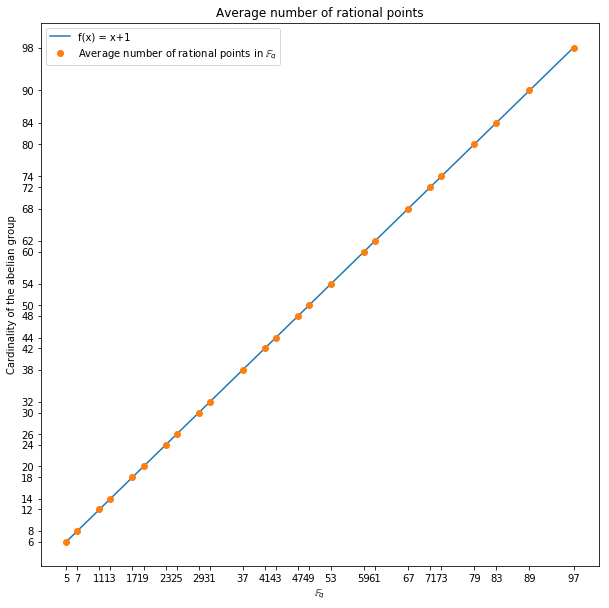

In [30]:
plt.figure(figsize=(10,10))
plt.title('Average number of rational points')
plt.xlabel(r'$\mathbb{F}_q$')
plt.xticks([len([x for x in ks[i].constant_field()]) for i in range(len(ks))])
plt.yticks(ys)
plt.ylabel('Cardinality of the abelian group')
plt.plot(np.linspace(5,97),[x + 1 for x in np.linspace(5,97)],label='f(x) = x+1')
plt.plot(xs,ys,'o',label=r'Average number of rational points in $\mathbb{F}_q$')
plt.legend()
plt.show()

In [22]:
def distributionRationalPoints(K):
    k = K.constant_field()
    elements = [x for x in k]
    q = len(elements)
    nmax = q+1 + int(2*np.sqrt(q))
    nmin = q+1 - int(2*np.sqrt(q))
    values = np.zeros(nmax-nmin+1)
    for i,a in enumerate(elements):
        for j,b in enumerate(elements):
            if j == 0:
                print('i = ' + str(i))
            print('j = ' + str(j))
            try:
                C = EllipticCurve(k,[a,b])
                n = C.abelian_group().cardinality()
                s = n - nmin
                values[s] += 1
            except:
                pass
    xs = np.linspace(0,1,len(values))
    zs = np.linspace(nmin,nmax,len(values))
    return xs,zs,values
def distribution(ks):
    return [distributionRationalPoints(k) for k in ks]

In [23]:
lista = distribution(ks)

i = 0
j = 0
j = 1
j = 2
j = 3
j = 4
i = 1
j = 0
j = 1
j = 2
j = 3
j = 4
i = 2
j = 0
j = 1
j = 2
j = 3
j = 4
i = 3
j = 0
j = 1
j = 2
j = 3
j = 4
i = 4
j = 0
j = 1
j = 2
j = 3
j = 4
i = 0
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
i = 1
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
i = 2
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
i = 3
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
i = 4
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
i = 5
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
i = 6
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
i = 0
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
i = 1
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
i = 2
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
i = 3
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
i = 4
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
i = 5
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
i = 6
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 

j = 22
j = 23
j = 24
i = 1
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
i = 2
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
i = 3
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
i = 4
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
i = 5
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
i = 6
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j 

j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
i = 8
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
i = 9
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
i = 10
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
i = 11
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
i = 12
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7


j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
i = 23
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
i = 24
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
i = 25
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
i = 26
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 

j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
i = 19
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
i = 20
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
i = 21
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26

i = 7
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
i = 8
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
i = 9
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
i = 10
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15


j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
i = 35
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
i = 36
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
i = 37
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
i = 38
j

j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
i = 19
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
i = 20
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
i = 21
j = 0
j = 1
j = 2
j = 3
j = 4
j = 

j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
i = 44
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
i = 45
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
i = 46
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j

j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
j = 47
j = 48
i = 22
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
j = 47
j = 48
i = 23
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
j = 47
j = 48
i = 24
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j

j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
j = 47
j = 48
i = 47
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
j = 47
j = 48
i = 48
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
j = 47
j = 48
i = 0
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j 

j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
j = 47
j = 48
j = 49
j = 50
j = 51
j = 52
i = 21
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
j = 47
j = 48
j = 49
j = 50
j = 51
j = 52
i = 22
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
j = 47
j = 48
j = 49
j = 50
j = 51
j = 52
i = 23
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j

j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
j = 47
j = 48
j = 49
j = 50
j = 51
j = 52
i = 44
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
j = 47
j = 48
j = 49
j = 50
j = 51
j = 52
i = 45
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
j = 47
j = 48
j = 49
j = 50
j = 51
j = 52
i = 4

j = 43
j = 44
j = 45
j = 46
j = 47
j = 48
j = 49
j = 50
j = 51
j = 52
j = 53
j = 54
j = 55
j = 56
j = 57
j = 58
i = 13
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
j = 47
j = 48
j = 49
j = 50
j = 51
j = 52
j = 53
j = 54
j = 55
j = 56
j = 57
j = 58
i = 14
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
j = 47
j = 48
j = 49
j = 50
j = 51
j = 52
j = 53
j = 54
j = 55
j = 56
j = 57
j = 58
i = 15
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j

j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
j = 47
j = 48
j = 49
j = 50
j = 51
j = 52
j = 53
j = 54
j = 55
j = 56
j = 57
j = 58
i = 34
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
j = 47
j = 48
j = 49
j = 50
j = 51
j = 52
j = 53
j = 54
j = 55
j = 56
j = 57
j = 58
i = 35
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27


j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
j = 47
j = 48
j = 49
j = 50
j = 51
j = 52
j = 53
j = 54
j = 55
j = 56
j = 57
j = 58
j = 59
j = 60
i = 1
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
j = 47
j = 48
j = 49
j = 50
j = 51
j = 52
j = 53
j = 54
j = 55
j = 56
j = 57
j = 58
j = 59
j = 60
i = 2
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
j = 47
j = 48
j = 49
j = 50
j = 51
j = 52
j = 53


j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
j = 47
j = 48
j = 49
j = 50
j = 51
j = 52
j = 53
j = 54
j = 55
j = 56
j = 57
j = 58
j = 59
j = 60
i = 24
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
j = 47
j = 48
j = 49
j = 50
j = 51
j = 52
j = 53
j = 54
j = 55
j = 56
j = 57
j = 58
j = 59
j = 60
i = 25
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j

j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
j = 47
j = 48
j = 49
j = 50
j = 51
j = 52
j = 53
j = 54
j = 55
j = 56
j = 57
j = 58
j = 59
j = 60
i = 44
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
j = 47
j = 48
j = 49
j = 50
j = 51
j = 52
j = 53
j = 54
j = 55
j = 56
j = 57
j = 58
j = 59
j = 60
i = 45
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
j = 4

j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
j = 47
j = 48
j = 49
j = 50
j = 51
j = 52
j = 53
j = 54
j = 55
j = 56
j = 57
j = 58
j = 59
j = 60
j = 61
j = 62
j = 63
j = 64
j = 65
j = 66
i = 3
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
j = 47
j = 48
j = 49
j = 50
j = 51
j = 52
j = 53
j = 54
j = 55
j = 56
j = 57
j = 58
j = 59
j = 60
j = 61
j = 62
j = 63
j = 64
j = 65
j = 66
i = 4
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j 

j = 52
j = 53
j = 54
j = 55
j = 56
j = 57
j = 58
j = 59
j = 60
j = 61
j = 62
j = 63
j = 64
j = 65
j = 66
i = 20
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
j = 47
j = 48
j = 49
j = 50
j = 51
j = 52
j = 53
j = 54
j = 55
j = 56
j = 57
j = 58
j = 59
j = 60
j = 61
j = 62
j = 63
j = 64
j = 65
j = 66
i = 21
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
j = 47
j = 48
j = 49
j = 50
j = 51
j = 52
j = 53
j = 54
j = 55
j = 56
j = 57
j = 58
j = 59
j = 60
j = 6

j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
j = 47
j = 48
j = 49
j = 50
j = 51
j = 52
j = 53
j = 54
j = 55
j = 56
j = 57
j = 58
j = 59
j = 60
j = 61
j = 62
j = 63
j = 64
j = 65
j = 66
i = 40
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
j = 47
j = 48
j = 49
j = 50
j = 51
j = 52
j = 53
j = 54
j = 55
j = 56
j = 57
j = 58
j = 59
j = 60
j = 61
j = 62
j = 63
j = 64
j = 65
j = 66
i = 41
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 3

j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
j = 47
j = 48
j = 49
j = 50
j = 51
j = 52
j = 53
j = 54
j = 55
j = 56
j = 57
j = 58
j = 59
j = 60
j = 61
j = 62
j = 63
j = 64
j = 65
j = 66
i = 58
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
j = 47
j = 48
j = 49
j = 50
j = 51
j = 52
j = 53
j = 54
j = 55
j = 56
j = 57
j = 58
j = 59
j = 60
j = 61
j = 62
j = 63
j = 64
j = 65
j = 66
i = 59
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11


j = 43
j = 44
j = 45
j = 46
j = 47
j = 48
j = 49
j = 50
j = 51
j = 52
j = 53
j = 54
j = 55
j = 56
j = 57
j = 58
j = 59
j = 60
j = 61
j = 62
j = 63
j = 64
j = 65
j = 66
j = 67
j = 68
j = 69
j = 70
i = 8
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
j = 47
j = 48
j = 49
j = 50
j = 51
j = 52
j = 53
j = 54
j = 55
j = 56
j = 57
j = 58
j = 59
j = 60
j = 61
j = 62
j = 63
j = 64
j = 65
j = 66
j = 67
j = 68
j = 69
j = 70
i = 9
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44


j = 57
j = 58
j = 59
j = 60
j = 61
j = 62
j = 63
j = 64
j = 65
j = 66
j = 67
j = 68
j = 69
j = 70
i = 25
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
j = 47
j = 48
j = 49
j = 50
j = 51
j = 52
j = 53
j = 54
j = 55
j = 56
j = 57
j = 58
j = 59
j = 60
j = 61
j = 62
j = 63
j = 64
j = 65
j = 66
j = 67
j = 68
j = 69
j = 70
i = 26
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
j = 47
j = 48
j = 49
j = 50
j = 51
j = 52
j = 53
j = 54
j = 55
j = 56
j = 57
j = 5

j = 53
j = 54
j = 55
j = 56
j = 57
j = 58
j = 59
j = 60
j = 61
j = 62
j = 63
j = 64
j = 65
j = 66
j = 67
j = 68
j = 69
j = 70
i = 43
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
j = 47
j = 48
j = 49
j = 50
j = 51
j = 52
j = 53
j = 54
j = 55
j = 56
j = 57
j = 58
j = 59
j = 60
j = 61
j = 62
j = 63
j = 64
j = 65
j = 66
j = 67
j = 68
j = 69
j = 70
i = 44
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
j = 47
j = 48
j = 49
j = 50
j = 51
j = 52
j = 53
j = 5

j = 58
j = 59
j = 60
j = 61
j = 62
j = 63
j = 64
j = 65
j = 66
j = 67
j = 68
j = 69
j = 70
i = 62
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
j = 47
j = 48
j = 49
j = 50
j = 51
j = 52
j = 53
j = 54
j = 55
j = 56
j = 57
j = 58
j = 59
j = 60
j = 61
j = 62
j = 63
j = 64
j = 65
j = 66
j = 67
j = 68
j = 69
j = 70
i = 63
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
j = 47
j = 48
j = 49
j = 50
j = 51
j = 52
j = 53
j = 54
j = 55
j = 56
j = 57
j = 58
j = 5

j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
j = 47
j = 48
j = 49
j = 50
j = 51
j = 52
j = 53
j = 54
j = 55
j = 56
j = 57
j = 58
j = 59
j = 60
j = 61
j = 62
j = 63
j = 64
j = 65
j = 66
j = 67
j = 68
j = 69
j = 70
j = 71
j = 72
i = 8
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
j = 47
j = 48
j = 49
j = 50
j = 51
j = 52
j = 53
j = 54
j = 55
j = 56
j = 57
j = 58
j = 59
j = 60
j = 61
j = 62
j = 63
j = 64
j = 65
j = 66
j = 67
j = 68
j = 69
j = 70
j = 71
j = 72
i = 9
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22


j = 48
j = 49
j = 50
j = 51
j = 52
j = 53
j = 54
j = 55
j = 56
j = 57
j = 58
j = 59
j = 60
j = 61
j = 62
j = 63
j = 64
j = 65
j = 66
j = 67
j = 68
j = 69
j = 70
j = 71
j = 72
i = 25
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
j = 47
j = 48
j = 49
j = 50
j = 51
j = 52
j = 53
j = 54
j = 55
j = 56
j = 57
j = 58
j = 59
j = 60
j = 61
j = 62
j = 63
j = 64
j = 65
j = 66
j = 67
j = 68
j = 69
j = 70
j = 71
j = 72
i = 26
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 4

j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
j = 47
j = 48
j = 49
j = 50
j = 51
j = 52
j = 53
j = 54
j = 55
j = 56
j = 57
j = 58
j = 59
j = 60
j = 61
j = 62
j = 63
j = 64
j = 65
j = 66
j = 67
j = 68
j = 69
j = 70
j = 71
j = 72
i = 47
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
j = 47
j = 48
j = 49
j = 50
j = 51
j = 52
j = 53
j = 54
j = 55
j = 56
j = 57
j = 58
j = 59
j = 60
j = 61
j = 62
j = 63
j = 64
j = 65
j = 66
j = 67
j = 68
j = 69
j = 70
j = 71
j = 72
i = 48
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 1

j = 64
j = 65
j = 66
j = 67
j = 68
j = 69
j = 70
j = 71
j = 72
i = 63
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
j = 47
j = 48
j = 49
j = 50
j = 51
j = 52
j = 53
j = 54
j = 55
j = 56
j = 57
j = 58
j = 59
j = 60
j = 61
j = 62
j = 63
j = 64
j = 65
j = 66
j = 67
j = 68
j = 69
j = 70
j = 71
j = 72
i = 64
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
j = 47
j = 48
j = 49
j = 50
j = 51
j = 52
j = 53
j = 54
j = 55
j = 56
j = 57
j = 58
j = 59
j = 60
j = 6

j = 77
j = 78
i = 6
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
j = 47
j = 48
j = 49
j = 50
j = 51
j = 52
j = 53
j = 54
j = 55
j = 56
j = 57
j = 58
j = 59
j = 60
j = 61
j = 62
j = 63
j = 64
j = 65
j = 66
j = 67
j = 68
j = 69
j = 70
j = 71
j = 72
j = 73
j = 74
j = 75
j = 76
j = 77
j = 78
i = 7
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
j = 47
j = 48
j = 49
j = 50
j = 51
j = 52
j = 53
j = 54
j = 55
j = 56
j = 57
j = 58
j = 59
j = 60
j = 61
j = 62


j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
j = 47
j = 48
j = 49
j = 50
j = 51
j = 52
j = 53
j = 54
j = 55
j = 56
j = 57
j = 58
j = 59
j = 60
j = 61
j = 62
j = 63
j = 64
j = 65
j = 66
j = 67
j = 68
j = 69
j = 70
j = 71
j = 72
j = 73
j = 74
j = 75
j = 76
j = 77
j = 78
i = 22
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
j = 47
j = 48
j = 49
j = 50
j = 51
j = 52
j = 53
j = 54
j = 55
j = 56
j = 57
j = 58
j = 59
j = 60
j = 61
j = 62
j = 63
j = 64
j = 65
j = 66
j = 67
j = 68
j = 69
j = 70
j = 71
j = 72
j = 73
j = 74
j = 75
j = 76
j = 77
j = 78
i = 23
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 

j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
j = 47
j = 48
j = 49
j = 50
j = 51
j = 52
j = 53
j = 54
j = 55
j = 56
j = 57
j = 58
j = 59
j = 60
j = 61
j = 62
j = 63
j = 64
j = 65
j = 66
j = 67
j = 68
j = 69
j = 70
j = 71
j = 72
j = 73
j = 74
j = 75
j = 76
j = 77
j = 78
i = 40
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
j = 47
j = 48
j = 49
j = 50
j = 51
j = 52
j = 53
j = 54
j = 55
j = 56
j = 57
j = 58
j = 59
j = 60
j = 61
j = 62
j = 63
j = 64
j = 65
j = 

j = 42
j = 43
j = 44
j = 45
j = 46
j = 47
j = 48
j = 49
j = 50
j = 51
j = 52
j = 53
j = 54
j = 55
j = 56
j = 57
j = 58
j = 59
j = 60
j = 61
j = 62
j = 63
j = 64
j = 65
j = 66
j = 67
j = 68
j = 69
j = 70
j = 71
j = 72
j = 73
j = 74
j = 75
j = 76
j = 77
j = 78
i = 55
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
j = 47
j = 48
j = 49
j = 50
j = 51
j = 52
j = 53
j = 54
j = 55
j = 56
j = 57
j = 58
j = 59
j = 60
j = 61
j = 62
j = 63
j = 64
j = 65
j = 66
j = 67
j = 68
j = 69
j = 70
j = 71
j = 72
j = 73
j = 74
j = 75
j = 76
j = 77
j = 78
i = 56
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 2

j = 66
j = 67
j = 68
j = 69
j = 70
j = 71
j = 72
j = 73
j = 74
j = 75
j = 76
j = 77
j = 78
i = 70
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
j = 47
j = 48
j = 49
j = 50
j = 51
j = 52
j = 53
j = 54
j = 55
j = 56
j = 57
j = 58
j = 59
j = 60
j = 61
j = 62
j = 63
j = 64
j = 65
j = 66
j = 67
j = 68
j = 69
j = 70
j = 71
j = 72
j = 73
j = 74
j = 75
j = 76
j = 77
j = 78
i = 71
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
j = 47
j = 48
j = 49
j = 50
j = 5

j = 52
j = 53
j = 54
j = 55
j = 56
j = 57
j = 58
j = 59
j = 60
j = 61
j = 62
j = 63
j = 64
j = 65
j = 66
j = 67
j = 68
j = 69
j = 70
j = 71
j = 72
j = 73
j = 74
j = 75
j = 76
j = 77
j = 78
j = 79
j = 80
j = 81
j = 82
i = 6
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
j = 47
j = 48
j = 49
j = 50
j = 51
j = 52
j = 53
j = 54
j = 55
j = 56
j = 57
j = 58
j = 59
j = 60
j = 61
j = 62
j = 63
j = 64
j = 65
j = 66
j = 67
j = 68
j = 69
j = 70
j = 71
j = 72
j = 73
j = 74
j = 75
j = 76
j = 77
j = 78
j = 79
j = 80
j = 81
j = 82
i = 7
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29


j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
j = 47
j = 48
j = 49
j = 50
j = 51
j = 52
j = 53
j = 54
j = 55
j = 56
j = 57
j = 58
j = 59
j = 60
j = 61
j = 62
j = 63
j = 64
j = 65
j = 66
j = 67
j = 68
j = 69
j = 70
j = 71
j = 72
j = 73
j = 74
j = 75
j = 76
j = 77
j = 78
j = 79
j = 80
j = 81
j = 82
i = 21
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
j = 47
j = 48
j = 49
j = 50
j = 51
j = 52
j = 53
j = 54
j = 55
j = 56
j = 57
j = 58
j = 59
j = 60
j = 61
j = 

j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
j = 47
j = 48
j = 49
j = 50
j = 51
j = 52
j = 53
j = 54
j = 55
j = 56
j = 57
j = 58
j = 59
j = 60
j = 61
j = 62
j = 63
j = 64
j = 65
j = 66
j = 67
j = 68
j = 69
j = 70
j = 71
j = 72
j = 73
j = 74
j = 75
j = 76
j = 77
j = 78
j = 79
j = 80
j = 81
j = 82
i = 35
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
j = 47
j = 48
j = 49
j = 50
j = 51
j = 52
j = 53
j = 54
j = 55
j = 56
j = 57
j = 58
j = 59
j = 60
j = 61
j = 62
j = 63
j = 64
j = 65
j = 66
j = 67
j = 68
j = 69
j = 70
j = 71
j = 72
j = 73
j = 74
j = 75
j = 76
j = 77
j = 78
j = 79
j = 80
j = 81
j = 82
i = 36
j = 0
j =

j = 68
j = 69
j = 70
j = 71
j = 72
j = 73
j = 74
j = 75
j = 76
j = 77
j = 78
j = 79
j = 80
j = 81
j = 82
i = 49
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
j = 47
j = 48
j = 49
j = 50
j = 51
j = 52
j = 53
j = 54
j = 55
j = 56
j = 57
j = 58
j = 59
j = 60
j = 61
j = 62
j = 63
j = 64
j = 65
j = 66
j = 67
j = 68
j = 69
j = 70
j = 71
j = 72
j = 73
j = 74
j = 75
j = 76
j = 77
j = 78
j = 79
j = 80
j = 81
j = 82
i = 50
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 4

j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
j = 47
j = 48
j = 49
j = 50
j = 51
j = 52
j = 53
j = 54
j = 55
j = 56
j = 57
j = 58
j = 59
j = 60
j = 61
j = 62
j = 63
j = 64
j = 65
j = 66
j = 67
j = 68
j = 69
j = 70
j = 71
j = 72
j = 73
j = 74
j = 75
j = 76
j = 77
j = 78
j = 79
j = 80
j = 81
j = 82
i = 64
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
j = 47
j = 48
j = 49
j = 50
j = 51
j = 52
j = 53
j = 54
j = 55
j = 56
j = 57
j = 58
j = 59
j = 60
j = 61
j = 

j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
j = 47
j = 48
j = 49
j = 50
j = 51
j = 52
j = 53
j = 54
j = 55
j = 56
j = 57
j = 58
j = 59
j = 60
j = 61
j = 62
j = 63
j = 64
j = 65
j = 66
j = 67
j = 68
j = 69
j = 70
j = 71
j = 72
j = 73
j = 74
j = 75
j = 76
j = 77
j = 78
j = 79
j = 80
j = 81
j = 82
i = 78
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
j = 47
j = 48
j = 49
j = 50
j = 51
j = 52
j = 53
j = 54
j = 55
j = 56
j = 57
j = 58
j = 59
j = 60
j = 61
j = 62
j = 63
j = 64
j = 65
j = 66
j = 67
j = 68
j = 69
j = 70
j = 71
j = 72
j = 73
j = 74
j = 75
j = 76
j = 77
j = 78
j = 79
j = 80
j = 81
j 

j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
j = 47
j = 48
j = 49
j = 50
j = 51
j = 52
j = 53
j = 54
j = 55
j = 56
j = 57
j = 58
j = 59
j = 60
j = 61
j = 62
j = 63
j = 64
j = 65
j = 66
j = 67
j = 68
j = 69
j = 70
j = 71
j = 72
j = 73
j = 74
j = 75
j = 76
j = 77
j = 78
j = 79
j = 80
j = 81
j = 82
j = 83
j = 84
j = 85
j = 86
j = 87
j = 88
i = 9
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
j = 47
j = 48
j = 49
j = 50
j = 51
j = 52
j = 53
j = 54
j = 55
j = 56
j = 57
j = 58
j 

j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
j = 47
j = 48
j = 49
j = 50
j = 51
j = 52
j = 53
j = 54
j = 55
j = 56
j = 57
j = 58
j = 59
j = 60
j = 61
j = 62
j = 63
j = 64
j = 65
j = 66
j = 67
j = 68
j = 69
j = 70
j = 71
j = 72
j = 73
j = 74
j = 75
j = 76
j = 77
j = 78
j = 79
j = 80
j = 81
j = 82
j = 83
j = 84
j = 85
j = 86
j = 87
j = 88
i = 23
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
j = 47
j = 48
j = 49
j = 50
j = 51
j = 52
j = 53
j = 54
j = 55
j = 56
j =

j = 45
j = 46
j = 47
j = 48
j = 49
j = 50
j = 51
j = 52
j = 53
j = 54
j = 55
j = 56
j = 57
j = 58
j = 59
j = 60
j = 61
j = 62
j = 63
j = 64
j = 65
j = 66
j = 67
j = 68
j = 69
j = 70
j = 71
j = 72
j = 73
j = 74
j = 75
j = 76
j = 77
j = 78
j = 79
j = 80
j = 81
j = 82
j = 83
j = 84
j = 85
j = 86
j = 87
j = 88
i = 37
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
j = 47
j = 48
j = 49
j = 50
j = 51
j = 52
j = 53
j = 54
j = 55
j = 56
j = 57
j = 58
j = 59
j = 60
j = 61
j = 62
j = 63
j = 64
j = 65
j = 66
j = 67
j = 68
j = 69
j = 70
j = 71
j = 72
j = 73
j = 74
j = 75
j = 76
j = 77
j = 78
j = 79
j = 80
j = 81
j = 82
j = 83
j = 84
j = 85
j = 86
j = 87
j = 88
i = 38
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 1

j = 79
j = 80
j = 81
j = 82
j = 83
j = 84
j = 85
j = 86
j = 87
j = 88
i = 50
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
j = 47
j = 48
j = 49
j = 50
j = 51
j = 52
j = 53
j = 54
j = 55
j = 56
j = 57
j = 58
j = 59
j = 60
j = 61
j = 62
j = 63
j = 64
j = 65
j = 66
j = 67
j = 68
j = 69
j = 70
j = 71
j = 72
j = 73
j = 74
j = 75
j = 76
j = 77
j = 78
j = 79
j = 80
j = 81
j = 82
j = 83
j = 84
j = 85
j = 86
j = 87
j = 88
i = 51
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 4

j = 57
j = 58
j = 59
j = 60
j = 61
j = 62
j = 63
j = 64
j = 65
j = 66
j = 67
j = 68
j = 69
j = 70
j = 71
j = 72
j = 73
j = 74
j = 75
j = 76
j = 77
j = 78
j = 79
j = 80
j = 81
j = 82
j = 83
j = 84
j = 85
j = 86
j = 87
j = 88
i = 64
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
j = 47
j = 48
j = 49
j = 50
j = 51
j = 52
j = 53
j = 54
j = 55
j = 56
j = 57
j = 58
j = 59
j = 60
j = 61
j = 62
j = 63
j = 64
j = 65
j = 66
j = 67
j = 68
j = 69
j = 70
j = 71
j = 72
j = 73
j = 74
j = 75
j = 76
j = 77
j = 78
j = 79
j = 80
j = 81
j = 82
j = 83
j = 84
j = 85
j = 86
j = 87
j = 88
i = 65
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 2

j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
j = 47
j = 48
j = 49
j = 50
j = 51
j = 52
j = 53
j = 54
j = 55
j = 56
j = 57
j = 58
j = 59
j = 60
j = 61
j = 62
j = 63
j = 64
j = 65
j = 66
j = 67
j = 68
j = 69
j = 70
j = 71
j = 72
j = 73
j = 74
j = 75
j = 76
j = 77
j = 78
j = 79
j = 80
j = 81
j = 82
j = 83
j = 84
j = 85
j = 86
j = 87
j = 88
i = 78
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
j = 47
j = 48
j = 49
j = 50
j = 51
j = 52
j = 53
j = 54
j = 55
j = 56
j = 57
j = 58
j = 59
j = 60
j = 61
j = 62
j = 63
j = 64
j = 65
j 

j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
j = 47
j = 48
j = 49
j = 50
j = 51
j = 52
j = 53
j = 54
j = 55
j = 56
j = 57
j = 58
j = 59
j = 60
j = 61
j = 62
j = 63
j = 64
j = 65
j = 66
j = 67
j = 68
j = 69
j = 70
j = 71
j = 72
j = 73
j = 74
j = 75
j = 76
j = 77
j = 78
j = 79
j = 80
j = 81
j = 82
j = 83
j = 84
j = 85
j = 86
j = 87
j = 88
j = 89
j = 90
j = 91
j = 92
j = 93
j = 94
j = 95
j = 96
i = 2
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
j = 47
j = 48
j = 49
j = 50
j = 51
j = 52
j = 53
j = 54
j = 55
j = 56
j = 57
j = 58
j = 59
j = 60
j = 61
j = 62
j = 63
j = 64
j = 65
j = 66
j = 67
j = 68
j = 69
j = 70
j = 71
j = 72
j = 73
j = 74
j = 75
j = 76
j = 77
j = 78
j =

j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
j = 47
j = 48
j = 49
j = 50
j = 51
j = 52
j = 53
j = 54
j = 55
j = 56
j = 57
j = 58
j = 59
j = 60
j = 61
j = 62
j = 63
j = 64
j = 65
j = 66
j = 67
j = 68
j = 69
j = 70
j = 71
j = 72
j = 73
j = 74
j = 75
j = 76
j = 77
j = 78
j = 79
j = 80
j = 81
j = 82
j = 83
j = 84
j = 85
j = 86
j = 87
j = 88
j = 89
j = 90
j = 91
j = 92
j = 93
j = 94
j = 95
j = 96
i = 15
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
j = 47
j = 48
j = 49
j = 50
j = 51
j = 52
j = 53
j = 54
j = 55
j = 56
j = 57
j = 58
j = 59
j = 60
j = 61
j = 62
j = 63
j = 64
j = 65
j = 66
j = 67
j = 68
j = 69
j = 70
j = 71
j = 72
j = 73
j = 74
j = 75
j = 76
j = 77
j = 78
j = 79
j = 80
j = 81
j = 82
j = 83
j = 84
j = 85
j 

j = 76
j = 77
j = 78
j = 79
j = 80
j = 81
j = 82
j = 83
j = 84
j = 85
j = 86
j = 87
j = 88
j = 89
j = 90
j = 91
j = 92
j = 93
j = 94
j = 95
j = 96
i = 27
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
j = 47
j = 48
j = 49
j = 50
j = 51
j = 52
j = 53
j = 54
j = 55
j = 56
j = 57
j = 58
j = 59
j = 60
j = 61
j = 62
j = 63
j = 64
j = 65
j = 66
j = 67
j = 68
j = 69
j = 70
j = 71
j = 72
j = 73
j = 74
j = 75
j = 76
j = 77
j = 78
j = 79
j = 80
j = 81
j = 82
j = 83
j = 84
j = 85
j = 86
j = 87
j = 88
j = 89
j = 90
j = 91
j = 92
j = 93
j = 94
j = 95
j = 96
i = 28
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 2

j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
j = 47
j = 48
j = 49
j = 50
j = 51
j = 52
j = 53
j = 54
j = 55
j = 56
j = 57
j = 58
j = 59
j = 60
j = 61
j = 62
j = 63
j = 64
j = 65
j = 66
j = 67
j = 68
j = 69
j = 70
j = 71
j = 72
j = 73
j = 74
j = 75
j = 76
j = 77
j = 78
j = 79
j = 80
j = 81
j = 82
j = 83
j = 84
j = 85
j = 86
j = 87
j = 88
j = 89
j = 90
j = 91
j = 92
j = 93
j = 94
j = 95
j = 96
i = 40
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
j = 47
j = 48
j = 49
j = 50
j = 51
j = 52
j = 53
j = 

j = 64
j = 65
j = 66
j = 67
j = 68
j = 69
j = 70
j = 71
j = 72
j = 73
j = 74
j = 75
j = 76
j = 77
j = 78
j = 79
j = 80
j = 81
j = 82
j = 83
j = 84
j = 85
j = 86
j = 87
j = 88
j = 89
j = 90
j = 91
j = 92
j = 93
j = 94
j = 95
j = 96
i = 52
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
j = 47
j = 48
j = 49
j = 50
j = 51
j = 52
j = 53
j = 54
j = 55
j = 56
j = 57
j = 58
j = 59
j = 60
j = 61
j = 62
j = 63
j = 64
j = 65
j = 66
j = 67
j = 68
j = 69
j = 70
j = 71
j = 72
j = 73
j = 74
j = 75
j = 76
j = 77
j = 78
j = 79
j = 80
j = 81
j = 82
j = 83
j = 84
j = 85
j = 86
j = 87
j = 88
j = 89
j = 90
j = 91
j = 92
j = 93
j = 94
j = 95
j = 96
i = 53
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 1

j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
j = 47
j = 48
j = 49
j = 50
j = 51
j = 52
j = 53
j = 54
j = 55
j = 56
j = 57
j = 58
j = 59
j = 60
j = 61
j = 62
j = 63
j = 64
j = 65
j = 66
j = 67
j = 68
j = 69
j = 70
j = 71
j = 72
j = 73
j = 74
j = 75
j = 76
j = 77
j = 78
j = 79
j = 80
j = 81
j = 82
j = 83
j = 84
j = 85
j = 86
j = 87
j = 88
j = 89
j = 90
j = 91
j = 92
j = 93
j = 94
j = 95
j = 96
i = 65
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
j = 47
j = 48
j = 49
j = 50
j

j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
j = 47
j = 48
j = 49
j = 50
j = 51
j = 52
j = 53
j = 54
j = 55
j = 56
j = 57
j = 58
j = 59
j = 60
j = 61
j = 62
j = 63
j = 64
j = 65
j = 66
j = 67
j = 68
j = 69
j = 70
j = 71
j = 72
j = 73
j = 74
j = 75
j = 76
j = 77
j = 78
j = 79
j = 80
j = 81
j = 82
j = 83
j = 84
j = 85
j = 86
j = 87
j = 88
j = 89
j = 90
j = 91
j = 92
j = 93
j = 94
j = 95
j = 96
i = 77
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
j = 47
j = 48
j = 49
j = 50
j = 51
j = 52
j = 53
j = 54
j = 55
j = 56
j = 57
j = 58
j = 59
j = 60
j = 61
j = 62
j = 63
j = 64
j 

j = 70
j = 71
j = 72
j = 73
j = 74
j = 75
j = 76
j = 77
j = 78
j = 79
j = 80
j = 81
j = 82
j = 83
j = 84
j = 85
j = 86
j = 87
j = 88
j = 89
j = 90
j = 91
j = 92
j = 93
j = 94
j = 95
j = 96
i = 89
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 19
j = 20
j = 21
j = 22
j = 23
j = 24
j = 25
j = 26
j = 27
j = 28
j = 29
j = 30
j = 31
j = 32
j = 33
j = 34
j = 35
j = 36
j = 37
j = 38
j = 39
j = 40
j = 41
j = 42
j = 43
j = 44
j = 45
j = 46
j = 47
j = 48
j = 49
j = 50
j = 51
j = 52
j = 53
j = 54
j = 55
j = 56
j = 57
j = 58
j = 59
j = 60
j = 61
j = 62
j = 63
j = 64
j = 65
j = 66
j = 67
j = 68
j = 69
j = 70
j = 71
j = 72
j = 73
j = 74
j = 75
j = 76
j = 77
j = 78
j = 79
j = 80
j = 81
j = 82
j = 83
j = 84
j = 85
j = 86
j = 87
j = 88
j = 89
j = 90
j = 91
j = 92
j = 93
j = 94
j = 95
j = 96
i = 90
j = 0
j = 1
j = 2
j = 3
j = 4
j = 5
j = 6
j = 7
j = 8
j = 9
j = 10
j = 11
j = 12
j = 13
j = 14
j = 15
j = 16
j = 17
j = 18
j = 1

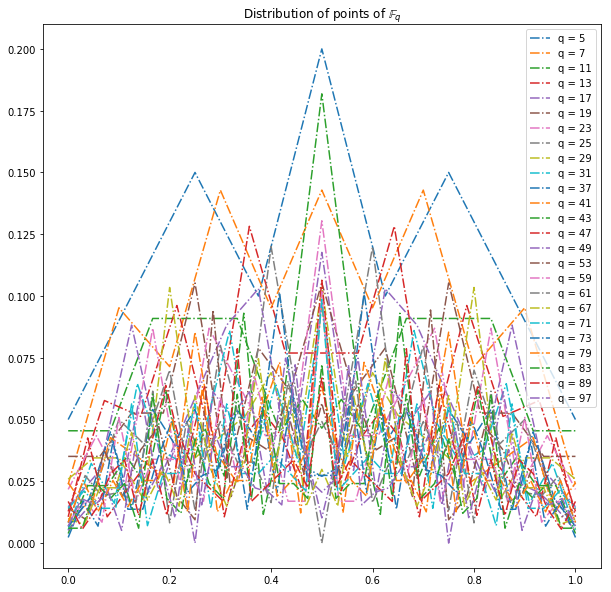

In [31]:
plt.figure(figsize=(10,10))
for i in range(len(lista)):
    elements = [x for x in ks[i].constant_field()]
    plt.plot(lista[i][0],1/(np.sum(lista[i][-1]))*lista[i][-1],'-.',label= 'q = ' + str(len(elements)))
plt.title(r'Distribution of points of $\mathbb{F}_q$')
plt.legend()
plt.show()

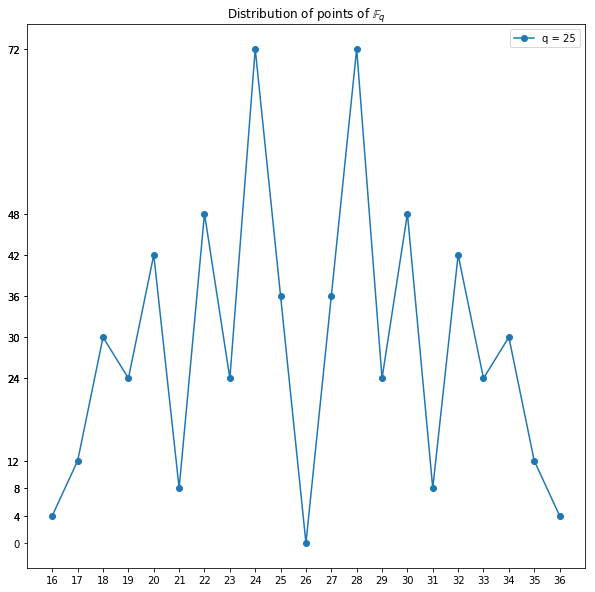

In [34]:
i = 7
j = 1 
elements = [x for x in ks[i].constant_field()]
plt.figure(figsize=(10,10))
plt.title(r'Distribution of points of $\mathbb{F}_q$')
plt.plot(lista[i][j],lista[i][-1],'-o',label = 'q = ' + str(len(elements)))
plt.xticks(lista[i][j])
plt.yticks(lista[i][-1])
plt.legend()
plt.show()

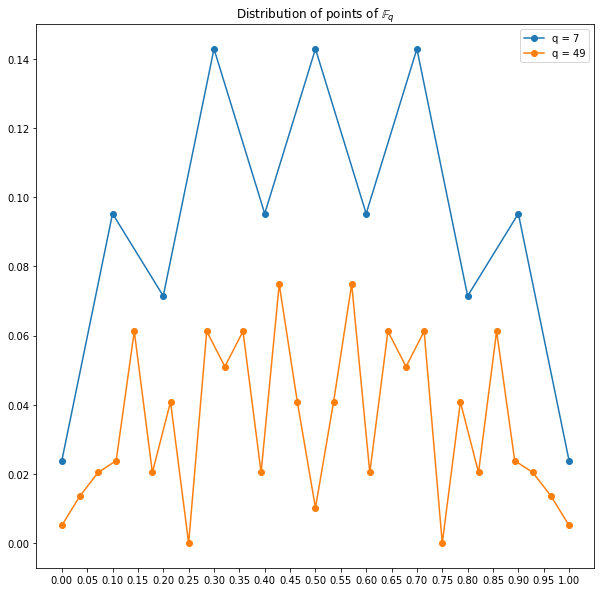

In [33]:
i1 = 1  ## 0,1
i2 = 14 ## 7,14
j = 0
elements1 = [x for x in ks[i1].constant_field()]
elements2 = [x for x in ks[i2].constant_field()]
plt.figure(figsize=(10,10))
plt.title(r'Distribution of points of $\mathbb{F}_q$')
plt.plot(lista[i1][j],1/sum(lista[i1][-1]) *lista[i1][-1],'-o',label = 'q = ' + str(len(elements1)))
plt.plot(lista[i2][j],1/sum(lista[i2][-1]) *lista[i2][-1],'-o',label = 'q = ' + str(len(elements2)))
plt.xticks(lista[i][j])
plt.legend()
plt.show()

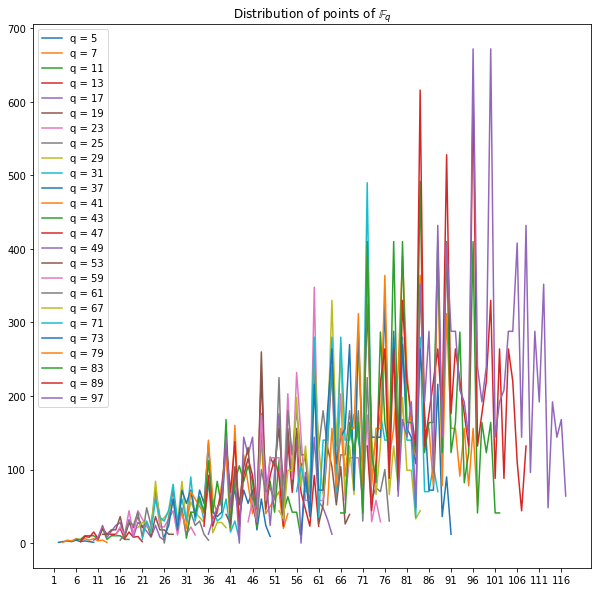

In [35]:
j = 1
plt.figure(figsize=(10,10))
for i in range(len(lista)):
    elements = [x for x in ks[i].constant_field()]
    plt.plot(lista[i][j],lista[i][-1],'',label= 'q = ' + str(len(elements)))
plt.xticks(range(1,len(elements)+1 + int(2*np.sqrt(len(elements))),5))
plt.title(r'Distribution of points of $\mathbb{F}_q$')
plt.legend()
plt.show()

In [36]:
CC = EllipticCurve(GF(11),[1,2])
G = CC.abelian_group()
G,G.cardinality()

(Additive abelian group isomorphic to Z/8 + Z/2 embedded in Abelian group of points on Elliptic Curve defined by y^2 = x^3 + x + 2 over Finite Field of size 11,
 16)

In [37]:
k = GF(11)
K.<x> = FunctionField(k)
R.<y> = K[]
L.<y> = K.extension(y^2 - x^3 - x - 2)
L

Function field in y defined by y^2 + 10*x^3 + 10*x + 9

In [38]:
ps = L.places(1)
ps,len(ps)

([Place (1/x, 1/x^2*y),
  Place (x + 1, y),
  Place (x + 2, y + 5),
  Place (x + 2, y + 6),
  Place (x + 3, y + 4),
  Place (x + 3, y + 7),
  Place (x + 4, y),
  Place (x + 5, y + 2),
  Place (x + 5, y + 9),
  Place (x + 6, y),
  Place (x + 7, y + 2),
  Place (x + 7, y + 9),
  Place (x + 9, y + 1),
  Place (x + 9, y + 10),
  Place (x + 10, y + 2),
  Place (x + 10, y + 9)],
 16)

In [39]:
gs = [g for g in G]

In [40]:

G.identity()

(0 : 1 : 0)

In [41]:
gs,ps

([(0 : 1 : 0),
  (9 : 6 : 1),
  (8 : 7 : 1),
  (6 : 2 : 1),
  (10 : 0 : 1),
  (6 : 9 : 1),
  (8 : 4 : 1),
  (9 : 5 : 1),
  (7 : 0 : 1),
  (4 : 9 : 1),
  (1 : 9 : 1),
  (2 : 1 : 1),
  (5 : 0 : 1),
  (2 : 10 : 1),
  (1 : 2 : 1),
  (4 : 2 : 1)],
 [Place (1/x, 1/x^2*y),
  Place (x + 1, y),
  Place (x + 2, y + 5),
  Place (x + 2, y + 6),
  Place (x + 3, y + 4),
  Place (x + 3, y + 7),
  Place (x + 4, y),
  Place (x + 5, y + 2),
  Place (x + 5, y + 9),
  Place (x + 6, y),
  Place (x + 7, y + 2),
  Place (x + 7, y + 9),
  Place (x + 9, y + 1),
  Place (x + 9, y + 10),
  Place (x + 10, y + 2),
  Place (x + 10, y + 9)])

In [42]:
from sage.rings.function_field.divisor import divisor

In [43]:
A = divisor(F,{ps[0]:1,ps[1]:1,ps[2]:1})

$$ 
P \in \mathbb{P}_F ^1, \ \ \phi(P) = \displaystyle{[}P-P_0 \displaystyle{]} \in Cl^0 (F)
$$
We will prove later:

$$
P \oplus Q = R \iff P + Q \thicksim R + P_0 \iff P + Q - P_0 - R = (x), \ \ \ x \in F
$$
And we know that if $deg \  A = 0$:

$$
A \text{ is principal  } \iff \ell(A) = 1 
$$

In [44]:
divs = []
for p in ps:
    for q in ps:
        A = divisor(F,{ps[0]:-1,p:1,q:1})
        divs.append(A)
ts = []
for p in ps:
    ts.append(p.local_uniformizer())

In [45]:
ts[3].divisor() ## The inverse of P_2,5 is P_2,6

-2*Place (1/x, 1/x^2*y)
 + Place (x + 2, y + 5)
 + Place (x + 2, y + 6)

In [46]:
ts[4].divisor() ## The inverso of P_3,4 is P_3,7

-2*Place (1/x, 1/x^2*y)
 + Place (x + 3, y + 4)
 + Place (x + 3, y + 7)

In [47]:
ts[7].divisor() ## The inverse of P_5,2 is P_5,9

-2*Place (1/x, 1/x^2*y)
 + Place (x + 5, y + 2)
 + Place (x + 5, y + 9)

In [48]:
ts[10].divisor() ## The inverse of P_7,2 is P_7,9

-2*Place (1/x, 1/x^2*y)
 + Place (x + 7, y + 2)
 + Place (x + 7, y + 9)

In [49]:
ts[12].divisor() ## The inverse of P_9,1 is P_9,10

-2*Place (1/x, 1/x^2*y)
 + Place (x + 9, y + 1)
 + Place (x + 9, y + 10)

In [50]:
ts[14].divisor() ## The inverse of P_10,2 is P_10,9

-2*Place (1/x, 1/x^2*y)
 + Place (x + 10, y + 2)
 + Place (x + 10, y + 9)

We know that the group is isomorphic to $\displaystyle{\frac{\mathbb{Z}}{8\mathbb{Z}}} \oplus \displaystyle{\frac{\mathbb{Z}}{2\mathbb{Z}}}$, and we know this group has exactly $4$ elements of order $2$. Namely:
$$
(0,0),(0,1),(4,0),(4,1)
$$
$$
$$

But we have just found $12$ elements that don't have order $2$. That means the four elements that have order $2$ are:

$$
P_{\infty}, \ P_{4,0}, \ P_{6,0}, \ P_{1,0}
$$